# ASR post-processing corrector pred vs gold

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

import os, pickle
from multiprocessing import Pool
from Cfg import Cfg
from RecordingCorpus import RecordingCorpus
from tqdm.auto import tqdm
from SplitCorpus import SplitCorpus
from load_pretrained_model import load_pretrained_model
from listen_and_transcribe import listen_and_transcribe

## Load training examples

In [4]:
if __name__=="__main__":
    language='vietnamese'
    phase='build'
    release='b30'
    C = Cfg('NIST', 16000, language, phase, release)
    with Pool(16) as pool:
        recordings = RecordingCorpus(C, pool)

100%|██████████| 126/126 [00:06<00:00, 20.23it/s]


In [5]:
splits=SplitCorpus.transcript_split(C, recordings)

In [6]:
max_duration=33
model = load_pretrained_model(C, 0)

searching save/nemo_vietnamese/*.ckpt


[NeMo W 2020-10-30 19:18:52 modelPT:102] Please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: NIST/openasr20_vietnamese/build/train_manifest.json
    sample_rate: 16000
    labels:
    - ' '
    - ''''
    - '-'
    - A
    - B
    - C
    - D
    - E
    - F
    - G
    - H
    - I
    - J
    - K
    - L
    - M
    - 'N'
    - O
    - P
    - Q
    - R
    - S
    - T
    - U
    - V
    - W
    - X
    - 'Y'
    - Z
    - a
    - b
    - c
    - d
    - e
    - f
    - g
    - h
    - i
    - j
    - k
    - l
    - m
    - 'n'
    - o
    - p
    - q
    - r
    - s
    - t
    - u
    - v
    - w
    - x
    - 'y'
    - z
    - Á
    - Â
    - Ú
    - à
    - á
    - â
    - ã
    - è
    - é
    - ê
    - ì
    - í
    - ò
    - ó
    - ô
    - õ
    - ù
    - ú
    - ý
    - ă
    - Đ
    - đ
    - ĩ
    - ũ
    - ơ
    - ư
    - ạ
    - Ả
    - ả
    - ấ
    - ầ
  

[NeMo I 2020-10-30 19:18:52 features:241] PADDING: 16
[NeMo I 2020-10-30 19:18:52 features:258] STFT using torch
loaded save/nemo_vietnamese/vietnamese_20201030_003117_743105_epoch=176.ckpt


## For each BUILD subsplit match gold with pred of split audio

In [10]:
pairs=[]

for artifact in splits.artifacts:
    gold=artifact.target.value
    audio=artifact.source.value
    transcript=listen_and_transcribe(C, model, max_duration, gold, audio)
    pred=' '.join([z for x,y,z in transcript])
    pairs.append((pred, gold))

[NeMo I 2020-10-30 19:19:47 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:19:47 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |a lô ừ nấu cơm chưa|
[NeMo I 2020-10-30 19:19:47 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:19:47 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừn ngoàn h|
[NeMo I 2020-10-30 19:19:47 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:19:47 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |bôi|
[NeMo I 2020-10-30 19:19:47 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:19:47 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ban ngủ lại đi ngủ|
[NeMo I 2020-10-30 19:19:47 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:19:47 collections:174] 0 files were filtered 

PREDICTION |à hôm đấy có mỗi lần nà gớm|
[NeMo I 2020-10-30 19:19:50 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:19:50 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ờ mà đến ngày kia đến nhà ông uống rượu thịt chó nhé|
[NeMo I 2020-10-30 19:19:50 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:19:50 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |gồ|
[NeMo I 2020-10-30 19:19:50 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:19:50 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |hả|
[NeMo I 2020-10-30 19:19:50 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:19:50 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ủn mứ|
[NeMo I 2020-10-30 19:19:50 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10

[NeMo I 2020-10-30 19:19:53 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |kông biết ông tướng ông đang bây giờ đang tập vẹo nơi nào|
[NeMo I 2020-10-30 19:19:53 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:19:53 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ờ|
[NeMo I 2020-10-30 19:19:53 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:19:53 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION ||
[NeMo I 2020-10-30 19:19:53 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:19:53 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ờ thấy vợ tôi bảo là đang ở Hà Nội mà|
[NeMo I 2020-10-30 19:19:53 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:19:53 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thằnm làm vơi làm

[NeMo I 2020-10-30 19:19:56 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |hay là bằnh đi|
[NeMo I 2020-10-30 19:19:56 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:19:56 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |cở địn như phưn Đông đi như phơng tong đi|
[NeMo I 2020-10-30 19:19:56 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:19:56 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |khing ừ|
[NeMo I 2020-10-30 19:19:56 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:19:56 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |đi phương Đông vô không phải có nghĩa là đi qua nhà mấy đứa kia trước đó|
[NeMo I 2020-10-30 19:19:56 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:19:56 collections:174] 0 files were filtered totalling 0

[NeMo I 2020-10-30 19:19:59 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ờ đâu có nói vụ đó làm gì cái đó là tự mình về mình ấy bây giờ là mình chỉ là đi chủ yếu là đi ấy vậy thôi|
[NeMo I 2020-10-30 19:19:59 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:19:59 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ|
[NeMo I 2020-10-30 19:19:59 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:19:59 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |cất nhiên thì đi luôn chứ làm sao|
[NeMo I 2020-10-30 19:19:59 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:19:59 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |bây giờ á là lát nữa đây á là gặp đoàn này đi ra ngoài nghĩa trang hiểu không là bắt đầu mình đi mình đi vô Phương Đông|
[NeMo I 2020-10-30 19:19:59 collections:173] Dat

PREDICTION |nóng đình Lập gkhũng biế nữa|
[NeMo I 2020-10-30 19:20:02 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:20:02 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ởở đâu mà Đắc Lắc hay Con Bé gì ấy|
[NeMo I 2020-10-30 19:20:02 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:20:02 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |chắc là gọi điện thôi|
[NeMo I 2020-10-30 19:20:02 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:20:02 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thế|
[NeMo I 2020-10-30 19:20:02 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:20:02 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thằng Tuyến gọi điện|
[NeMo I 2020-10-30 19:20:02 collections:173] Dataset loaded with 1 files totalling 27.78 hou

[NeMo I 2020-10-30 19:20:05 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |xâ thoi khôi bệi|
[NeMo I 2020-10-30 19:20:05 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:20:05 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |cái này á cái này chắc chị chà biết đấy ci|
[NeMo I 2020-10-30 19:20:05 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:20:05 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |tế thì cái đợt vừ đợt này này đợt này á em định xếm|
[NeMo I 2020-10-30 19:20:05 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:20:05 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |xen xét sau đó có sửa thì sửa cho nó rộng ra chứ còn không có để như thế ngập suốt ngày chán lắm|
[NeMo I 2020-10-30 19:20:05 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I

[NeMo I 2020-10-30 19:20:08 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ thế ló chá âu|
[NeMo I 2020-10-30 19:20:08 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:20:08 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |bảo bảo cháu tắt máy vâng vâng bảo là cháu tắt máy thì không đến ăn cơm nhà ông ấy|
[NeMo I 2020-10-30 19:20:08 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:20:08 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |không đến ăn cơm ấy|
[NeMo I 2020-10-30 19:20:08 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:20:08 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ thế bày bảo là sao sao tao gọi cho mày mãi không được|
[NeMo I 2020-10-30 19:20:08 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:20:08 collections:1

[NeMo I 2020-10-30 19:20:11 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ đi chứ rồi hả|
[NeMo I 2020-10-30 19:20:11 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:20:11 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ lên mấy đứa nó vẫn bình thường chứ hả|
[NeMo I 2020-10-30 19:20:11 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:20:11 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ rồi hắn có ừ có dẫn đi đâu không|
[NeMo I 2020-10-30 19:20:11 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:20:11 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |chứ không đi Lăng bác rồià|
[NeMo I 2020-10-30 19:20:11 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:20:11 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION

[NeMo I 2020-10-30 19:20:14 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:20:14 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thìlu|
[NeMo I 2020-10-30 19:20:14 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:20:14 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thì bể ắn đi xa cho biết chứ ở gần quanh quẩn miết|
[NeMo I 2020-10-30 19:20:14 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:20:14 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thì từ từ rồi hắn quen thôi chứ chi đâu|
[NeMo I 2020-10-30 19:20:14 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:20:14 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |vửi ãy|
[NeMo I 2020-10-30 19:20:14 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-3

PREDICTION |ủa đau mà sao mởi sao|
[NeMo I 2020-10-30 19:20:17 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:20:17 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |mà sao chị đăng ký hay vậy gì kỳ vậy cái bà cái bà nói chuyện xong rồi tới chị nói chuyện ngọ vậy|
[NeMo I 2020-10-30 19:20:17 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:20:17 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |chị đăng ký cái gì vậy|
[NeMo I 2020-10-30 19:20:17 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:20:17 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |mạng mà sao có số lạ gọi em cá xong nói chuyện rớin|
[NeMo I 2020-10-30 19:20:18 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:20:18 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |con gồi n

[NeMo I 2020-10-30 19:20:20 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |trầu ch thít tuận này hả|
[NeMo I 2020-10-30 19:20:20 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:20:20 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |rảnh tiền đâu đi ữa Đần quên|
[NeMo I 2020-10-30 19:20:20 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:20:20 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ông đi húng|
[NeMo I 2020-10-30 19:20:21 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:20:21 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ci|
[NeMo I 2020-10-30 19:20:21 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:20:21 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |hhả|
[NeMo I 2020-10-30 19:20:21 collections:17

[NeMo I 2020-10-30 19:20:24 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |Toài hảả|
[NeMo I 2020-10-30 19:20:24 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:20:24 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |à đang đi ngoài đường đang đi ngoài đường đang đi ngoài đường|
[NeMo I 2020-10-30 19:20:24 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:20:24 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |à hồi nãy uống cà phê xong rồi nhờ thằng Tùng nó chuyển nha|
[NeMo I 2020-10-30 19:20:24 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:20:24 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ảnm ổ g có phả xong rồi nhà tằng Tùn nó chuển nhà cho nên là đi rồi ấy luôn đi về luôn|
[NeMo I 2020-10-30 19:20:24 collections:173] Dataset loaded with 1 files totalling 27.78 hour

PREDICTION |có đi luôn hồi tối để tụi tao tới coi|
[NeMo I 2020-10-30 19:20:27 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:20:27 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |chuyển nhà giùm không h|
[NeMo I 2020-10-30 19:20:27 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:20:27 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |địc bés tai tớii coi ơ chuyển nhà giùm không ha có anh móm nhưng mà anh móm chẳng thấy nói gì mà cái anh hồi sáng đó ảnh lại vô ảnh kêu là mai ảnh qua ảnh chuyển giùm cho|
[NeMo I 2020-10-30 19:20:27 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:20:27 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |anh móm không ga lăng gì hết|
[NeMo I 2020-10-30 19:20:27 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:20:27 collections:17

[NeMo I 2020-10-30 19:20:29 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |kổng sao đâ|
[NeMo I 2020-10-30 19:20:29 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:20:29 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ con Hà nó không có ưng lúc đầu con con Hà nói chun gà lại|
[NeMo I 2020-10-30 19:20:30 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:20:30 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |nó không có ưu nó nó xụ xụ xụ xụ dẫn tới xem nó cứ xụ xụ xụ xụ nó cứ cứ đổ thừa|
[NeMo I 2020-10-30 19:20:30 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:20:30 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |cái bà bả nói là ít bữa bả bả làm cái cửa sổ cho chị nó khoán|
[NeMo I 2020-10-30 19:20:30 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[N

[NeMo I 2020-10-30 19:20:32 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |nhó nhớ mua quà nghen Thư đi Đà Lạt rồi mà|
[NeMo I 2020-10-30 19:20:32 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:20:32 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |Tài ơi Tài phải đi Đà Lạt trước khi thi t kệ Đà Lạt có nhiều mà|
[NeMo I 2020-10-30 19:20:33 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:20:33 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |hết rồi hả|
[NeMo I 2020-10-30 19:20:33 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:20:33 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |được chưa ừ được chưa|
[NeMo I 2020-10-30 19:20:33 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:20:33 collections:174] 0 files were filtered totalling

PREDICTION |ừ thì cũng mới gọi đây hôm rồi|
[NeMo I 2020-10-30 19:20:36 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:20:36 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |à ừ|
[NeMo I 2020-10-30 19:20:36 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:20:36 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |à rứa à tợ giảng cang đẳng du lịch à thôi rồi hầy|
[NeMo I 2020-10-30 19:20:36 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:20:36 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thôi rồi hầy được á tìm kiếm sự bình yên khó lắm em|
[NeMo I 2020-10-30 19:20:36 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:20:36 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |người ta gọi là không cái nó là tùy theo mỗi người đấy mỗi có những

[NeMo I 2020-10-30 19:20:38 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ờ tối về ông gửi cho mình cá dự án đó coi thử nhưng nhưng mà nó bắt buộc là phải mười phút à|
[NeMo I 2020-10-30 19:20:39 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:20:39 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |giờ làm sao anh nó kêu nhấn số một là thôi luôn hả|
[NeMo I 2020-10-30 19:20:39 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:20:39 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ủa vậy đó hả|
[NeMo I 2020-10-30 19:20:39 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:20:39 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |à|
[NeMo I 2020-10-30 19:20:39 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:20:39 collections:174] 0 files were

[NeMo I 2020-10-30 19:20:41 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:20:41 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |chửi như chó ấy|
[NeMo I 2020-10-30 19:20:41 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:20:41 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thàn raó là l tụi nó không thích lắm ừ ổng là coi như dưới mắt ổng là coi như tụi bây là tụi ây ngu ngu lắm luôn á không có cái đứa nào ổng khen hồi đó có Duy hồi đó cái thằng bị ổng chửi nhiều nhất là nhới cái t|
[NeMo I 2020-10-30 19:20:41 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:20:41 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |tên nó là cái gì à hà|
[NeMo I 2020-10-30 19:20:41 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:20:41 collections:174] 0 files were filtered

[NeMo I 2020-10-30 19:20:44 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thạn tó nà cho nó học gần gần cái nào đi bộ thì đi bộ còn cái nào băng qua đường nhiều quá thì cũng phải băng qua đườn nhều quá cn phải đi bộ sáng bả ngồi bả lèm bàm ra nói thôi giờ|
[NeMo I 2020-10-30 19:20:44 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:20:44 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |cuuni q|
[NeMo I 2020-10-30 19:20:44 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:20:44 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |tối tần nàyc mắc đi Qu Nơn mồi bả nói thôi giờ có gì lấy phép sớm ra thì đi ra ngoài Võ Thị sáu mua cho nó xe đạp rồi bắt đầu kè cho nó đi|
[NeMo I 2020-10-30 19:20:44 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:20:44 collections:174] 0 files were filtered totalling 0.00 h

[NeMo I 2020-10-30 19:20:47 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ|
[NeMo I 2020-10-30 19:20:47 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:20:47 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |à ừ rồi|
[NeMo I 2020-10-30 19:20:47 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:20:47 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |à đúng rồi|
[NeMo I 2020-10-30 19:20:47 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:20:47 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ|
[NeMo I 2020-10-30 19:20:47 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:20:47 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ờ hả khằng uổng tại thằng Vô La thì sau này bây giờ là nó mới chịu hot|
[NeMo I 2020-10-30 19

[NeMo I 2020-10-30 19:20:50 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |qhuá nay thì qua nay vẫn đi đi lại lại|
[NeMo I 2020-10-30 19:20:50 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:20:50 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ hai anh em|
[NeMo I 2020-10-30 19:20:50 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:20:50 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ|
[NeMo I 2020-10-30 19:20:50 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:20:50 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |rao|
[NeMo I 2020-10-30 19:20:50 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:20:50 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |sau ông ông ông|
[NeMo I 2020-10-30 19:20:50 collections:1

[NeMo I 2020-10-30 19:20:53 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |buồ với cả Dinh|
[NeMo I 2020-10-30 19:20:53 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:20:53 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ờ thế mới chết dở thì thì đ|
[NeMo I 2020-10-30 19:20:53 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:20:53 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ờô thì ông vẫn đang đi viện mà thấy bảo thế ờ thấy bảo đang cấp cứu|
[NeMo I 2020-10-30 19:20:53 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:20:53 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ờ không biết chắc là bị tai biến nhưng mà đang ấy mà người ta đang chữ thịc|
[NeMo I 2020-10-30 19:20:53 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:20:53 

PREDICTION |thế là bây giờ làm hẳn bên mê đi ra ã gì|
[NeMo I 2020-10-30 19:20:56 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:20:56 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ờ|
[NeMo I 2020-10-30 19:20:56 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:20:56 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thế là làm hẳn bên mê đi a làm lun ti tei|
[NeMo I 2020-10-30 19:20:56 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:20:56 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |dở ừ đúng rồi ừ nhả|
[NeMo I 2020-10-30 19:20:57 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:20:57 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thế à à thếả|
[NeMo I 2020-10-30 19:20:57 collections:173] Dataset loaded with 1 files totalling 27

[NeMo I 2020-10-30 19:20:59 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ ví dụ như nhà mình á chuẩn bị tiền mng tuổi nhiều cực ấy|
[NeMo I 2020-10-30 19:20:59 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:20:59 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |mệt ra phết đấy không đi chợ viền à|
[NeMo I 2020-10-30 19:20:59 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:20:59 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thì kỏ cỏi nhà khỏi bà nội có nội ở quê thì yếu thôi lúc nào cũng có người phục vụ bà nội tớ kiểu bị lẫn lẫn xong rồi|
[NeMo I 2020-10-30 19:21:00 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:21:00 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |tai kiến lấy|
[NeMo I 2020-10-30 19:21:00 collections:173] Dataset loaded with 1 files totalling 27

PREDICTION |à bên nhà cô nh vậy cô chăm à|
[NeMo I 2020-10-30 19:21:02 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:21:02 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ|
[NeMo I 2020-10-30 19:21:02 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:21:02 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ờ ông Sợm Nam định không thải mày áá|
[NeMo I 2020-10-30 19:21:02 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:21:02 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ông không thít t à|
[NeMo I 2020-10-30 19:21:02 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:21:02 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ờ|
[NeMo I 2020-10-30 19:21:03 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30

PREDICTION |ui sao nại vậy nhỉ|
[NeMo I 2020-10-30 19:21:05 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:21:05 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |quông vậy à|
[NeMo I 2020-10-30 19:21:05 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:21:05 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ mà cô ấy rõ xinh đẹp|
[NeMo I 2020-10-30 19:21:05 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:21:05 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |cái gì chị Lan Hương á à cô Lam ư Huồng mả|
[NeMo I 2020-10-30 19:21:06 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:21:06 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |à sao bảo cô ly dị mẹ rồi nhé nhưng mà sao bảo cô ly dị|
[NeMo I 2020-10-30 19:21:06 collections:173] Datas

[NeMo I 2020-10-30 19:21:08 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:21:08 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ đúng rồi sao mày không đăng ký gi mắc đi|
[NeMo I 2020-10-30 19:21:08 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:21:08 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thờ đi là về nơi mình đi|
[NeMo I 2020-10-30 19:21:09 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:21:09 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |cuẩng trình là cho đi Kon Tum hả|
[NeMo I 2020-10-30 19:21:09 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:21:09 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |Gia Loai KonTum ả|
[NeMo I 2020-10-30 19:21:09 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[N

[NeMo I 2020-10-30 19:21:11 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ|
[NeMo I 2020-10-30 19:21:11 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:21:11 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |Tác trưởng mày về chứ mấy đứa nói là bà già không về|
[NeMo I 2020-10-30 19:21:11 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:21:11 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ờ săn về|
[NeMo I 2020-10-30 19:21:11 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:21:11 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ săn vềề|
[NeMo I 2020-10-30 19:21:12 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:21:12 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |tâ đi chơi với xân một bữa với Xoăn với cò

[NeMo I 2020-10-30 19:21:14 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |kuềnnhp|
[NeMo I 2020-10-30 19:21:14 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:21:14 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |nam hay Ngọc nữ|
[NeMo I 2020-10-30 19:21:14 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:21:14 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |à à à à à à à à|
[NeMo I 2020-10-30 19:21:15 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:21:15 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |cờ|
[NeMo I 2020-10-30 19:21:15 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:21:15 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ủủ đấy hả|
[NeMo I 2020-10-30 19:21:15 collections:173] Dataset loaded wi

PREDICTION |không|
[NeMo I 2020-10-30 19:21:17 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:21:17 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thật luôn|
[NeMo I 2020-10-30 19:21:17 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:21:17 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |hả|
[NeMo I 2020-10-30 19:21:18 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:21:18 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |khổ thế anh nói em mà không nghe bằng điện thoại em lại nghe thấy ở ngoài|
[NeMo I 2020-10-30 19:21:18 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:21:18 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |đềừ|
[NeMo I 2020-10-30 19:21:18 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 202

[NeMo I 2020-10-30 19:21:20 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |bây giờ có thể phơi để thu muối đăm đi chế|
[NeMo I 2020-10-30 19:21:20 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:21:20 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |dạ|
[NeMo I 2020-10-30 19:21:20 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:21:20 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |anh khũng cần phải nói to đâu anh ra sức nói em chẳng nghe thấy gì cả anh cứ nói vừa vừa thôi|
[NeMo I 2020-10-30 19:21:21 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:21:21 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |e nghe bằng cái tai ngoài chứ còn tai trong điện thoại có nghe được mô|
[NeMo I 2020-10-30 19:21:21 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo

[NeMo I 2020-10-30 19:21:23 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |bá trơi bụ rồi đấy vâng|
[NeMo I 2020-10-30 19:21:23 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:21:23 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ả|
[NeMo I 2020-10-30 19:21:23 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:21:23 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |đế này em nói tự em nghe luôn cái loa trong này nó phản lại luôn|
[NeMo I 2020-10-30 19:21:24 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:21:24 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |không biết anh có cài chế độ gì không|
[NeMo I 2020-10-30 19:21:24 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:21:24 collections:174] 0 files were filtered totalling 0.00 hours

PREDICTION |khôg|
[NeMo I 2020-10-30 19:21:26 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:21:26 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |mình có phải là gay mô rứa|
[NeMo I 2020-10-30 19:21:26 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:21:26 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |dựạ|
[NeMo I 2020-10-30 19:21:27 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:21:27 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |giờ đã ăn cơm chưa|
[NeMo I 2020-10-30 19:21:27 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:21:27 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |vậ á điệp|
[NeMo I 2020-10-30 19:21:27 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:21:27 collections:174

[NeMo I 2020-10-30 19:21:29 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |vạ|
[NeMo I 2020-10-30 19:21:29 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:21:29 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ú mộ nhờ cậu là mốn kiếm mình việc làm cho nó ổn định đi cái không có việc ở ở trong này xin tiền tháng của bố mẹ cũng hơi vất|
[NeMo I 2020-10-30 19:21:30 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:21:30 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |hôi sức đi làm thì|
[NeMo I 2020-10-30 19:21:30 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:21:30 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ủố thại với có biết mà thôi trải sớm thì ta ta biết sớm không nó cứ có khả năng thì cứ đi đi làm cho khắn biết chứ|
[NeMo I 2020-10-30 19:21:30 collections:173] Da

PREDICTION |ờ cứa đó r tầni|
[NeMo I 2020-10-30 19:21:32 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:21:32 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |bá phải rồi bắt cá hai tay rồi|
[NeMo I 2020-10-30 19:21:32 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:21:32 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ờá|
[NeMo I 2020-10-30 19:21:33 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:21:33 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ờ để bạna|
[NeMo I 2020-10-30 19:21:33 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:21:33 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |a lô|
[NeMo I 2020-10-30 19:21:33 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:21:33 collections:174

[NeMo I 2020-10-30 19:21:35 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |mguới phút rồi Bé không thíc cái kiểu như thế này được cuộc gọi này đang được ghi âm nếu quý vị cho phép xin bấm số một xin cảm ơn|
[NeMo I 2020-10-30 19:21:35 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:21:35 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |không biết là nếu bấm phím hai là từ chối hay lài chứ c|
[NeMo I 2020-10-30 19:21:35 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:21:35 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |cưn nghe thì Bé đã mấm luôn rồi v Bé sợ Tít sốt ruột chờ Bé|
[NeMo I 2020-10-30 19:21:35 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:21:35 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |kít cười đi này|
[NeMo I 2020-10-30 19:21:35 collections:173] Dat

PREDICTION |ờ|
[NeMo I 2020-10-30 19:21:38 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:21:38 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |rồ rồi Bé thì Bé chưa bao giờ nghĩ là bé sẽ đi Đài Loan cả Đài Loan thì có cái chi|
[NeMo I 2020-10-30 19:21:38 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:21:38 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |Đài Loan à Đài Loan th vé cũng rẻ hơn đúng không|
[NeMo I 2020-10-30 19:21:38 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:21:38 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |hà|
[NeMo I 2020-10-30 19:21:38 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:21:38 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |lễ á thực ra thì chưa bao giờ nghĩ đi|
[NeMo I 2020-10-30 19:21:38 

[NeMo I 2020-10-30 19:21:41 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thế hôm sau nó lại chết chưa một cái thì hay đúng nó mới về hôm thứ hai chứ mấy đúng không hôm nay mới là thứ hên xui thứ năm ấy nhỉ|
[NeMo I 2020-10-30 19:21:41 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:21:41 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |Từ ừ hôm nay thứ tư|
[NeMo I 2020-10-30 19:21:41 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:21:41 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừg truền lại chậm rồi|
[NeMo I 2020-10-30 19:21:41 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:21:41 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |đúng ở nhà lau các bậc cầu thang lẻ|
[NeMo I 2020-10-30 19:21:41 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo

[NeMo I 2020-10-30 19:21:44 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừạ quê à|
[NeMo I 2020-10-30 19:21:44 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:21:44 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thế làm đấy làm dệt thế này lương có đượcng|
[NeMo I 2020-10-30 19:21:44 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:21:44 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |m|
[NeMo I 2020-10-30 19:21:44 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:21:44 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |được bao nhiêu|
[NeMo I 2020-10-30 19:21:44 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:21:44 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |à thế à|
[NeMo I 2020-10-30 19:21:44 collectio

[NeMo I 2020-10-30 19:21:47 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |cho đi luôn mọi cái làm hết sức cẩn thận đòi hỏi dưới nó đổi hỏi chất lượng cả nhủi|
[NeMo I 2020-10-30 19:21:47 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:21:47 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |chự đới hông hại đườn giờ|
[NeMo I 2020-10-30 19:21:47 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:21:47 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ê thực ra mà nói cái lương cao này này như bên anh ấy|
[NeMo I 2020-10-30 19:21:47 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:21:47 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |cũ nói tháy làm như thế này ngồi cái lương cao nó lại phụ thuộc vào cái chất lượng|
[NeMo I 2020-10-30 19:21:47 collections:173] Dataset loaded with

PREDICTION |cũn làm tổ trưởng tổ văn|
[NeMo I 2020-10-30 19:21:50 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:21:50 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |cũng cuối cùng cũng đì luôi|
[NeMo I 2020-10-30 19:21:50 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:21:50 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |lă mìn trườn hợ trác luôn|
[NeMo I 2020-10-30 19:21:50 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:21:50 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |mà bây giờ cái chuyển công tác nơi này anh nói em nghe giữa dệt và nhuộm nó khác nhau như thế này nếu mà làm nhuộm bặc bag|
[NeMo I 2020-10-30 19:21:50 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:21:50 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |th

PREDICTION |khùn chơi phải đn nật|
[NeMo I 2020-10-30 19:21:53 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:21:53 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thế thế bải ả hay tới khôg|
[NeMo I 2020-10-30 19:21:53 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:21:53 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |đám cươi bên Vu|
[NeMo I 2020-10-30 19:21:53 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:21:53 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |à thế bên chô|
[NeMo I 2020-10-30 19:21:53 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:21:53 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ|
[NeMo I 2020-10-30 19:21:53 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:21:53

[NeMo I 2020-10-30 19:21:55 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:21:55 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |làm gì còn đồng nào đóng hết học phí bốn triệu hai tiền học phí rồi thì còn làm gì còn đồng nào không đốg|
[NeMo I 2020-10-30 19:21:56 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:21:56 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |cú mẹ đến nhục|
[NeMo I 2020-10-30 19:21:56 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:21:56 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thì bảo là cuối tháng hư lâny|
[NeMo I 2020-10-30 19:21:56 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:21:56 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |làm gì có mẹ kể cả nó có thì ai dám bảo nó bỏ vì cái tiền tiền nó 

[NeMo I 2020-10-30 19:21:58 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ờ chứ điện người nó không hấp đi|
[NeMo I 2020-10-30 19:21:59 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:21:59 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ờ có ăn nếu mà ăn được thì nó còn đề kháng được chứ đây có ăn được đâu cứ ăn ngày giỏi ăn được khoảng trăm hai trăm na|
[NeMo I 2020-10-30 19:21:59 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:21:59 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |xăn gì sưa tôi có ăn được đâu gì đâu|
[NeMo I 2020-10-30 19:21:59 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:21:59 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |b nó vẫn đang mưa to lắm à|
[NeMo I 2020-10-30 19:21:59 collections:173] Dataset loaded with 1 files totalling 27.78 hours


[NeMo I 2020-10-30 19:22:01 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |đôi gvề đi rồiy|
[NeMo I 2020-10-30 19:22:01 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:22:01 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |hả|
[NeMo I 2020-10-30 19:22:02 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:22:02 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |có hạ nữa không vậy|
[NeMo I 2020-10-30 19:22:02 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:22:02 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |có hạ nữa không dạ|
[NeMo I 2020-10-30 19:22:02 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:22:02 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |tao mới lấy một tấn đó bủa lấy một tấn đó|
[NeMo I 2020-10

[NeMo I 2020-10-30 19:22:04 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |trưa hôm qua mày ngồi mày ăn á hả mày rớt cái điện thoại xuống cái độp dưới đất ổng liếc rồi đó ổng trừng ổng nhìn cái điện thoại ông trừng rồa đó mày o chừ th mày á|
[NeMo I 2020-10-30 19:22:04 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:22:04 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thế mày điển cááấy còn khải năng tao chị lo cho mày như vậy thôi mà mày cảm thấy mày không đủ nữa|
[NeMo I 2020-10-30 19:22:04 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:22:04 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |không đủ sức để có nghĩa là mày nói trong nhà này mày không e không có lo cho mày đầy đủ như mày mong muốn thì mày cứ ra đi ai lo cho mày đủ mày cứ đi|
[NeMo I 2020-10-30 19:22:04 collections:173] Dataset loaded with 1 files totalling 27.78 hou

PREDICTION |thì nó ấy còn nó dán đề can rồi lỗ thì chịu lỗ hai trăm|
[NeMo I 2020-10-30 19:22:07 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:22:07 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |nở hai trăm xong cái là là là là còn triệu mốt thằng Hải đưa tiền đem về liền tao nói bán đứt đoạn luôn chứ không có|
[NeMo I 2020-10-30 19:22:07 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:22:07 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |mày cẹn đó làm gì cồi|
[NeMo I 2020-10-30 19:22:07 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:22:07 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |còn còn còn ờ bữa nó có nói dền dền với tao vậy nè nói dền dền với tao vậy nè con tính á là đưa bán cái điện thoại của con đi à cái điện thoại của con cũng cũ rồi bán cái điện thoại của con đi ơ|
[NeMo I 2

[NeMo I 2020-10-30 19:22:09 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ|
[NeMo I 2020-10-30 19:22:10 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:22:10 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |còn ba mày thì hổm giờ im ru không có chuyện gì xảy ra ừ cái số điện thoại của cái cái cái cái cái đó là cái số gì mày không đưa cho má|
[NeMo I 2020-10-30 19:22:10 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:22:10 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ta tới tao mòi trong số điện thoại ổng có số điện thoại l có số điện thoại lạ có cuộc gọi lạ luôn|
[NeMo I 2020-10-30 19:22:10 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:22:10 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ|
[NeMo I 2020-10-30 19:22:10 collections:173] Dataset loaded with 1 files 

[NeMo I 2020-10-30 19:22:13 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:22:13 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |lang nhà l luôn|
[NeMo I 2020-10-30 19:22:13 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:22:13 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ ừ cũng chỉ qua qua thôi chứ không biết rõ|
[NeMo I 2020-10-30 19:22:13 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:22:13 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |bai|
[NeMo I 2020-10-30 19:22:13 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:22:13 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ờ thìmình không nấy rõ thì mấm sâuo mà thì mà chông biết rõ|
[NeMo I 2020-10-30 19:22:13 collections:173] Dataset loaded with 1 files totalling 27.78 hou

PREDICTION |giờ tha hồ mà chơi sướng nhỉ|
[NeMo I 2020-10-30 19:22:16 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:22:16 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |g|
[NeMo I 2020-10-30 19:22:16 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:22:16 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |đểu thế sướng rồi thế đang học ở đâu|
[NeMo I 2020-10-30 19:22:16 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:22:16 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |họ thường|
[NeMo I 2020-10-30 19:22:16 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:22:16 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |vâ xơn gì|
[NeMo I 2020-10-30 19:22:16 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 1

PREDICTION |ờ con ngoan nhỉ chỉ nhớ bố mẹ lúc hết tiền thôi|
[NeMo I 2020-10-30 19:22:19 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:22:19 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |baâi|
[NeMo I 2020-10-30 19:22:19 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:22:19 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ơi|
[NeMo I 2020-10-30 19:22:19 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:22:19 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thởi dâu a|
[NeMo I 2020-10-30 19:22:19 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:22:19 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ờ hồi dâu và ba mươiáng tư nhỉ|
[NeMo I 2020-10-30 19:22:19 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 20

[NeMo I 2020-10-30 19:22:22 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thế á ừ như thế như tế như thế họp lớp là được mà nhiều|
[NeMo I 2020-10-30 19:22:22 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:22:22 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |nóc là cứ kiểu như đứa ít đứa đi họp ấy|
[NeMo I 2020-10-30 19:22:22 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:22:22 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |kôộ|
[NeMo I 2020-10-30 19:22:22 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:22:22 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION ||
[NeMo I 2020-10-30 19:22:22 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:22:22 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |a lô|
[NeMo I 2

PREDICTION |ừ sao hồi nãy Út không nói sớm trời ơi mua cho Út cái bánh|
[NeMo I 2020-10-30 19:22:25 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:22:25 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |og|
[NeMo I 2020-10-30 19:22:25 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:22:25 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |rồi|
[NeMo I 2020-10-30 19:22:25 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:22:25 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |rồi cái gì chứ mà Út khen con đẹp con khoái lắm|
[NeMo I 2020-10-30 19:22:25 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:22:25 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ờ|
[NeMo I 2020-10-30 19:22:25 collections:173] Dataset loaded with 1 files totalling 27.7

[NeMo I 2020-10-30 19:22:28 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION ||
[NeMo I 2020-10-30 19:22:28 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:22:28 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |không ở nhà|
[NeMo I 2020-10-30 19:22:28 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:22:28 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |có nhu cầu ngày mai tiếp ứng|
[NeMo I 2020-10-30 19:22:28 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:22:28 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |chio|
[NeMo I 2020-10-30 19:22:28 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:22:28 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ngày mai là là là ông đi chạy xe là con rảnh à o Út muốn đi là Út cho

[NeMo I 2020-10-30 19:22:31 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |quá trời luôn giờ ai cũng vậy hét ráo luôn á bà Thúy bán vé số mà nay còn xăm môi xăm mắt đồ tùm lum luôn trời ơi con nói con bởi con nói Út là là Út ở goài á Út|
[NeMo I 2020-10-30 19:22:31 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:22:31 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |tuối khổng mớ thế à tồu|
[NeMo I 2020-10-30 19:22:31 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:22:31 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION ||
[NeMo I 2020-10-30 19:22:31 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:22:31 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |cá|
[NeMo I 2020-10-30 19:22:31 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:22:3

PREDICTION |ừ à à à hôm trước à thế à thế cả hai anh chị với cả bé ở ở đấy hết à à thế á|
[NeMo I 2020-10-30 19:22:34 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:22:34 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thế ong đi học ở đây luôn à anh|
[NeMo I 2020-10-30 19:22:34 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:22:34 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |am thế anh không ở với em gái anh nữa à|
[NeMo I 2020-10-30 19:22:34 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:22:34 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |à thế á lấy chồng rồi|
[NeMo I 2020-10-30 19:22:34 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:22:34 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ay thế thế bây giờ là anh phải đi

PREDICTION |em|
[NeMo I 2020-10-30 19:22:37 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:22:37 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |chắc là không oi bức bằng Hàn Loi hã|
[NeMo I 2020-10-30 19:22:37 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:22:37 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |không biết có kịp thời gian mình về công|
[NeMo I 2020-10-30 19:22:37 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:22:37 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |a lô|
[NeMo I 2020-10-30 19:22:37 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:22:37 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ảt biết được tao ấn vạo cái thì thấy nó nó nó nó mùng chứ làm sao|
[NeMo I 2020-10-30 19:22:37 collections:173] Datase

[NeMo I 2020-10-30 19:22:40 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ờ|
[NeMo I 2020-10-30 19:22:40 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:22:40 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |vậy|
[NeMo I 2020-10-30 19:22:40 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:22:40 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |có nồi đi bà ngày thì bảy chủ nhậtngời ta không cho làm không cho nghỉ à|
[NeMo I 2020-10-30 19:22:40 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:22:40 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |à ui giời ơi mà tiêu ít thôi đỡ phải làm nghỉ ngơi cho nó sướng tội gì phổi khỏ|
[NeMo I 2020-10-30 19:22:40 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:22:40 collections:174] 0 files were

PREDICTION |bây giờ cái bệnh đấy á trẻ con là nó nhanh bị ấy lắm nó l sốt cao mà ví dụ nó chỉ mấy hôm đầu nó chỉ hơi hơi hơi sốt thôi nhưng mà đến khi mà nó bắt nó đã sốt cao một cái rồi ra viện không kịp|
[NeMo I 2020-10-30 19:22:43 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:22:43 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ờ thì đấy là mình cứ như thế xem hỏi cho nó kỹ càng với cả phải tìm hiểu cho nó kỹ vào chứ bây giờ trẻ con nó nhiều bệnh lắm nhiều cái bệnh nó quái quỷ lắm|
[NeMo I 2020-10-30 19:22:43 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:22:43 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ|
[NeMo I 2020-10-30 19:22:43 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:22:43 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thế là bây giờ thì là ônu|
[NeMo I 2020-10-30 19:

[NeMo I 2020-10-30 19:22:46 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |có mà bả nói qua ba bốn người bả mới cho chứ qua một người bả không cho|
[NeMo I 2020-10-30 19:22:46 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:22:46 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |hai người bả khng cho bả nói cho ba bốn người gì á|
[NeMo I 2020-10-30 19:22:46 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:22:46 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |chứ ghì na c|
[NeMo I 2020-10-30 19:22:46 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:22:46 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |đó vậy về tao lấy ít quá cái hai hai hai tụi bay ở nhà giành hết mẹ rồi còn đâu nữa tao mặc|
[NeMo I 2020-10-30 19:22:46 collections:173] Dataset loaded with 1 files totalling 

PREDICTION |giờ mày ăn hủ tếu không chút nữa chị Hoàng ha tế vớ về cho ăn|
[NeMo I 2020-10-30 19:22:48 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:22:48 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thì có an không|
[NeMo I 2020-10-30 19:22:49 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:22:49 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |hỏi hỏi hỏi hỏi con Đào coi|
[NeMo I 2020-10-30 19:22:49 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:22:49 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |xăn phải không ăn hủ tếu chay hay là hủ t hủ tếu thịt|
[NeMo I 2020-10-30 19:22:49 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:22:49 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |gì ăn chơi hả|
[NeMo I 2020-10-30 19:22:49 c

PREDICTION |có không chút nữa tao điện tao tao nói với thằng Tuấn nha|
[NeMo I 2020-10-30 19:22:51 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:22:51 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |đi mà nó hỏi mày mấy giờ mới đi được tám giờ tối đi được không|
[NeMo I 2020-10-30 19:22:51 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:22:51 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |bả quýnh mày đụ má lên bờ luôn|
[NeMo I 2020-10-30 19:22:51 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:22:51 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thiệt|
[NeMo I 2020-10-30 19:22:52 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:22:52 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |mệt gì|
[NeMo I 2020-10-30 19:22:52 collection

[NeMo I 2020-10-30 19:22:54 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |chị đang làm|
[NeMo I 2020-10-30 19:22:55 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:22:55 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |dạ em đang đi học chị ơi|
[NeMo I 2020-10-30 19:22:55 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:22:55 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |dạ không lâu ngày quá em nhớ chị gọi điện thăm chị thăm chị thôi mà|
[NeMo I 2020-10-30 19:22:55 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:22:55 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |dạ em đang ở thành phố chị thành phố Hồ Chí Minh á|
[NeMo I 2020-10-30 19:22:55 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:22:55 collections:174] 0 files were f

[NeMo I 2020-10-30 19:22:57 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |mà em thấy dạo này sao mài|
[NeMo I 2020-10-30 19:22:57 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:22:57 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |e m thi cìng như em ốm hơn vậy đó chị em ăn uống mà không có được gì hết á|
[NeMo I 2020-10-30 19:22:57 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:22:57 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |dạ chưa|
[NeMo I 2020-10-30 19:22:58 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:22:58 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |em cũng không biết nữa mà chắc tại chưa có người yêu buồn nên là muốn có người yêu đó chị tôi|
[NeMo I 2020-10-30 19:22:58 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020

[NeMo I 2020-10-30 19:23:00 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:23:00 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |dạ đúng rồi một ngày|
[NeMo I 2020-10-30 19:23:00 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:23:00 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |uô|
[NeMo I 2020-10-30 19:23:00 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:23:00 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ủối giời ơi địt mẹ đời ông sướng nhất rồi đấy|
[NeMo I 2020-10-30 19:23:01 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:23:01 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |mẹ mày ông mẹ mày nhất ông đấy|
[NeMo I 2020-10-30 19:23:01 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 1

[NeMo I 2020-10-30 19:23:03 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |à|
[NeMo I 2020-10-30 19:23:03 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:23:03 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |bao nhiêu người hỏi|
[NeMo I 2020-10-30 19:23:03 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:23:03 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |bao nhiêu người hỏi đấy cứ vậy nó chỉ sang mình thấy chưa|
[NeMo I 2020-10-30 19:23:03 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:23:03 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ|
[NeMo I 2020-10-30 19:23:04 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:23:04 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ ngời ta phải mẹ người ta phải th

PREDICTION |ha|
[NeMo I 2020-10-30 19:23:06 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:23:06 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |hả|
[NeMo I 2020-10-30 19:23:06 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:23:06 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |mẹ mình đã bảo rồi giới thiệu anh đã từng có vợ có con rồi hiểu chư|
[NeMo I 2020-10-30 19:23:06 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:23:06 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |đớc nhà ló biất thệ|
[NeMo I 2020-10-30 19:23:06 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:23:06 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thế mà đến lúc đi ra ngõ cứ chạy theo mối à mình đâu|
[NeMo I 2020-10-30 19:23:07 collections:173] Dataset loa

[NeMo I 2020-10-30 19:23:09 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |vậy là vậy là lần sau đến ới bảo ê đâu rồi đi mới anh tý à vâng vâng anh đợi em tý nhà em đi ngay bây giờ đấy vâng đi ngay bây giờ hiểu chưa|
[NeMo I 2020-10-30 19:23:09 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:23:09 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |tì à|
[NeMo I 2020-10-30 19:23:09 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:23:09 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |nưư tó phải chân gộ lại phải trở thành chân thật|
[NeMo I 2020-10-30 19:23:09 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:23:09 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |lúc đất tôi dẫn ông đi|
[NeMo I 2020-10-30 19:23:09 collections:173] Dataset loaded with 1 files totalling 27.78 hour

PREDICTION |ừ ừ có điều kiện thì tí nữa chú ăn cơm ra ngoài nay anh ngồi ăn|
[NeMo I 2020-10-30 19:23:12 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:23:12 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ờ đi làm về vợ con thì bỏ ở nhà rồi đi làm ngoài này làm một mình ở một mình lấy gì mà ai nấu cho ăn|
[NeMo I 2020-10-30 19:23:12 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:23:12 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |à tồi chi dớmn|
[NeMo I 2020-10-30 19:23:12 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:23:12 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ai aày mần chi mà hi|
[NeMo I 2020-10-30 19:23:12 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:23:12 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |kệ 

[NeMo I 2020-10-30 19:23:15 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |gì không nói đùa chứ chú đang tuổi ăn tuổi học thì lo mà ăn học đi tao đi làm thì sang đi làmà|
[NeMo I 2020-10-30 19:23:15 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:23:15 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |làm lo chứ chú học vài năm nữa thích làm tấy làm|
[NeMo I 2020-10-30 19:23:15 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:23:15 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |a anh anh chừ đangà|
[NeMo I 2020-10-30 19:23:15 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:23:15 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ đi làm mà cảm thấy nhắn nhác muốn đi học đó kìa|
[NeMo I 2020-10-30 19:23:15 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[N

PREDICTION |anh mà giàu mà anh quan tâm chú làm chi anh khi nớ quan tâm với chú thi|
[NeMo I 2020-10-30 19:23:18 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:23:18 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ có gì đâu bạn bè là thứ yếu à quên bạn bè là một phần|
[NeMo I 2020-10-30 19:23:18 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:23:18 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |vờ co le một vợ con là hai phần|
[NeMo I 2020-10-30 19:23:18 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:23:18 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |a lô|
[NeMo I 2020-10-30 19:23:18 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:23:18 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ờ giờ có khỏe không ờ giờ Đức học hành 

[NeMo I 2020-10-30 19:23:21 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |n|
[NeMo I 2020-10-30 19:23:21 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:23:21 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |bóng chuyền có đánh bao giờ đâu mà biết mà đánh|
[NeMo I 2020-10-30 19:23:21 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:23:21 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |em có biết đánh bóng cuườn khôg|
[NeMo I 2020-10-30 19:23:21 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:23:21 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |có nữaời|
[NeMo I 2020-10-30 19:23:21 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:23:21 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ti bốổng thyên tai em phả

[NeMo I 2020-10-30 19:23:24 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:23:24 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |có lật tôn đó cái lược nó lại cắt đấy|
[NeMo I 2020-10-30 19:23:24 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:23:24 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |em biết bao nhiêu một con lợn con mua về để nuôi không|
[NeMo I 2020-10-30 19:23:24 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:23:24 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |bao nhiêu em biết bao nhiêu tiền một con lợn con không|
[NeMo I 2020-10-30 19:23:24 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:23:24 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thế mấy tram|
[NeMo I 2020-10-30 19:23:24 collections:173] Dataset lo

[NeMo I 2020-10-30 19:23:27 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |học hành ai cũng học|
[NeMo I 2020-10-30 19:23:27 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:23:27 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |tối nay a đi học|
[NeMo I 2020-10-30 19:23:27 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:23:27 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ha không|
[NeMo I 2020-10-30 19:23:27 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:23:27 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thì học thứ ba với thứ sáu thôi|
[NeMo I 2020-10-30 19:23:27 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:23:27 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |học thêm ấy mà|
[NeMo I 2020-10-30 19

[NeMo I 2020-10-30 19:23:30 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thối lúc khỏi lục lquôn vô cái bữa trước hồi xưa anh cào lớp trưởng đúng không anh cào fáx về đóng hội chiếu cái ch na trong danh bạ|
[NeMo I 2020-10-30 19:23:30 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:23:30 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |anh cào lưu thành món tn|
[NeMo I 2020-10-30 19:23:30 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:23:30 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |cho nhên biết|
[NeMo I 2020-10-30 19:23:30 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:23:30 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |nói cì|
[NeMo I 2020-10-30 19:23:31 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:23:31 collectio

[NeMo I 2020-10-30 19:23:33 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |hả|
[NeMo I 2020-10-30 19:23:33 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:23:33 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |cói gi|
[NeMo I 2020-10-30 19:23:33 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:23:33 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |chuyện tdi|
[NeMo I 2020-10-30 19:23:34 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:23:34 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |có cất cái tầt xấu nhưng chị cần đề phòng ghe|
[NeMo I 2020-10-30 19:23:34 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:23:34 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |cũ cần đề phòng cái tật xấu với cực kỳ xấu luôn|


[NeMo I 2020-10-30 19:23:36 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |a lô|
[NeMo I 2020-10-30 19:23:36 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:23:36 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |nói gữi chưa em|
[NeMo I 2020-10-30 19:23:36 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:23:36 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |hả|
[NeMo I 2020-10-30 19:23:37 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:23:37 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |sao chchứ|
[NeMo I 2020-10-30 19:23:37 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:23:37 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |đang ngồi uống cá phê với bạn anh thôi chứ làm gì đâu|
[NeMo I 2020-10-30 19:23:37

[NeMo I 2020-10-30 19:23:39 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |hả|
[NeMo I 2020-10-30 19:23:39 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:23:39 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thì hồi đó mướn giỏ đồ gì đó thì mướn chứ bây giờ người ở cũng cho cũng xong luôn rồi cái bà ở cũng nghỉ luôn rồi bây giờ hai bà cũng về chứ ờ bà nào cũng có chồng có con hết|
[NeMo I 2020-10-30 19:23:39 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:23:39 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |chứ đâu phải bà nào cũng ở không đâu mà ra đây trông cháu giùm choi vồi vụổng|
[NeMo I 2020-10-30 19:23:39 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:23:39 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |nghó là hay là hay là hồi đó muốn anh xuống|
[NeMo I 202

PREDICTION |nan giải hả|
[NeMo I 2020-10-30 19:23:42 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:23:42 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ờ rồi cái bài đó là bây giờ anh in luôn cho em nha|
[NeMo I 2020-10-30 19:23:42 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:23:42 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |cái bài bo cáo thực tập đó hả|
[NeMo I 2020-10-30 19:23:42 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:23:42 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |chứ anh đưa đưa rồi để đâu phải người ta ký liền đâu rồi lỡ không kịp nộp nữa là hết thời hạn cái là tiêu đó|
[NeMo I 2020-10-30 19:23:42 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:23:42 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |th

[NeMo I 2020-10-30 19:23:45 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |y chang vậy luôn á hả ghêờ|
[NeMo I 2020-10-30 19:23:45 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:23:45 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |lài xon để dành hay sao|
[NeMo I 2020-10-30 19:23:45 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:23:45 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |để dành hả may xong phải mặt chứi|
[NeMo I 2020-10-30 19:23:45 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:23:45 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |gai|
[NeMo I 2020-10-30 19:23:45 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:23:45 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |vhậy hả|
[NeMo I 2020-10-30

[NeMo I 2020-10-30 19:23:48 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ờ|
[NeMo I 2020-10-30 19:23:48 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:23:48 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |rồi chì đầu năm chưa có tiền thì may tạm hai bộ đã thím tự chọn cho chị nha|
[NeMo I 2020-10-30 19:23:48 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:23:48 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |tôi không thích mặc lòe loẹt nữa đâu|
[NeMo I 2020-10-30 19:23:48 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:23:48 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |chị lấy cái màu gì nó một màu thôi chứ đừng có hoa hoét lòe loẹt nhiều|
[NeMo I 2020-10-30 19:23:48 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:23:48 co

PREDICTION |ờ|
[NeMo I 2020-10-30 19:23:51 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:23:51 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |nhưng mà chị mà đi anh ghen lắm|
[NeMo I 2020-10-30 19:23:51 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:23:51 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ờ rứa thím bảo lãnh cho chị hả|
[NeMo I 2020-10-30 19:23:51 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:23:51 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ờ|
[NeMo I 2020-10-30 19:23:51 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:23:51 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ổng lại không thích|
[NeMo I 2020-10-30 19:23:51 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19

[NeMo I 2020-10-30 19:23:54 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ủa đữa ni mà tối không đi học hả|
[NeMo I 2020-10-30 19:23:54 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:23:54 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |cá|
[NeMo I 2020-10-30 19:23:54 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:23:54 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ô rứa hả mọi khi thấy cu Tênh buổi tối em đi học mà|
[NeMo I 2020-10-30 19:23:54 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:23:54 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ủa học cái chi mà học thứ bà thứ tháo shái thó|
[NeMo I 2020-10-30 19:23:54 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:23:54 collections:174] 0 files were filtered totalling 0.00

[NeMo I 2020-10-30 19:23:57 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ờ|
[NeMo I 2020-10-30 19:23:57 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:23:57 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ờ|
[NeMo I 2020-10-30 19:23:57 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:23:57 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ờ|
[NeMo I 2020-10-30 19:23:57 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:23:57 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |cái i|
[NeMo I 2020-10-30 19:23:57 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:23:57 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ờ rồi sao nữa rồi sao hả|
[NeMo I 2020-10-30 19:23:57 collections:173] Dataset loaded with 1 files total

PREDICTION |dng|
[NeMo I 2020-10-30 19:24:00 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:24:00 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |điể người cực kỳ đề phòng|
[NeMo I 2020-10-30 19:24:00 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:24:00 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |hả rănm|
[NeMo I 2020-10-30 19:24:00 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:24:00 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |à chị nghiên cứu lắm|
[NeMo I 2020-10-30 19:24:00 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:24:00 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |chi|
[NeMo I 2020-10-30 19:24:00 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:24:00 collections:174] 

PREDICTION |ờ ồi ni|
[NeMo I 2020-10-30 19:24:03 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:24:03 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |chứ thế cái ao trước cửa hôm vừa rồi nước có ngập lớn không|
[NeMo I 2020-10-30 19:24:03 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:24:03 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |đôn nó lên ấy xe cát với hai bao xi đôn nó lên xêy cái bọặt tê ấi|
[NeMo I 2020-10-30 19:24:03 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:24:03 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |chó có cao ơn trong nhà non phân cón được kệ nó là cái bậ|
[NeMo I 2020-10-30 19:24:03 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:24:03 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |hả|
[NeMo I 

PREDICTION |hôm đấy thì thấy tuyên bố hùng hồn lắm rồi mà tôi chán tôi mẹ với ông Hùng ngồi ở quán ăn sáng nhà trờng rồi chờ mãi chả thấy điện thoại gì thế thôi tự bỏ tiền túi ra ăn rồi để đi làm chứ có có có|
[NeMo I 2020-10-30 19:24:06 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:24:06 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ể đô|
[NeMo I 2020-10-30 19:24:06 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:24:06 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thì tôi sáu giờ kém hai mươi|
[NeMo I 2020-10-30 19:24:06 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:24:06 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |châ|
[NeMo I 2020-10-30 19:24:06 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:24:06 collections:174] 0 files were filtered to

PREDICTION |ờ|
[NeMo I 2020-10-30 19:24:09 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:24:09 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ờth|
[NeMo I 2020-10-30 19:24:09 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:24:09 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |giờ hầu như bà bà bà gọi cho mày không được c gì|
[NeMo I 2020-10-30 19:24:09 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:24:09 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ thì mày tắt máy thì rõ ràng là bà gọi không được còn gì đa|
[NeMo I 2020-10-30 19:24:09 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:24:09 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thế là mày mấy hôm sau bà gọi gì|
[NeMo I 2020-10-30 19:24:09 collections:173] Dataset l

PREDICTION |rồi bây giờ t anh nói chuyện với tui được là được rồi đó tức là khi mà đồng ý ờ rồi bây giờ là anh i|
[NeMo I 2020-10-30 19:24:12 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:24:12 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |tính dạn cho ti khoảng t phút haá để tui hỏi cái cá|
[NeMo I 2020-10-30 19:24:12 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:24:12 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |anh có nhớ cái cái số báo danh của hiếm mông|
[NeMo I 2020-10-30 19:24:12 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:24:12 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |à|
[NeMo I 2020-10-30 19:24:12 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:24:12 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |Trần

PREDICTION |à ông Dụng là dạy Marquri hồi đó học Marie Curie ơ ơ học Bùi Thị Xuân nè|
[NeMo I 2020-10-30 19:24:15 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:24:15 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |à ọc thêm cọi hế m|
[NeMo I 2020-10-30 19:24:15 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:24:15 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ờ|
[NeMo I 2020-10-30 19:24:15 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:24:15 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ|
[NeMo I 2020-10-30 19:24:15 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:24:15 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |nướng bả ông phả cái có tiếng hơn á hồi xưa lúc bà xã tui đi học á là ông Thọ là là có tiếng hơn ông Dụng ừ|

[NeMo I 2020-10-30 19:24:18 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ con chị còn học yoga không anh|
[NeMo I 2020-10-30 19:24:18 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:24:18 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ờ học học ở đó thấy|
[NeMo I 2020-10-30 19:24:18 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:24:18 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |điểm gì|
[NeMo I 2020-10-30 19:24:18 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:24:18 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |điếm chi để học á hả|
[NeMo I 2020-10-30 19:24:18 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:24:18 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ờ như mô muốn nà|
[NeMo I 2020-10-

PREDICTION |đấg|
[NeMo I 2020-10-30 19:24:21 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:24:21 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |cao bữa trước mày bảo làm ở Miwon ở chỗ Đồng Nai cơ mà à trên chỗ trên quận Tân Bình mà|
[NeMo I 2020-10-30 19:24:21 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:24:21 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ thế giờ làm ở đấy l làm làm cái g|
[NeMo I 2020-10-30 19:24:21 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:24:21 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |gy|
[NeMo I 2020-10-30 19:24:21 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:24:21 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |à vỏ vỏ xhe lốp ô tô đấy gì ừ thế à lương tốt không|
[NeMo I 2020-10-30 1

[NeMo I 2020-10-30 19:24:24 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:24:24 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |à vẫn liên lạc với em đấy gì|
[NeMo I 2020-10-30 19:24:24 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:24:24 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ thì bảo liên lạc cho em ấy xem tình hình bảo em xem là nếu đấy anh hô bán mà chưa bán được à em nếu em muốn bán thì em đấy em có khách thì em giới thiệu em cứ bánđi|
[NeMo I 2020-10-30 19:24:24 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:24:24 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thì coi như là anh sẵn sàng bán coi như cho em có gì đâu mà nếu em lấy được thì em đấy|
[NeMo I 2020-10-30 19:24:24 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:24:24 collec

[NeMo I 2020-10-30 19:24:26 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |đ tờ nhiên mình bỏ tiền r đấy cho không kác cho nó mượn coi như mấy tháng giời đó mấy tháng giời đó mình vứ ngân hàng bây giờ mình tính theo ngân hàng giá|
[NeMo I 2020-10-30 19:24:26 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:24:26 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thấp nhất một phẩy thôi ông cũng trăm triệu ông vứt năm tháng ông có năm triệu rồi mà giờ coi như ông chả được cái đồng nào tiền ông coi như tiền không khác gì cho nó gề mt|
[NeMo I 2020-10-30 19:24:26 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:24:26 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừừ|
[NeMo I 2020-10-30 19:24:26 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:24:26 collections:174] 0 files were filtered totalling 0.00

[NeMo I 2020-10-30 19:24:29 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |à thế à nhưng mà|
[NeMo I 2020-10-30 19:24:29 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:24:29 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |sá Piên vềi không|
[NeMo I 2020-10-30 19:24:29 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:24:29 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |không|
[NeMo I 2020-10-30 19:24:29 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:24:29 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |bác Xuyên có về không|
[NeMo I 2020-10-30 19:24:29 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:24:29 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thế gì ờ thế gì|
[NeMo I 2020-10-30 19:24:30 collecti

[NeMo I 2020-10-30 19:24:32 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ờ|
[NeMo I 2020-10-30 19:24:32 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:24:32 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ|
[NeMo I 2020-10-30 19:24:32 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:24:32 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |hôni gì thế thì sáng nay mua lợn thì à|
[NeMo I 2020-10-30 19:24:33 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:24:33 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |không không không sao hôm nọ tưởng phương án là phương án là thị co lợn mà|
[NeMo I 2020-10-30 19:24:33 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:24:33 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION

[NeMo I 2020-10-30 19:24:36 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |phồu giỏi không|
[NeMo I 2020-10-30 19:24:36 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:24:36 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ tòn hả|
[NeMo I 2020-10-30 19:24:36 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:24:36 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừử|
[NeMo I 2020-10-30 19:24:36 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:24:36 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ|
[NeMo I 2020-10-30 19:24:36 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:24:36 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |có bạn trai chưa|
[NeMo I 2020-10-30 19:24:36 collections:173] Dataset loaded with 1 f

PREDICTION |la lên giao giá ở đâu|
[NeMo I 2020-10-30 19:24:39 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:24:39 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |cề bâu giữ vậy|
[NeMo I 2020-10-30 19:24:39 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:24:39 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ ngày mai lễ có đi chơi không|
[NeMo I 2020-10-30 19:24:39 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:24:39 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |cái gì ngày mai lễ mà đi coi bắn pháo bông bà|
[NeMo I 2020-10-30 19:24:39 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:24:39 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |đa banh hả|
[NeMo I 2020-10-30 19:24:39 collections:173] Dataset loaded with 1 files total

[NeMo I 2020-10-30 19:24:42 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |sao không được|
[NeMo I 2020-10-30 19:24:42 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:24:42 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |có tôi thêm nữa mới được mấy trăm tỷ ớ bà nội không có tôi lấy gì được|
[NeMo I 2020-10-30 19:24:42 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:24:42 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |mua ở đâu chỉ mua với coi trời|
[NeMo I 2020-10-30 19:24:42 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:24:42 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |bà Trang ở đâu vậy|
[NeMo I 2020-10-30 19:24:42 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:24:42 collections:174] 0 files were filtered totalling 0.0

[NeMo I 2020-10-30 19:24:45 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ngà đây|
[NeMo I 2020-10-30 19:24:45 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:24:45 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |Ngà đây Ngà đây mình là Ngà|
[NeMo I 2020-10-30 19:24:45 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:24:45 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ đúng rồi|
[NeMo I 2020-10-30 19:24:45 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:24:45 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |anh đang làm à Ánh đang làm gì rứa|
[NeMo I 2020-10-30 19:24:45 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:24:45 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |à rứa hả|
[NeMo I 2020-10-30 19:24

PREDICTION |ừ nhưng mà nói thì nói ró chứ hắn có ưng mình đâu mà nhủ lo cho lắm lo cho cố|
[NeMo I 2020-10-30 19:24:48 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:24:48 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |hả|
[NeMo I 2020-10-30 19:24:48 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:24:48 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |cua răng đây chừ mần răng mà cua đấy|
[NeMo I 2020-10-30 19:24:48 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:24:48 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |chủi ơi mình nhiều kế nhưng mà hắn cũng làm chiêu lắm chứ bộ hắn có trải qua mấy mối tình vứt áo rồi mình mần răng|
[NeMo I 2020-10-30 19:24:48 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:24:48 collections:174] 0 files were filtered tota

[NeMo I 2020-10-30 19:24:51 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |mình cũng không biết rõ chi về họ kìa ờ|
[NeMo I 2020-10-30 19:24:51 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:24:51 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |min chông biết chi về họ kì ừ lỡ hắn đưa vô tròng rứ mình biết mần răng được đúng không|
[NeMo I 2020-10-30 19:24:51 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:24:51 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |chừ mình cũng phải lo xa chú xí cí|
[NeMo I 2020-10-30 19:24:51 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:24:51 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |chừ|
[NeMo I 2020-10-30 19:24:51 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:24:51 collections:174] 0 fi

PREDICTION |à có đi ăn chay đồ cái chi không ngày mai có đi chùa đồ gì với hi không|
[NeMo I 2020-10-30 19:24:54 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:24:54 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |à|
[NeMo I 2020-10-30 19:24:54 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:24:54 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ờ có chứ ngày mai ngày mai bọn mình định à không ngày mai bọn mình định đi chùa đi chùa ăn chay|
[NeMo I 2020-10-30 19:24:54 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:24:54 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ cù|
[NeMo I 2020-10-30 19:24:54 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:24:54 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |dạ a a l|
[NeMo I 2020-10-30 

[NeMo I 2020-10-30 19:24:57 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thế hả xuống biên hòa chơi đi vô nhà tui chơi|
[NeMo I 2020-10-30 19:24:57 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:24:57 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừuố giđn giận em yêu xuống biên hòa|
[NeMo I 2020-10-30 19:24:57 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:24:57 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |chơi đi đi mua bông ủng hộ bạn tôi bạn tôi bán bông|
[NeMo I 2020-10-30 19:24:57 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:24:57 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |lạ tính lộn thôi một bôn năm ngàn thôi|
[NeMo I 2020-10-30 19:24:57 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:24:57 collections:174

[NeMo I 2020-10-30 19:25:00 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:25:00 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |hấả|
[NeMo I 2020-10-30 19:25:00 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:25:00 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ờ màt tuần bữa nay học hai buổi nhưng mà hồi đợt mình đăng ký lịch học thế là học thứ ba đúng không nhưng mà bữa nay hình như là học chủ nhật nữa hay sao thứ ba chủ nhật là một môn đó|
[NeMo I 2020-10-30 19:25:00 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:25:00 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |lú lớp A nó họp là thứ hai thứ hai nghĩa là chủ sáng chủ nhật còn lớp B là học chiều thứ ba với lại chiều chủ nhật nữa tốt ba hay chiu hủ nhật đúng không đợt|
[NeMo I 2020-10-30 19:25:00 collections:173] Dataset loaded with 1

PREDICTION |baii|
[NeMo I 2020-10-30 19:25:03 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:25:03 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |dám đâu tính ra là tính ra là bảy trăm rưởi đó vậy hả|
[NeMo I 2020-10-30 19:25:03 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:25:03 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |đa lô|
[NeMo I 2020-10-30 19:25:03 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:25:03 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |đây ờ|
[NeMo I 2020-10-30 19:25:03 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:25:03 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |giờ rỗi|
[NeMo I 2020-10-30 19:25:03 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:25:03 c

PREDICTION |ởa nhưng mà thà thưmth ung mà là c|
[NeMo I 2020-10-30 19:25:06 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:25:06 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |không côn m hắn đi hắn đi Đài Loan mùng bốn coi như là không có dính không dính lại cái vụ pha phải không|
[NeMo I 2020-10-30 19:25:06 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:25:06 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thìt bà nói ông có nghe đâu mà cuối cùng bà nói động viên ông đi cũng mừng đó nó chung là bao ông lo không ngủ được ờ|
[NeMo I 2020-10-30 19:25:06 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:25:06 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ boa mà ứ có bao bo vó|
[NeMo I 2020-10-30 19:25:06 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19

PREDICTION |mó cơm chưa|
[NeMo I 2020-10-30 19:25:09 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:25:09 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |chưa thằng cu em nó có khó ăn không được mấy cân rồi|
[NeMo I 2020-10-30 19:25:09 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:25:09 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |mui để mà nó dễ kêu đâu nó đó bộ có phát trể được không|
[NeMo I 2020-10-30 19:25:09 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:25:09 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |nghe máy đi|
[NeMo I 2020-10-30 19:25:09 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:25:09 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |xơn bà bắt đin m bbát ng mà mẹ mày thích ra sàn phải không|
[NeMo I 202

PREDICTION |sáng nay mới lên à thế bao giờ thì đi học thế à thế cái gì đi học rồi á thế á thế bao giờ thì học xon|
[NeMo I 2020-10-30 19:25:12 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:25:12 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |học hai năm cơ à oa học phí có đắt không|
[NeMo I 2020-10-30 19:25:12 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:25:12 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thế thôi có gì học cố lên là bạn nghỉ rồi nghỉ cái chỗ kia rồi thì cũng nhàn nhưng mà đang bảo kiếm cái gì đi học lại hả nghỉ ở cái chỗ phi chính phủ đấy rồi hả|
[NeMo I 2020-10-30 19:25:12 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:25:12 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ ừ nghỉ hẳn rồi nghỉ ừ thôi bận lắm mới cả cũng muốn nghỉ ngơi một tí không làm nhiều quá mệt l

[NeMo I 2020-10-30 19:25:15 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ đấy|
[NeMo I 2020-10-30 19:25:15 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:25:15 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |mệ phết nhe|
[NeMo I 2020-10-30 19:25:15 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:25:15 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ôi giời ôi|
[NeMo I 2020-10-30 19:25:15 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:25:15 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |cứ nghĩ thẻ còn thì tứá|
[NeMo I 2020-10-30 19:25:15 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:25:15 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ thấy|
[NeMo I 2020-10-30 19:25:15 collections:173] Dataset lo

[NeMo I 2020-10-30 19:25:18 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:25:18 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ vừa|
[NeMo I 2020-10-30 19:25:18 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:25:18 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ mấy anh thì cũng mùng tám|
[NeMo I 2020-10-30 19:25:18 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:25:18 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ mùng tám mới đi ừ thế là cũng ấy bạn bảo này ở|
[NeMo I 2020-10-30 19:25:18 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:25:18 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ|
[NeMo I 2020-10-30 19:25:18 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:25:18 collecti

[NeMo I 2020-10-30 19:25:21 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thì là đứng tên con bố kia chuyển hết mà sang tên mà|
[NeMo I 2020-10-30 19:25:21 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:25:21 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ thế là ừ ừ nghe đúng là chẳng biết đâu mà lần nhỉ khổ thân|
[NeMo I 2020-10-30 19:25:21 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:25:21 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |tới mải Lang thương ngày xưa dỗi giận chồng thì giờ vẫn sống với nhau|
[NeMo I 2020-10-30 19:25:21 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:25:21 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ cô ra Hương đấy|
[NeMo I 2020-10-30 19:25:21 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-1

[NeMo I 2020-10-30 19:25:24 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:25:24 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |đĩ là hai cô chọ chơi hai côi cháu chơi ở trên đấy chư|
[NeMo I 2020-10-30 19:25:24 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:25:24 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |gi|
[NeMo I 2020-10-30 19:25:24 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:25:24 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |cui ph tô xon tô xo|
[NeMo I 2020-10-30 19:25:24 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:25:24 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |à má hồng|
[NeMo I 2020-10-30 19:25:24 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:25:24 colle

[NeMo I 2020-10-30 19:25:27 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |cá nỗi gả dụ như là nó đồng ý thì mới ấy không thì lâu lắm|
[NeMo I 2020-10-30 19:25:27 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:25:27 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |không nói gìcái vấn đề ấy mà nói đến ấy đi bây giờ đang ở trong nhà bố nó về chưa|
[NeMo I 2020-10-30 19:25:27 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:25:27 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |a hả|
[NeMo I 2020-10-30 19:25:27 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:25:27 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |về rồi à|
[NeMo I 2020-10-30 19:25:27 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:25:27 collections:174] 0 files were fil

PREDICTION |ai|
[NeMo I 2020-10-30 19:25:30 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:25:30 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |cu động không có gói không|
[NeMo I 2020-10-30 19:25:30 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:25:30 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |mẹ cóp nhặt vậy|
[NeMo I 2020-10-30 19:25:30 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:25:30 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |con nhận á|
[NeMo I 2020-10-30 19:25:30 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:25:30 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |được bao niêu|
[NeMo I 2020-10-30 19:25:30 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:25:30 collectio

PREDICTION |chỗ xen biết rồi|
[NeMo I 2020-10-30 19:25:33 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:25:33 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |nhưng mầ n người ta chỗ thì để anh hỏi chỗ thì người ta bảo là cái chỗ đấy thì phải để sắp xp|
[NeMo I 2020-10-30 19:25:33 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:25:33 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |xem thế nào đã bởi vì bằng mới quá ấy ra đi xin việc nói chung là ó cũng hơi khó nên nói chung Hằng cũng phải c gắng thôi ci bình tấh|
[NeMo I 2020-10-30 19:25:33 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:25:33 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ah|
[NeMo I 2020-10-30 19:25:33 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:25:33 collections:174] 0 files wer

[NeMo I 2020-10-30 19:25:36 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:25:36 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ra thuển tác xi không cận đóng năm triệu thông|
[NeMo I 2020-10-30 19:25:36 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:25:36 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ai|
[NeMo I 2020-10-30 19:25:36 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:25:36 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |dừn vào hỏi nhưng mà nó đóng cửa không có cô nào ở đấy|
[NeMo I 2020-10-30 19:25:36 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:25:36 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ|
[NeMo I 2020-10-30 19:25:36 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-1

[NeMo I 2020-10-30 19:25:39 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ sap bảo thủ|
[NeMo I 2020-10-30 19:25:39 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:25:39 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |tao bảo bà vợ ông Long cũng yếu lắm rồi mà|
[NeMo I 2020-10-30 19:25:39 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:25:39 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ|
[NeMo I 2020-10-30 19:25:39 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:25:39 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |nói chung là thôi thì cái bệnh đấy thì nói chung là nó cũng là một giải thoát thôi|
[NeMo I 2020-10-30 19:25:39 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:25:39 collections:174] 0 files were filtered totalli

PREDICTION |cụ gọi chưa|
[NeMo I 2020-10-30 19:25:42 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:25:42 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |h|
[NeMo I 2020-10-30 19:25:42 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:25:42 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |à à bây bây giờ vẫn còn xuống nhà Vũ vẫn còn hơn một tháng nữa đúng không|
[NeMo I 2020-10-30 19:25:42 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:25:42 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ anh cầm à hôm đấy anh nói chuyện anh tưởng là ấy rồi trả hết rồi|
[NeMo I 2020-10-30 19:25:42 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:25:42 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ vậy thô ờ|
[NeMo I 2020-10-30 19:25:43 collecti

PREDICTION |ờ|
[NeMo I 2020-10-30 19:25:45 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:25:45 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |sấy là cũng phải chờ nữa chứ|
[NeMo I 2020-10-30 19:25:46 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:25:46 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ|
[NeMo I 2020-10-30 19:25:46 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:25:46 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |chứ âi hôm đám cưới em gái không về à|
[NeMo I 2020-10-30 19:25:46 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:25:46 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ờ cế ta|
[NeMo I 2020-10-30 19:25:46 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:25:46 c

PREDICTION |ừ|
[NeMo I 2020-10-30 19:25:49 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:25:49 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |lương giờ ra trường tháng có được bảy ấ tát griệu không|
[NeMo I 2020-10-30 19:25:49 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:25:49 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thế làm chi mà không được nhờ|
[NeMo I 2020-10-30 19:25:49 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:25:49 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |à thế ăn uống tiêu pha thoải mái còn bốn triệu là được rồi|
[NeMo I 2020-10-30 19:25:49 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:25:49 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |c đang mơ ước ăn uống tiêu pha còn lại triệu mà khó thế đ

PREDICTION |đi ra chỗ yôn tĩi đi cái|
[NeMo I 2020-10-30 19:25:52 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:25:52 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |so rồi hả bé|
[NeMo I 2020-10-30 19:25:52 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:25:52 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ thế hả|
[NeMo I 2020-10-30 19:25:52 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:25:52 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ờ|
[NeMo I 2020-10-30 19:25:52 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:25:52 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ròng rà còn phải thi nữa chứ đúng không|
[NeMo I 2020-10-30 19:25:52 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 

PREDICTION |ừ|
[NeMo I 2020-10-30 19:25:55 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:25:55 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |n|
[NeMo I 2020-10-30 19:25:55 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:25:55 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION ||
[NeMo I 2020-10-30 19:25:55 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:25:55 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |chết rồi mấy năm nữa là cưới luôn á chứ dắt gì nữa|
[NeMo I 2020-10-30 19:25:55 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:25:55 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |chứ sao cũng gần mà chắc là|
[NeMo I 2020-10-30 19:25:55 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:25

[NeMo I 2020-10-30 19:25:58 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:25:58 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ|
[NeMo I 2020-10-30 19:25:58 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:25:58 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |vậy chiều ấy|
[NeMo I 2020-10-30 19:25:58 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:25:58 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |là mấy giờ chị em mình gặp nhau|
[NeMo I 2020-10-30 19:25:58 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:25:58 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |bảy giờ tối hả|
[NeMo I 2020-10-30 19:25:58 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:25:58 collections:174] 0 files were f

PREDICTION |ừ ừ sợ chết|
[NeMo I 2020-10-30 19:26:01 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:26:01 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ờ rồi rồi|
[NeMo I 2020-10-30 19:26:01 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:26:01 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ|
[NeMo I 2020-10-30 19:26:01 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:26:01 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |rồ rồi|
[NeMo I 2020-10-30 19:26:01 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:26:01 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |đở sáng ngày thì đi qua chẳng thấy nói năng gì|
[NeMo I 2020-10-30 19:26:01 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:26:01 co

[NeMo I 2020-10-30 19:26:04 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ờ thì thì thì thì đại chiến ông ấy chiến bà vì vậy mà|
[NeMo I 2020-10-30 19:26:04 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:26:04 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ông bảo ông ấy chuyên đời bị mối nó nó cắt mối mà lị|
[NeMo I 2020-10-30 19:26:04 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:26:04 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |từ ngày xưa có phải bây giờ n|
[NeMo I 2020-10-30 19:26:04 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:26:04 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |a|
[NeMo I 2020-10-30 19:26:04 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:26:04 collections:174] 0 files were filtered totalling 

PREDICTION |ừ chân thật trở thành chân gả vờ|
[NeMo I 2020-10-30 19:26:07 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:26:07 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ờ ờ|
[NeMo I 2020-10-30 19:26:07 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:26:07 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ờờ ờ ờ ờ|
[NeMo I 2020-10-30 19:26:07 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:26:07 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ờ ý kiến này nghe cũng hay ừ|
[NeMo I 2020-10-30 19:26:07 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:26:07 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ ừ ờ chứng tỏ là m mình bắn tốt chứ vòng ra vòng về phải nhiều lần mới ăn thua|
[NeMo I 2020-10-30 19:26:07 collections:173] Dat

PREDICTION |ừ|
[NeMo I 2020-10-30 19:26:09 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:26:09 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |bây giờ đúng ấy xây c các chá ó ở chứ giờ ứ nhà lục đục thì chết nhà nhà dạ ắp tường đất bây giờ năm mươi tuổi đầu rồi thế giờ ắc ằng đất thì chết|
[NeMo I 2020-10-30 19:26:10 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:26:10 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |vậi rồi sao thằng lớn thế nào không về tí lớn thế nào về chứ không mang tiếng an em như à thì xây nhiềucó được tí nào đâu|
[NeMo I 2020-10-30 19:26:10 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:26:10 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thế mình cũng không ăn thuaa|
[NeMo I 2020-10-30 19:26:10 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeM

[NeMo I 2020-10-30 19:26:12 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |cổ cái ừừ dà mội|
[NeMo I 2020-10-30 19:26:12 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:26:12 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |cái rẻ mà cuộc sống chứ cũng như em bảo bây giờ một thằng lớn bây giờ như thế thật ra thì tiền với nó là con bé ăn giờ đang ăn học nữ|
[NeMo I 2020-10-30 19:26:12 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:26:12 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |tì đốu ra thì nó nói chung là bây giờ vất vả tuổi giờ nó cũng cao rồi bây giờ cuộc sống giờ nói chung là nói chung vẫn còn vất vả lắm em ạ|
[NeMo I 2020-10-30 19:26:13 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:26:13 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ờ ựn ở dưới quê g|
[Ne

[NeMo I 2020-10-30 19:26:15 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:26:15 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thế tay chứ nắ lên lần rồi nó chạy chuyến cuối nó chạy lên nó chạy lên vì nó không có rước khách nó thua luôn|
[NeMo I 2020-10-30 19:26:16 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:26:16 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |chở từ trường chở từ trường về nhà mới chở lên|
[NeMo I 2020-10-30 19:26:16 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:26:16 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |gê không|
[NeMo I 2020-10-30 19:26:16 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:26:16 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |nói gì không nghe|
[NeMo I 2020-10-30 19:26:16 coll

[NeMo I 2020-10-30 19:26:19 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:26:19 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |à|
[NeMo I 2020-10-30 19:26:19 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:26:19 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |dạ|
[NeMo I 2020-10-30 19:26:19 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:26:19 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |dạ gì đương nhiên là phải có một thằng nó nó nó biết nấu cái đó thì khỏi lo thì có mấy thằng bạnnó nó nấu cho nó nó nấu thì ngon thì không ngon ít ra thì cũng ăn được còn nuốt được|
[NeMo I 2020-10-30 19:26:19 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:26:19 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |còn đỡ hơn ngày nào cơm tiệm ri

[NeMo I 2020-10-30 19:26:22 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:26:22 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |phòng đúng không ừ ít ra ở nhà còn còn có người người ta coi ta dòm ta ngó còn nguoên cái phòng đâu i thèm nghe đôg|
[NeMo I 2020-10-30 19:26:22 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:26:22 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |mớy ông lấy ghời nào đâu có biết được đên mạnh ai nấy giữ mà ờ|
[NeMo I 2020-10-30 19:26:22 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:26:22 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |kấ nó tùy tùy tùy tùy tụi nó tính vậy thôi à|
[NeMo I 2020-10-30 19:26:22 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:26:22 collections:174] 0 files were filtered totalling 0.00 hours
PREDI

[NeMo I 2020-10-30 19:26:25 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ|
[NeMo I 2020-10-30 19:26:25 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:26:25 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |vâng rứa thôi|
[NeMo I 2020-10-30 19:26:25 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:26:25 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |còn đang học mầm non thì chỉ cần rứa thôi|
[NeMo I 2020-10-30 19:26:25 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:26:25 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |anh Minh nhà em đó cũng thi thoảng|
[NeMo I 2020-10-30 19:26:25 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:26:25 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |vâng|
[NeMo I 2020-10-3

PREDICTION |vâng|
[NeMo I 2020-10-30 19:26:27 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:26:27 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ|
[NeMo I 2020-10-30 19:26:27 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:26:27 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thì thế|
[NeMo I 2020-10-30 19:26:28 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:26:28 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thế mà không đi|
[NeMo I 2020-10-30 19:26:28 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:26:28 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |à bây giờ nhé em nói chị nhé đi Hàn có quyền lợi lắm đi Hàn sau năm sáu năm rồi lạ mình làm tốt rau mình lại còn được kí thêm cái|
[NeMo I 2020-10-30 19:26:28 collections:17

[NeMo I 2020-10-30 19:26:30 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |cón có con Yến trỏng không|
[NeMo I 2020-10-30 19:26:30 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:26:30 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |giỏi vậy biết người ta vô chơi hả|
[NeMo I 2020-10-30 19:26:30 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:26:30 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |có ý tưởng hỏi Hồng gân cái gì|
[NeMo I 2020-10-30 19:26:31 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:26:31 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thôi hồi gặp mnó mệt lắm gặp nó hận hận tao hoai kỳ lắm|
[NeMo I 2020-10-30 19:26:31 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:26:31 collections:174] 0 files were filtered t

[NeMo I 2020-10-30 19:26:33 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |tì cũon Quyê muốn thi quen dám đi thì đi|
[NeMo I 2020-10-30 19:26:33 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:26:33 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thì thì dắt mày muốn ddt cai thì dứá|
[NeMo I 2020-10-30 19:26:33 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:26:33 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |khỏi có quen không kêu không mệt quá đang phải|
[NeMo I 2020-10-30 19:26:34 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:26:34 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thôi khỏi i|
[NeMo I 2020-10-30 19:26:34 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:26:34 collections:174] 0 files were filtered totalling 0.

[NeMo I 2020-10-30 19:26:36 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |coo xuống ta nói tao chôm thì sao|
[NeMo I 2020-10-30 19:26:36 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:26:36 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |nai tao ch|
[NeMo I 2020-10-30 19:26:36 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:26:36 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |không biết nhưng mà vô thấy mệt quá cho tao thì cho tao vô cho dễ|
[NeMo I 2020-10-30 19:26:37 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:26:37 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |cái xái mái người đô giể mà sợ rẻ máy người nhìn nhì cũng mệt lắ|
[NeMo I 2020-10-30 19:26:37 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:26:37 collections:

[NeMo I 2020-10-30 19:26:39 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ê tháng bảy rồi mày có về được chưa|
[NeMo I 2020-10-30 19:26:39 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:26:39 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |i|
[NeMo I 2020-10-30 19:26:39 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:26:39 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |bé nào|
[NeMo I 2020-10-30 19:26:40 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:26:40 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |an anh kể nó tối quá rồi có mày Bình đó|
[NeMo I 2020-10-30 19:26:40 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:26:40 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |đi ăn không nói cho nó biết thì

[NeMo I 2020-10-30 19:26:42 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ờ|
[NeMo I 2020-10-30 19:26:42 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:26:42 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ờ|
[NeMo I 2020-10-30 19:26:43 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:26:43 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ|
[NeMo I 2020-10-30 19:26:43 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:26:43 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ờ|
[NeMo I 2020-10-30 19:26:43 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:26:43 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |a ó|
[NeMo I 2020-10-30 19:26:43 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 

[NeMo I 2020-10-30 19:26:45 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ|
[NeMo I 2020-10-30 19:26:46 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:26:46 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |gờ đi là chỉ có vô nhà cô Vân thôi chứ gì|
[NeMo I 2020-10-30 19:26:46 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:26:46 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ờ|
[NeMo I 2020-10-30 19:26:46 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:26:46 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ủa cái cái nh tầu ti|
[NeMo I 2020-10-30 19:26:46 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:26:46 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |mấy thằng bạn mà mà mà mà mà mà ở dưới ấp một cái

[NeMo I 2020-10-30 19:26:48 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |à ăm làm việc của em xong rồi mới đi chứ gì|
[NeMo I 2020-10-30 19:26:49 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:26:49 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |rồi vợ chồng anh Tuấn đồ có đi ra mộ không biết nữa|
[NeMo I 2020-10-30 19:26:49 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:26:49 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |nếu mà anh đi|
[NeMo I 2020-10-30 19:26:49 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:26:49 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION ||
[NeMo I 2020-10-30 19:26:49 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:26:49 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừa|
[

[NeMo I 2020-10-30 19:26:51 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |vỏ tao trở thuện mà ch emh nó gha mày cịu không|
[NeMo I 2020-10-30 19:26:52 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:26:52 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |hai e đi xe về mà hai đứa nó hai chị em nó lên luôn|
[NeMo I 2020-10-30 19:26:52 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:26:52 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thìng nói chơi thôi thì tao với mày cũng nghe nghe thôi|
[NeMo I 2020-10-30 19:26:52 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:26:52 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |nhưng mà|
[NeMo I 2020-10-30 19:26:52 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:26:52 collections:174] 0 file

PREDICTION |ê xuống xuống hái coi|
[NeMo I 2020-10-30 19:26:55 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:26:55 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |êy lát hay lái át xuống thử|
[NeMo I 2020-10-30 19:26:55 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:26:55 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |các nát luôn|
[NeMo I 2020-10-30 19:26:55 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:26:55 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thì lát tụi mình xuống|
[NeMo I 2020-10-30 19:26:55 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:26:55 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |xuung hái luôn|
[NeMo I 2020-10-30 19:26:55 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I

[NeMo I 2020-10-30 19:26:58 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |đữ năm bvớ|
[NeMo I 2020-10-30 19:26:58 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:26:58 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |vì vtn|
[NeMo I 2020-10-30 19:26:58 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:26:58 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |rứ à|
[NeMo I 2020-10-30 19:26:58 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:26:58 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ờ chiều nay có đi làm không nhỉ ờ cũng đang chuẩn vị đi làm|
[NeMo I 2020-10-30 19:26:58 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:26:58 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |có|
[NeMo I 2020-10-30 19:26:58 c

PREDICTION |â hạy còn đầu năm không ăn ốc đâu|
[NeMo I 2020-10-30 19:27:01 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:27:01 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |tìn bún chả|
[NeMo I 2020-10-30 19:27:01 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:27:01 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ ừ|
[NeMo I 2020-10-30 19:27:01 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:27:01 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ ừ nhưng tiểu đường cũng không sao nhữn tứ ấy|
[NeMo I 2020-10-30 19:27:01 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:27:01 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thế|
[NeMo I 2020-10-30 19:27:01 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I

PREDICTION |a lô em nghe nèa|
[NeMo I 2020-10-30 19:27:04 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:27:04 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |dạ đúng rồi|
[NeMo I 2020-10-30 19:27:04 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:27:04 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |em biết rồi em biết rồi sao chị dạ|
[NeMo I 2020-10-30 19:27:04 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:27:04 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ngày mai chị làm sáng chị nhận hàng em thì đứng r sao|
[NeMo I 2020-10-30 19:27:04 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:27:04 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |phỉ đứng có|
[NeMo I 2020-10-30 19:27:04 collections:173] Dataset loaded with 1 files 

[NeMo I 2020-10-30 19:27:07 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |lạ xe mỏ hai ai chái lận|
[NeMo I 2020-10-30 19:27:07 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:27:07 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |hải nay cái cúc ln|
[NeMo I 2020-10-30 19:27:07 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:27:07 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |xa lắm quận hai đã xa rồi cầu|
[NeMo I 2020-10-30 19:27:07 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:27:07 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |à vậi hả|
[NeMo I 2020-10-30 19:27:07 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:27:07 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |hì hồi nãy|
[NeMo I 2020-10-30 19

[NeMo I 2020-10-30 19:27:10 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:27:10 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |Huấn nó nói chuyện nó nói em mày nói với ông Huấn chưa cái em nói trời ơi lúc mà em định nói á thì là ổng đi nghỉ má|
[NeMo I 2020-10-30 19:27:10 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:27:10 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |còn thới bây giờ là em bệnh ổng đi làm lại thì em bệnh em đâu|
[NeMo I 2020-10-30 19:27:10 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:27:10 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |có gặp ổng đâu bữa giờ em chưa có gặp ổng nữa chứ để em gặp ổng em cũng muốn nói chuyện vồi ổng|
[NeMo I 2020-10-30 19:27:10 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:27:10 collections:17

PREDICTION |rời xao|
[NeMo I 2020-10-30 19:27:13 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:27:13 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |chệ cha nó|
[NeMo I 2020-10-30 19:27:13 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:27:13 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ|
[NeMo I 2020-10-30 19:27:13 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:27:13 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |nó hả|
[NeMo I 2020-10-30 19:27:13 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:27:13 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |trong này thì ngắm ai mẹ suốt ngày trong đơn vị ngắm ai|
[NeMo I 2020-10-30 19:27:13 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:27:

[NeMo I 2020-10-30 19:27:16 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |à thế à lấy con lấy con rồi rh a|
[NeMo I 2020-10-30 19:27:16 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:27:16 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ|
[NeMo I 2020-10-30 19:27:16 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:27:16 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |nhưng mà thực ra mu có bạn gái thì nói chuyện thải mái chứ mình thì mình chưa nên thôi chả cần cần gì|
[NeMo I 2020-10-30 19:27:16 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:27:16 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ vớ Noọc chứ|
[NeMo I 2020-10-30 19:27:16 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:27:16 collections:174] 0 files were filtere

[NeMo I 2020-10-30 19:27:19 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |nhiều đúng không mấy mấy mấy người đúng không|
[NeMo I 2020-10-30 19:27:19 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:27:19 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |à ừ đấy rồichong đếu choi cặn đấy|
[NeMo I 2020-10-30 19:27:19 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:27:19 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |vồi cũn khê thử gì đ đốt|
[NeMo I 2020-10-30 19:27:19 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:27:19 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ thì thì ái cái cái kia đấy|
[NeMo I 2020-10-30 19:27:19 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:27:19 collections:174] 0 files were filtered totalling 0.00 

[NeMo I 2020-10-30 19:27:22 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:27:22 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |tắ hỏii rồi mình mình tra lời rồi phần thứ hai nữa là số thứ hai nó được dùng|
[NeMo I 2020-10-30 19:27:22 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:27:22 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |chừ phần thứ hai phần thứ hai là là hắn làm theo yêu cầu nó kêu là nó nó tự nó chuyển cái số diện thoại hắn gọi ấy kìa mà|
[NeMo I 2020-10-30 19:27:22 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:27:22 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |đá bấy đè|
[NeMo I 2020-10-30 19:27:22 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:27:22 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |đới nè 

PREDICTION |là là cái phần một á là dùng cái tờ mà em in ra đó để em đọc hắn biểu đọạc cái chi là đọc cái nấy|
[NeMo I 2020-10-30 19:27:25 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:27:25 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |có c phần tha hai nớ là nói cuyện ngữa hai ngời tứ là chị Linh với am|
[NeMo I 2020-10-30 19:27:25 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:27:25 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |à ờ rứa rứa rứa thôi chặp anh gởi số trổng đài tới rồi nghe kỹ cái rồi làm hắn hướng dẫn hết á không có chi khó đâu|
[NeMo I 2020-10-30 19:27:25 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:27:25 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thì nói sơ sơ rứa thôi thì chặp n nói nè chặp gởi hai số tổng đài tới cái là nó nó nó nó nó nó nó điện là nó nó hướn

[NeMo I 2020-10-30 19:27:28 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |mã số cá nhân của chị Linh á tbốn bố hai ba mộ|
[NeMo I 2020-10-30 19:27:28 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:27:28 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ờ ờ bốn hai ba mươi nghe|
[NeMo I 2020-10-30 19:27:28 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:27:28 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |Đăng|
[NeMo I 2020-10-30 19:27:28 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:27:28 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |hậy|
[NeMo I 2020-10-30 19:27:28 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:27:28 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ|
[NeMo I 2020-10-30 19:27:28 coll

PREDICTION |ờ|
[NeMo I 2020-10-30 19:27:31 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:27:31 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |định về à|
[NeMo I 2020-10-30 19:27:31 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:27:31 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |li m ch|
[NeMo I 2020-10-30 19:27:31 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:27:31 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |lên mch|
[NeMo I 2020-10-30 19:27:31 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:27:31 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừừ ừ|
[NeMo I 2020-10-30 19:27:31 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:27:31 collections:174] 0 files were filtered totallin

[NeMo I 2020-10-30 19:27:34 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |để gom goăn ố chếm ít trệ lồ|
[NeMo I 2020-10-30 19:27:34 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:27:34 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |banh đìh vay chú ít điền để mua con xe O K hả|
[NeMo I 2020-10-30 19:27:34 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:27:34 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |à rứa cho vay được bao nhiêu|
[NeMo I 2020-10-30 19:27:34 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:27:34 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |cho vay trong khoòng được bao nhiêu|
[NeMo I 2020-10-30 19:27:34 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:27:34 collections:174] 0 files were filtered totalling

[NeMo I 2020-10-30 19:27:37 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ a rứa a|
[NeMo I 2020-10-30 19:27:37 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:27:37 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |tau bây giờ kiếm con khoảng dưới hai chục thôi cao đéo đéo với được ừ tầnm bai chục trở lại|
[NeMo I 2020-10-30 19:27:37 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:27:37 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |tặm phai chụ đổ lại thôi|
[NeMo I 2020-10-30 19:27:37 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:27:37 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |hả|
[NeMo I 2020-10-30 19:27:38 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:27:38 collections:174] 0 files were filtered totalling 0.00 hour

[NeMo I 2020-10-30 19:27:40 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ|
[NeMo I 2020-10-30 19:27:40 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:27:40 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ|
[NeMo I 2020-10-30 19:27:41 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:27:41 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |không yên tăm ti củi nà|
[NeMo I 2020-10-30 19:27:41 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:27:41 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |vậh lắm tò lắm|
[NeMo I 2020-10-30 19:27:41 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:27:41 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |được mà cười mười phút luôn cũng được|
[NeMo I 2020-10-30 19:27:41 collec

[NeMo I 2020-10-30 19:27:44 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |đâu Đài Loan là đại lục mà|
[NeMo I 2020-10-30 19:27:44 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:27:44 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ciái bên đấy xinh lm|
[NeMo I 2020-10-30 19:27:44 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:27:44 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |gái bên đấy xinh lắm|
[NeMo I 2020-10-30 19:27:44 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:27:44 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thì Tít đã nói rồi bây giờ|
[NeMo I 2020-10-30 19:27:44 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:27:44 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |hếy đã nói rồi chỉ c

[NeMo I 2020-10-30 19:27:46 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |có|
[NeMo I 2020-10-30 19:27:46 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:27:46 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thế cũng gdiận em tuần này anh về quê không|
[NeMo I 2020-10-30 19:27:47 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:27:47 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thế trên này anh tán được cô nào chưa|
[NeMo I 2020-10-30 19:27:47 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:27:47 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thế nói không ai yêu không ai yêu đại gia mà không ai yêu à|
[NeMo I 2020-10-30 19:27:47 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:27:47 collections:174] 0 files were filtered tota

[NeMo I 2020-10-30 19:27:49 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |chẳng có|
[NeMo I 2020-10-30 19:27:49 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:27:49 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ô|
[NeMo I 2020-10-30 19:27:50 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:27:50 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |cho an họi mài lăm nhảy xha của bốn nghạy bu bón chyn lạ cái gì bóng chiền chỉ phát qua lưới là xong chứ cái gì|
[NeMo I 2020-10-30 19:27:50 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:27:50 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |tâng bóng thì chỉ cần tâng hai tay lên là xong chứ gì|
[NeMo I 2020-10-30 19:27:50 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:27:50 collections

[NeMo I 2020-10-30 19:27:52 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |cái gì ra đấy đa ta xem màn cầu hôn ũng cạn thai lắó|
[NeMo I 2020-10-30 19:27:52 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:27:52 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |rơng ra một nghìn cấy nhến một nghìn cái cốc huynh giấy người ta còn cầu hôi ở ngoài đường|
[NeMo I 2020-10-30 19:27:52 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:27:52 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |nhà nghèo tiếc một con lợn con hư|
[NeMo I 2020-10-30 19:27:52 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:27:52 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |lang nhèo đóng cửa đi ăn mày ấy|
[NeMo I 2020-10-30 19:27:53 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo 

[NeMo I 2020-10-30 19:27:55 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:27:55 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |rơa vợ crồng mi khứi ngào cưới|
[NeMo I 2020-10-30 19:27:55 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:27:55 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ờ|
[NeMo I 2020-10-30 19:27:55 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:27:55 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |shún sao rồi mi thi tốt nghệ rồi đăng cưới|
[NeMo I 2020-10-30 19:27:55 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:27:55 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ồ được coi đi thí hi|
[NeMo I 2020-10-30 19:27:55 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:27

PREDICTION |ừ mấy bữa ta cũng có nói hắn cái hắn kêu tụi mình nhiều chuyện rứa thôi ta cũng chả thèm nói nữa|
[NeMo I 2020-10-30 19:27:58 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:27:58 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |đúng là thiệt bạn bè nói góp ý mà hắn chẳng tiếp thu ngu chi mà ngu hì|
[NeMo I 2020-10-30 19:27:58 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:27:58 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ủa rứa hả ổng yêu thầm con nớ chứ không phải là đang quen con nó nai rồ à|
[NeMo I 2020-10-30 19:27:58 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:27:58 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ủa rứa hả không biết răng An hắn chẳng nói với mình hề mà không biết cảm nghĩ của bạn An nhà mình thì răn hi|
[NeMo I 2020-10-30 19:27:58 collections:173] Dat

[NeMo I 2020-10-30 19:28:01 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:28:01 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ạ|
[NeMo I 2020-10-30 19:28:01 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:28:01 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |dớo|
[NeMo I 2020-10-30 19:28:01 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:28:01 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |à không biết hắn giúp mi à|
[NeMo I 2020-10-30 19:28:01 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:28:01 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |hắn quyết mi hà để đó ta về ta quất ch|
[NeMo I 2020-10-30 19:28:01 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:28:01 collections:174] 0 fi

[NeMo I 2020-10-30 19:28:04 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ăn cơm chưa|
[NeMo I 2020-10-30 19:28:04 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:28:04 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ăn ri|
[NeMo I 2020-10-30 19:28:04 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:28:04 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ờ|
[NeMo I 2020-10-30 19:28:04 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:28:04 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |cín mái hèn chi át máy để để đó bấm số một chứ tắt máy làm răng bấm số một răng nó nó thực hiện được|
[NeMo I 2020-10-30 19:28:04 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:28:04 collections:174] 0 files were filtered totalling 0.00 hours
PREDICT

[NeMo I 2020-10-30 19:28:07 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |than đng làm được chỗ anh Phong được thì ổng là đi ờ ổng sao ổng không quen ai rứa khỏi chơi bời đi ổng làm mà có ó người quen khi ổng|
[NeMo I 2020-10-30 19:28:07 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:28:07 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |chơi|
[NeMo I 2020-10-30 19:28:07 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:28:07 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ|
[NeMo I 2020-10-30 19:28:07 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:28:07 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |rồi bé Hiên đá hạc bình thường không|
[NeMo I 2020-10-30 19:28:07 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:28:07 collectio

[NeMo I 2020-10-30 19:28:10 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |làm cũng cưược|
[NeMo I 2020-10-30 19:28:10 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:28:10 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |làm về mai làm cũng được|
[NeMo I 2020-10-30 19:28:10 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:28:10 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |đi làm rồm râi|
[NeMo I 2020-10-30 19:28:11 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:28:11 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ|
[NeMo I 2020-10-30 19:28:11 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:28:11 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |co bó hi|
[NeMo I 2020-10-30 19:28:11 collections:173] Data

PREDICTION |cền cị thi á đã thi rồi à|
[NeMo I 2020-10-30 19:28:14 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:28:14 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thế ht sắp xong sắp sắp ra trường chưa|
[NeMo I 2020-10-30 19:28:14 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:28:14 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thế á ôi|
[NeMo I 2020-10-30 19:28:14 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:28:14 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ơ|
[NeMo I 2020-10-30 19:28:14 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:28:14 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |hii|
[NeMo I 2020-10-30 19:28:14 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:28:14 

PREDICTION |g|
[NeMo I 2020-10-30 19:28:17 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:28:17 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |i|
[NeMo I 2020-10-30 19:28:17 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:28:17 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |tương lai ra vòng thỏi ỏm|
[NeMo I 2020-10-30 19:28:17 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:28:17 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |khóa khó vậy cô|
[NeMo I 2020-10-30 19:28:17 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:28:17 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ban đi lang thang ngoài đườg|
[NeMo I 2020-10-30 19:28:17 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:28:17 colle

[NeMo I 2020-10-30 19:28:20 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thì có hôi|
[NeMo I 2020-10-30 19:28:20 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:28:20 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |b ồ|
[NeMo I 2020-10-30 19:28:20 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:28:20 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |không tháng về một lần chết tiệ thì v|
[NeMo I 2020-10-30 19:28:20 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:28:20 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |đứ ế|
[NeMo I 2020-10-30 19:28:20 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:28:20 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |này hội Dâu giờ lãng phí xuống chỗ ấy chơii|
[NeMo I 2020-

[NeMo I 2020-10-30 19:28:23 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |h vôn đảng ruồi mà|
[NeMo I 2020-10-30 19:28:23 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:28:23 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |nó mô đàn viên nó đảng viếnchứ|
[NeMo I 2020-10-30 19:28:23 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:28:23 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ em mười hai giờ rồi mà chưa ăn cơm|
[NeMo I 2020-10-30 19:28:23 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:28:23 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |chỉ có hai mẹ con ở nhà thôi à|
[NeMo I 2020-10-30 19:28:23 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:28:23 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION

[NeMo I 2020-10-30 19:28:26 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |à ừ bữa ni có chi mới không hờ cháu cháu ngoan không|
[NeMo I 2020-10-30 19:28:26 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:28:26 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |cháu nhà ta|
[NeMo I 2020-10-30 19:28:26 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:28:26 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |chết rồi ừ mới có một tuần tớ họi hầỉ|
[NeMo I 2020-10-30 19:28:26 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:28:26 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |từ t bả ó tần trếc đúng không hay hai tuần rồi|
[NeMo I 2020-10-30 19:28:26 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:28:26 collections:174] 0 files were filtered

PREDICTION |ổng có rảnh không|
[NeMo I 2020-10-30 19:28:29 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:28:29 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |làm việc à nếu như ở nhà có người vẫn được thì hắn có người thôi|
[NeMo I 2020-10-30 19:28:29 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:28:29 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thìn bua cho họ chứa là họ rồ họ thực hiện để mình lấy kiết quả về chỉ lấy một cái mã số thôi mà|
[NeMo I 2020-10-30 19:28:29 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:28:29 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |nở thôi để đến tối đến tối mình nhắn tin gửi mail cho theo đội tối làm được thì làm ừ nói chung mình tự nhờ người làm thôi|
[NeMo I 2020-10-30 19:28:29 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[

[NeMo I 2020-10-30 19:28:32 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |r|
[NeMo I 2020-10-30 19:28:32 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:28:32 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ|
[NeMo I 2020-10-30 19:28:32 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:28:32 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |à|
[NeMo I 2020-10-30 19:28:32 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:28:32 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |có số của Kiên chưa|
[NeMo I 2020-10-30 19:28:32 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:28:32 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |có xố củ Kin chư gọi điện chọ cho với|
[NeMo I 2020-10-30 19:28:32 collections:173] Datase

[NeMo I 2020-10-30 19:28:35 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ ừ|
[NeMo I 2020-10-30 19:28:35 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:28:35 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |chứng trỏ là ổng cũng tự nhận ổng như rứa chi|
[NeMo I 2020-10-30 19:28:35 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:28:35 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ủa ổng cạo đầu hả cạo trọc đầu hả|
[NeMo I 2020-10-30 19:28:35 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:28:35 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ổng làm cái chi rứa|
[NeMo I 2020-10-30 19:28:36 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:28:36 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ủa làm cái n

[NeMo I 2020-10-30 19:28:38 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |tứi nhài hảôm hai bả vệ mình còn có chừng nớ ngày chứ mấy|
[NeMo I 2020-10-30 19:28:38 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:28:38 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ|
[NeMo I 2020-10-30 19:28:38 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:28:38 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |đa lồ đây răng|
[NeMo I 2020-10-30 19:28:39 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:28:39 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |chắc có chứ chắc có làm slide đó slide thì dễ rồi còn chủ yếu là cái bài của mình họ cho nó chặt chẻ để ví dụ như họ hỏi là mình còn biết cách trả lời thôi chứ side thì ngồi quậy cũng được|
[NeMo I 2020-10-30 19:28:39 collections:173] Da

PREDICTION |làa|
[NeMo I 2020-10-30 19:28:41 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:28:41 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |nói chung mài đây là làm ca một tuầnớ thì làm ngày hai ngày thôi còn đó làm tám tiếng cònmộ ngại nggh|
[NeMo I 2020-10-30 19:28:41 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:28:41 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ mới đi Nha Trang ngàn hôm qua ngày ôm ki đi Nha Trang đám cưới con bạn co Tiên á rồi vô lại hồi hôm sáng nay nghỉ chiều nay đi làm|
[NeMo I 2020-10-30 19:28:41 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:28:41 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ đhámg cưới là co tiên á|
[NeMo I 2020-10-30 19:28:41 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:28:41 collections

[NeMo I 2020-10-30 19:28:44 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |là hắ của tằng Kin có vợ rồi đó biết chưa|
[NeMo I 2020-10-30 19:28:44 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:28:44 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |nhằn Kiê ru bây loop á|
[NeMo I 2020-10-30 19:28:44 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:28:44 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |la nưng cái con nào ở Tân kì á|
[NeMo I 2020-10-30 19:28:44 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:28:44 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |đi ăn hỏi rồi nghe nói cuối năm nay cưới hay saó|
[NeMo I 2020-10-30 19:28:44 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:28:44 collections:174] 0 files were filtered tota

[NeMo I 2020-10-30 19:28:47 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |đui vi|
[NeMo I 2020-10-30 19:28:47 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:28:47 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ H K phone|
[NeMo I 2020-10-30 19:28:47 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:28:47 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |buốn mộtn con à|
[NeMo I 2020-10-30 19:28:47 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:28:47 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |nhưng mò hắm bóc ra hăn thấy bên trong|
[NeMo I 2020-10-30 19:28:47 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:28:47 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |bây giờ nghe thấy rồi đấy|
[NeMo I 2020-10

[NeMo I 2020-10-30 19:28:50 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |dâng|
[NeMo I 2020-10-30 19:28:50 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:28:50 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thế anh biết trường Dương Quang Dương Qang Quang gì như|
[NeMo I 2020-10-30 19:28:50 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:28:50 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |chọng hâm đa Dương Quang trường Dương Quang gì ý ở chỗ đoạn|
[NeMo I 2020-10-30 19:28:50 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:28:50 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ờ đúng rồi|
[NeMo I 2020-10-30 19:28:50 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:28:50 collections:174] 0 files were filtered totalling 0.00 ho

PREDICTION |hú bọn anh không thi giống bọn em ả nhé|
[NeMo I 2020-10-30 19:28:53 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:28:53 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |bọn em thi thế này thi là từ cứ lên cấp ba phát là bốn môn là à năm môn toán lý hóa anh là chia ra thi tập trung theo tên như mình đi thi tốt nghệp y|
[NeMo I 2020-10-30 19:28:53 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:28:53 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |tong cũng co tám thị trông chiếc ấy|
[NeMo I 2020-10-30 19:28:53 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:28:53 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |còn những môn bình thường thì thi trên lớp|
[NeMo I 2020-10-30 19:28:53 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:28:53 collect

PREDICTION |đưưa a cụa tuụi hay|
[NeMo I 2020-10-30 19:28:56 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:28:56 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |la on vợ|
[NeMo I 2020-10-30 19:28:56 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:28:56 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thế nên ừ thế là ấy thế là đất cả là ba hai mà|
[NeMo I 2020-10-30 19:28:56 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:28:56 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |nghư mà mang|
[NeMo I 2020-10-30 19:28:56 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:28:56 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |à cái Vân với cái Nhung thì đang trên đường về chắ|
[NeMo I 2020-10-30 19:28:56 collections:173] Dataset loaded wit

PREDICTION |sáng thì sáng thì người ta sáng thì ông thầy về nhà mình cúng thế xong về sau bắt đầu cả nhà mấy lại đưa ông ra chùa rước ảnh của ông đi ấy rước ảnh của ông đi xong rồi|
[NeMo I 2020-10-30 19:28:59 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:28:59 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |xong rồi ra đấy bắt đầu người ta mấy lại cúng Phật xong về sau cúng gia tiên thì đến chiều mới vào cúng môi lập đ ăn|
[NeMo I 2020-10-30 19:28:59 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:28:59 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thì tầm một giờ mới bắt đầu vào đàn hả|
[NeMo I 2020-10-30 19:28:59 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:28:59 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ôi về cũng lên tối bằng tầm giờ mai chưa chắc đã xong|
[NeMo I 2020-10-30 1

PREDICTION |Khánh nó ốm nó độc sốt đến mấy tháng nay mai phải đi cho đi Hà nội|
[NeMo I 2020-10-30 19:29:02 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:29:02 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |cứi thằng con của thằng khái y|
[NeMo I 2020-10-30 19:29:02 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:29:02 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ha|
[NeMo I 2020-10-30 19:29:02 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:29:02 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |con nhà thằng Khánh đấy nó sốt đến mấy tháng nay rồi nó cứ sốt nó không khỏi ả|
[NeMo I 2020-10-30 19:29:02 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:29:02 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |i ừ bảo cứ quanh quẩn ở 

PREDICTION |đag làm cái gì đang làm cái gì|
[NeMo I 2020-10-30 19:29:04 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:29:04 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |hồi nãy uống cà phê mấy giờ về|
[NeMo I 2020-10-30 19:29:04 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:29:04 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |hả|
[NeMo I 2020-10-30 19:29:05 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:29:05 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |hồ quai giì đi tiệu thể nào|
[NeMo I 2020-10-30 19:29:05 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:29:05 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |à Co op Mrart á hả con Đào tống ba luôn|
[NeMo I 2020-10-30 19:29:05 collections:173] Dataset loaded with 1 fil

[NeMo I 2020-10-30 19:29:07 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |bữa đó đang dạy đang dạy đi không được tại đi đi lên đi lên trên buổi tối không cái đầu cái tối tối cái về|
[NeMo I 2020-10-30 19:29:07 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:29:07 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |chứ đâu có đi đ đâu có đi đi chơi qua đêm suốt đêm được đâu|
[NeMo I 2020-10-30 19:29:07 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:29:07 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |bữ đó qua bà không lạc bữa đó có dạy không|
[NeMo I 2020-10-30 19:29:08 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:29:08 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |bóa đcó có dạy không|
[NeMo I 2020-10-30 19:29:08 collections:173] Dataset loaded with 1 files totalli

PREDICTION |ủan k vậi ta sao tôi không mới coi hồi hôm thì chỉ có học Chủ Nhật thôi chứ đâu có học thứ Ba đâu ta vậy là một tuần học hai buổi hả|
[NeMo I 2020-10-30 19:29:10 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:29:10 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ủa vậy|
[NeMo I 2020-10-30 19:29:10 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:29:10 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ủa vậy đó hả tôi hồi hôm ô lạ đôi thôi|
[NeMo I 2020-10-30 19:29:10 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:29:10 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |à tối thứ ba thì|
[NeMo I 2020-10-30 19:29:10 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:29:10 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |không bi

PREDICTION |ừ xẹp|
[NeMo I 2020-10-30 19:29:13 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:29:13 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |có thằng Tàu óu mà cá gề cá gì t|
[NeMo I 2020-10-30 19:29:13 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:29:13 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |côi thồi Thạu ó|
[NeMo I 2020-10-30 19:29:13 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:29:13 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ tôi cũng không rành nó nữa nhưng mà cái gì của thằng gì hai hai của Tàu gì đó tôi công không điết nếa|
[NeMo I 2020-10-30 19:29:13 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:29:13 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |quên mất tiêu tên rồi|
[NeMo I 2020-10-30 19:

[NeMo I 2020-10-30 19:29:16 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |sám giờ con về hôm qua nó ngồi lại nó đợi bạn nó xuống rồi là ăn uống ờ để ăn uống các thứ mà|
[NeMo I 2020-10-30 19:29:16 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:29:16 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |được cái giấy nhăn thì đầy|
[NeMo I 2020-10-30 19:29:16 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:29:16 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |niỉ nhăn thì có nhiều loại ấy mà biết chúng nó dùng loại nào thôi thì cứ hôm nào đằng nào cũng phải ra mấy hôm tới á ra ngoài kia mua thêm giấy thêm ghiếc các thứ rồi thêm ry băng|
[NeMo I 2020-10-30 19:29:16 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:29:16 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |mới hôm nay

PREDICTION |vâng u ba mươi đấy ạ|
[NeMo I 2020-10-30 19:29:19 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:29:19 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |àà|
[NeMo I 2020-10-30 19:29:19 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:29:19 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |em được hơn năm rồi|
[NeMo I 2020-10-30 19:29:19 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:29:19 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |vâng v vâng|
[NeMo I 2020-10-30 19:29:19 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:29:19 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |em mới có vợ|
[NeMo I 2020-10-30 19:29:19 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:29:19 collections

[NeMo I 2020-10-30 19:29:22 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |m thư thế là được rồi cò gì ờ ờ|
[NeMo I 2020-10-30 19:29:22 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:29:22 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |không|
[NeMo I 2020-10-30 19:29:22 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:29:22 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |vâng|
[NeMo I 2020-10-30 19:29:22 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:29:22 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thế trước hình hình như là cái anh Hà béo béo mà cũng làm trên đấy rồi ông Phương cho lên đấy ở ả|
[NeMo I 2020-10-30 19:29:23 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:29:23 collections:174] 0 files were filtered totallin

PREDICTION |ờ chứ còn thì thì thì ai chả muốn đi nhưng không biết là là là là đi vào tháng mấy đấy|
[NeMo I 2020-10-30 19:29:25 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:29:25 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thế nhưng mà ở trong đấy nó còn kinh doanh cơ mà làm sao mà nó cho mình đi sớm|
[NeMo I 2020-10-30 19:29:25 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:29:25 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ thì đấy tôi đang muốn nói là|
[NeMo I 2020-10-30 19:29:25 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:29:25 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ thế nên là phải phụ thuộc vào vào vào trong đấy khi nào nó cho mình đi thì mình mới được đi chứ hả|
[NeMo I 2020-10-30 19:29:25 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo 

PREDICTION |rồi ông cứ yên tâm đi gớm mẹ nó đấy từ đầu năm đến giờ quay đi quay lại tí là đã hết mẹ nó nửa năm rồi đấy|
[NeMo I 2020-10-30 19:29:28 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:29:28 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thế làm chỗ xong thì là có nhu cầu ở lại làm tiếp không|
[NeMo I 2020-10-30 19:29:28 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:29:28 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ờ|
[NeMo I 2020-10-30 19:29:28 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:29:28 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |à à à à à đúng rồi tôi biết rồi ở dưới ấy thì độc hại rồi thế nhưng mà tội gì thì cứ ở lại mà mà họ cần|
[NeMo I 2020-10-30 19:29:28 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:29:28 collect

PREDICTION |an đâu đấy|
[NeMo I 2020-10-30 19:29:31 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:29:31 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |làm việc thế nào rồi công việc thế nào rồi|
[NeMo I 2020-10-30 19:29:31 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:29:31 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thế làm bộ phận nào đấy|
[NeMo I 2020-10-30 19:29:31 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:29:31 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |kí toán à cũng như ấy à như trước thôi à|
[NeMo I 2020-10-30 19:29:31 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:29:31 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |mầ thế dạo này chồng con thế nào rồi|
[NeMo I 2020-10-30 19:29:31 collections:173] Da

[NeMo I 2020-10-30 19:29:34 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |hải quân à làm hải quân đang đóng ở đâu đóng quân ởđượđâó|
[NeMo I 2020-10-30 19:29:34 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:29:34 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |à thế à cũng gần chỗ tớ ừ cũng gần chỗ tớ|
[NeMo I 2020-10-30 19:29:34 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:29:34 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ ừ thế á thế là tí dẫn đi|
[NeMo I 2020-10-30 19:29:34 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:29:34 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |về đón từng đứa hay là tí anh đi anh đón|
[NeMo I 2020-10-30 19:29:34 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:29:34 collections:174] 0 f

[NeMo I 2020-10-30 19:29:37 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:29:37 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |nên trọ ở mãi tít xa chỗ làm|
[NeMo I 2020-10-30 19:29:38 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:29:38 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ả|
[NeMo I 2020-10-30 19:29:38 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:29:38 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ khoảng tầm lăm ba lăm phút nữa là đến|
[NeMo I 2020-10-30 19:29:38 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:29:38 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |nan nhớ lại chỗ gạt đỏ nhiều|
[NeMo I 2020-10-30 19:29:38 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19

[NeMo I 2020-10-30 19:29:41 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:29:41 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |b|
[NeMo I 2020-10-30 19:29:41 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:29:41 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |táo chục năm sao ông bà khỏe mạnh thế sống đến trăm tuổi cũng được gì đâu mà|
[NeMo I 2020-10-30 19:29:41 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:29:41 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ôi rồi ôi tôi là tôi rất là ghét mấy con chó nhà cô nhá|
[NeMo I 2020-10-30 19:29:41 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:29:41 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |vâng được mấy con rồi bao nhiêu con được một trại chó chưa|
[NeMo I 2020-10-30 19:

PREDICTION |bàn nhiều việc ắm|
[NeMo I 2020-10-30 19:29:44 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:29:44 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ|
[NeMo I 2020-10-30 19:29:44 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:29:44 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thừa luôn cô|
[NeMo I 2020-10-30 19:29:44 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:29:44 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |hô hôm nào gặp nhau đi rồi chúng chúng mình chứng minh tài chính|
[NeMo I 2020-10-30 19:29:44 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:29:44 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |tghế|
[NeMo I 2020-10-30 19:29:44 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo

[NeMo I 2020-10-30 19:29:47 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thí nữi nói móichuyện má sao ở nhà má lấy đường chưa|
[NeMo I 2020-10-30 19:29:47 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:29:47 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ở nhà má lấy đường chưa ở nhà đường hôm bữa má lấy gói đường của cô tơi chưa|
[NeMo I 2020-10-30 19:29:47 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:29:47 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |à đưa tiền của nó hả rồi bà tính giá bao nhiêu|
[NeMo I 2020-10-30 19:29:47 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:29:47 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |có gì đâu một tí con nói chuyện vớy xaun mà|
[NeMo I 2020-10-30 19:29:47 collections:173] Dataset loaded with 1 files totalling 27.78 h

PREDICTION |à tại vì giá đường giờ trên này công ty nó nó báo giá thì nó xuất ra cũng khoảng chừng mười lă mười sáu đến mời ạảy à|
[NeMo I 2020-10-30 19:29:50 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:29:50 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |số xuốt ga tại công ty là mười sáu đến mười bảy|
[NeMo I 2020-10-30 19:29:50 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:29:50 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |à chắc như cỡ giá này thôi à|
[NeMo I 2020-10-30 19:29:50 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:29:50 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |à cỡ giá này thôi|
[NeMo I 2020-10-30 19:29:50 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:29:50 collections:174] 0 files were filtered totalling 0.00 hours
PRE

PREDICTION |kà rồi đó đúng ra là kết cục rồi đó|
[NeMo I 2020-10-30 19:29:53 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:29:53 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |rồi tại vì á|
[NeMo I 2020-10-30 19:29:53 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:29:53 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ờ|
[NeMo I 2020-10-30 19:29:53 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:29:53 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |khôn hả|
[NeMo I 2020-10-30 19:29:53 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:29:53 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |Hồng hả ừ sao rồi hổn đày san|
[NeMo I 2020-10-30 19:29:53 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 

[NeMo I 2020-10-30 19:29:56 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |củ th bây giờ mày phải có mày hải ró một cái|
[NeMo I 2020-10-30 19:29:56 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:29:56 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |chương trình giúp đỡ bạn bèứ|
[NeMo I 2020-10-30 19:29:56 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:29:56 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |mà siêng một chút đi ừ sáng mày nhắc nhở mày nói nè ăn sáng để có sức khỏ làm việc thôi nha trưa là mày nhắn tin mày quăng một cái tin hoặc là mày gọi điện thoại mày nói là không có được ăn nha ừ|
[NeMo I 2020-10-30 19:29:56 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:29:56 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |phải vùng He rbalifa|
[NeMo I 2020-10-30 1

[NeMo I 2020-10-30 19:29:59 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |kỳ bả bả bả bả u uống bả biết là cái đó là không tốt mà bả uống|
[NeMo I 2020-10-30 19:29:59 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:29:59 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |dạ|
[NeMo I 2020-10-30 19:29:59 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:29:59 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |không|
[NeMo I 2020-10-30 19:29:59 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:29:59 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ờ trưc á tao cũng nghĩ là thực phẩm chức năng thôi tao chỉ nghĩ là thực phẩm chức năng thôi ví dụ như bên Noni cũng có bên Amway cũng có giảm béo nhưng mà tao thấy cái công ty nào cũng bày đặt|
[NeMo I 2020-10-30 19:29:59 collections:173] 

[NeMo I 2020-10-30 19:30:01 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ chứ đâu phải là ổng ổng ổng đeo vô cái giống như thần dược đđâu|
[NeMo I 2020-10-30 19:30:01 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:30:01 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |đúng khôig|
[NeMo I 2020-10-30 19:30:02 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:30:02 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |hiệu quả cái gì mà hiệu quả|
[NeMo I 2020-10-30 19:30:02 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:30:02 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |đú lô|
[NeMo I 2020-10-30 19:30:02 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:30:02 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ờ|
[N

[NeMo I 2020-10-30 19:30:05 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |nghằ nói mười chín hai mươigì đó|
[NeMo I 2020-10-30 19:30:05 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:30:05 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |chưa hổn nay chưa có thiệp hồng gì hết đâu có biết đâu|
[NeMo I 2020-10-30 19:30:05 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:30:05 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ|
[NeMo I 2020-10-30 19:30:05 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:30:05 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |Tá biết đâu chắc hổm nay anh đi chơi anh đâu chưa có về nhà chưa có thiệp đó|
[NeMo I 2020-10-30 19:30:05 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:30:05 collections:174] 0 fi

PREDICTION |quán tư buôn|
[NeMo I 2020-10-30 19:30:08 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:30:08 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |với nl hả|
[NeMo I 2020-10-30 19:30:08 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:30:08 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thôi để anh với Tư bình yên đi|
[NeMo I 2020-10-30 19:30:08 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:30:08 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |h|
[NeMo I 2020-10-30 19:30:08 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:30:08 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |h|
[NeMo I 2020-10-30 19:30:08 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:30:08 collections:174] 0 fil

[NeMo I 2020-10-30 19:30:11 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |có làm buổi sáng|
[NeMo I 2020-10-30 19:30:11 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:30:11 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |mần tới bai giờ|
[NeMo I 2020-10-30 19:30:11 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:30:11 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |lãn từ hôm cuối tháng mà|
[NeMo I 2020-10-30 19:30:11 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:30:11 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ha triệu mấy hai triệu tám|
[NeMo I 2020-10-30 19:30:11 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:30:11 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |hai triệu tám|
[NeMo I 2020-10-

PREDICTION |qua ấy ên b bụcg conghông|
[NeMo I 2020-10-30 19:30:14 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:30:14 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |Dũng ở Vinh a|
[NeMo I 2020-10-30 19:30:14 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:30:14 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thon đó qua đó làm xong rồi cái là con đó thì lớn thằng đó thì nhỏ hơn mấy tuổi rồi kè kè kè sao rồi ăn ở với nhau luôn|
[NeMo I 2020-10-30 19:30:14 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:30:14 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ăn ở với nhau xong rồi cái là coi như nói chung là nhân viên nào vô đó làm mà cũng không được lòng hai đứa đó t nó đuổi hếy|
[NeMo I 2020-10-30 19:30:14 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 1

[NeMo I 2020-10-30 19:30:17 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:30:17 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |a lô|
[NeMo I 2020-10-30 19:30:17 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:30:17 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |a lô|
[NeMo I 2020-10-30 19:30:17 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:30:17 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ủa nãy giờ rồi á hả ủa anh mới nghe á hả|
[NeMo I 2020-10-30 19:30:17 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:30:17 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |an nghe nãy giờ|
[NeMo I 2020-10-30 19:30:17 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:30:17 collections:174] 0 files w

[NeMo I 2020-10-30 19:30:20 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |nên đây ăn hay lo|
[NeMo I 2020-10-30 19:30:20 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:30:20 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ờ|
[NeMo I 2020-10-30 19:30:20 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:30:20 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |hả|
[NeMo I 2020-10-30 19:30:20 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:30:20 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |an nói lớn lên tí xíu nha a em không nghe được gì hết á ở đây chắc gió hơi nhiều hay sao á anh nói lớn lên|
[NeMo I 2020-10-30 19:30:20 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:30:20 collections:174] 0 files were filtered totalling 0.00 hour

[NeMo I 2020-10-30 19:30:23 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |lo lớn lắm chứ bộ|
[NeMo I 2020-10-30 19:30:23 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:30:23 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |này mai đi hc|
[NeMo I 2020-10-30 19:30:23 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:30:23 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ờ để ngày mai có gì thì em gọi lại cho anh tại vì cũng không biết nữ|
[NeMo I 2020-10-30 19:30:23 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:30:23 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |nhứ mà sáu nà anh Bảy nề quê á thì em theo anh Bảy về luôn còn nếu mà anh Bảy không về quê á thì em đi|
[NeMo I 2020-10-30 19:30:23 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020

PREDICTION |a lô|
[NeMo I 2020-10-30 19:30:26 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:30:26 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |chừn nào|
[NeMo I 2020-10-30 19:30:26 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:30:26 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ngày mai đợi mai tới mai ghé là sao đi chơi về ghé hả anh học tới năm giờ anh mới ra lận mà|
[NeMo I 2020-10-30 19:30:26 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:30:26 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |chị anh học tới năm giờ mới ra mà|
[NeMo I 2020-10-30 19:30:26 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:30:26 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |anh nói học ba giờ ba giờ đi vô bốc thăm tới năm giờ|
[NeMo I 20

PREDICTION |hả|
[NeMo I 2020-10-30 19:30:29 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:30:29 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |à theo ngàn công nghề sinh học ấy|
[NeMo I 2020-10-30 19:30:29 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:30:29 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ|
[NeMo I 2020-10-30 19:30:29 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:30:29 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |mà cái cái ngành đấyhọc à|
[NeMo I 2020-10-30 19:30:29 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:30:29 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |hỏ chcả|
[NeMo I 2020-10-30 19:30:29 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:30:29 collect

[NeMo I 2020-10-30 19:30:32 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |vợ đâu nhỉ|
[NeMo I 2020-10-30 19:30:32 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:30:32 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |chế lấy con rồi|
[NeMo I 2020-10-30 19:30:32 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:30:32 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |đấ còn|
[NeMo I 2020-10-30 19:30:32 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:30:32 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |à chưa có con à uôi i|
[NeMo I 2020-10-30 19:30:32 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:30:32 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |bầng tưởng có con rồi đưừa đón rồi chiu chứ sợ hả|
[NeMo I 2

PREDICTION |ông bà ở nhà có nấu cơm cho không hay là lại ấy a ở riêng à thuê chỗ ở riêng rồi chứ nhỉ|
[NeMo I 2020-10-30 19:30:35 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:30:35 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |là chỗ làm á|
[NeMo I 2020-10-30 19:30:35 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:30:35 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |sa chỗ làm á|
[NeMo I 2020-10-30 19:30:35 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:30:35 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thế gần ở chỗ gần ở bên khu chỗ trọ trọ là gần nhất à gần hơn à|
[NeMo I 2020-10-30 19:30:35 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:30:35 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |được chưa su môu|
[NeMo I

[NeMo I 2020-10-30 19:30:38 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |nói gì nói tiếp đi|
[NeMo I 2020-10-30 19:30:38 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:30:38 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |nói gì nữa|
[NeMo I 2020-10-30 19:30:39 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:30:39 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |Tầng xhen ta gì nữ không|
[NeMo I 2020-10-30 19:30:39 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:30:39 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |cái gì|
[NeMo I 2020-10-30 19:30:39 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:30:39 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thôi Lan bà Lan bà biếng luôn|
[NeMo I 2020-10-30 19:3

PREDICTION |mai tao hua có ngàn rưỡi một chục à mày ơi|
[NeMo I 2020-10-30 19:30:42 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:30:42 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |mua cái nhà bà Trang á bà Trang mua bán có ngàn rưỡi một chục à|
[NeMo I 2020-10-30 19:30:42 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:30:42 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ|
[NeMo I 2020-10-30 19:30:42 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:30:42 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |bà Trang mẹ mày ớ|
[NeMo I 2020-10-30 19:30:42 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:30:42 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |mà bữa hổm tao nghe bả rao bán nói bán trăm ngàn rưỡi một chục hà Tí cao giá 

[NeMo I 2020-10-30 19:30:45 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ha quá ha hay quá ha|
[NeMo I 2020-10-30 19:30:45 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:30:45 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |vậ rứa vậy không căn cơm không có vềà|
[NeMo I 2020-10-30 19:30:45 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:30:45 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |à em về nhà em gặt đồ rồi em lau nhà thôi chứ làm gì đó|
[NeMo I 2020-10-30 19:30:45 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:30:45 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ|
[NeMo I 2020-10-30 19:30:45 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:30:45 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION 

[NeMo I 2020-10-30 19:30:48 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |mà ăn cơm chưa|
[NeMo I 2020-10-30 19:30:48 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:30:48 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |nghe lới vô Chuển anh ăn cơm chưa|
[NeMo I 2020-10-30 19:30:48 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:30:48 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |chưa luôn|
[NeMo I 2020-10-30 19:30:48 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:30:48 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |đang uống ở đâu á|
[NeMo I 2020-10-30 19:30:48 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:30:48 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |đang uống có phê ở đâu|
[NeMo I 2020-10

PREDICTION |chắ Thạm Văn Hai|
[NeMo I 2020-10-30 19:30:51 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:30:51 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ba trăm rưỡi|
[NeMo I 2020-10-30 19:30:51 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:30:51 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |lố nỗi xin Hiệp hay xin mẹ đó chứ giờ sao quên mất đáng ra lấy từ tuần trước rồi|
[NeMo I 2020-10-30 19:30:51 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:30:51 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ|
[NeMo I 2020-10-30 19:30:51 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:30:51 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |vạ đó y chang luôn á|
[NeMo I 2020-10-30 19:30:52 collections:173] Dataset loaded with 1 fi

PREDICTION |ừ triệu triệu rưỡi năm chục|
[NeMo I 2020-10-30 19:30:54 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:30:54 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |hả|
[NeMo I 2020-10-30 19:30:55 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:30:55 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ sẽ có thêm phụ phí nữa|
[NeMo I 2020-10-30 19:30:55 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:30:55 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |có thêm cả phụ phí nữa|
[NeMo I 2020-10-30 19:30:55 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:30:55 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |khỉnh Qu Sử ấy|
[NeMo I 2020-10-30 19:30:55 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-1

PREDICTION |ừ|
[NeMo I 2020-10-30 19:30:58 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:30:58 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |mưới ksáng lôn|
[NeMo I 2020-10-30 19:30:58 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:30:58 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |hàng hộp của bên của Thái về|
[NeMo I 2020-10-30 19:30:58 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:30:58 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |củủ bên Thái Lan về|
[NeMo I 2020-10-30 19:30:58 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:30:58 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |cang nay gọi là hàng hàng này gọi là hàng hàng trốnthuế|
[NeMo I 2020-10-30 19:30:58 collections:173] Dataset loaded with 1 files totallin

[NeMo I 2020-10-30 19:31:01 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |chôi mình ngông mình ngông ngông mình bóc ra hết tê cái cho hắn khác người mà ừ|
[NeMo I 2020-10-30 19:31:01 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:31:01 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ lậy không|
[NeMo I 2020-10-30 19:31:01 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:31:01 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |sạng tên luôn|
[NeMo I 2020-10-30 19:31:01 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:31:01 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ơ ông thíc thì mình để lài chứ chôi thhứì|
[NeMo I 2020-10-30 19:31:01 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:31:01 collections:174] 0 files were filtered t

[NeMo I 2020-10-30 19:31:04 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thì đủ thứ chuyện hết mà đi lên|
[NeMo I 2020-10-30 19:31:04 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:31:04 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |đi lên co dán cái đồ tùm lum hết mà chứ|
[NeMo I 2020-10-30 19:31:04 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:31:04 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |con khỉ nó coi gì coi có hai coi miết coi g ci|
[NeMo I 2020-10-30 19:31:04 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:31:04 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ à có có|
[NeMo I 2020-10-30 19:31:04 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:31:04 collections:174] 0 files were filtered totalling 0.00 hours

[NeMo I 2020-10-30 19:31:07 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |hả|
[NeMo I 2020-10-30 19:31:07 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:31:07 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |nói ừ kêu kêu đưa tiền là là là là im im liền đưa tiền đưa thì nhận đưa thì nhận mà xin tiền thì rút|
[NeMo I 2020-10-30 19:31:07 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:31:07 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ|
[NeMo I 2020-10-30 19:31:07 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:31:07 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thì có chuyển khoản rồi|
[NeMo I 2020-10-30 19:31:07 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:31:07 collections:174] 0 files were filtered totalling 0.00 hour

PREDICTION |bở chịu nổi không|
[NeMo I 2020-10-30 19:31:10 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:31:10 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |bà nhớ hắn bà chịu nổi không|
[NeMo I 2020-10-30 19:31:10 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:31:10 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |để cho hắn cưới vợ v hắn dụ con vợ hắn ở với bà rồi để hắn đi đâu thì đ|
[NeMo I 2020-10-30 19:31:10 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:31:10 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |qần|
[NeMo I 2020-10-30 19:31:10 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:31:10 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ởăn cơi chưa|
[NeMo I 2020-10-30 19:31:10 collections:173] Dataset loaded with 1 

PREDICTION |Nái nhần nhầm nhà chú huy tôi làm coi như là tôi gọi tưởng anh dưới vụ bản ở bên sợi|
[NeMo I 2020-10-30 19:31:14 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:31:14 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ờ|
[NeMo I 2020-10-30 19:31:14 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:31:14 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ông làm bên sợi chứ gì đúng không|
[NeMo I 2020-10-30 19:31:14 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:31:14 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |sợi hay dệt|
[NeMo I 2020-10-30 19:31:14 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:31:14 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |tôiđây|
[NeMo I 2020-10-30 19:31:14 collections:173] Dataset loaded wit

[NeMo I 2020-10-30 19:31:17 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |chón kên nười bẩy|
[NeMo I 2020-10-30 19:31:17 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:31:17 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |nó nó dừng ngày coi như là cái này hay hơn đợt trước|
[NeMo I 2020-10-30 19:31:17 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:31:17 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |với hình ảnh nó cũng màu chứ không như đợt trước nó là đen trắng|
[NeMo I 2020-10-30 19:31:17 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:31:17 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |à|
[NeMo I 2020-10-30 19:31:17 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:31:17 collections:174] 0 files were filtered totalling 0

[NeMo I 2020-10-30 19:31:20 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |mình hồi xưa thì thôi như thế nào cũng được nhưng mà chúng nó cái yêu cầu chúng nó cao lm|
[NeMo I 2020-10-30 19:31:20 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:31:20 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |cá mua con xe máy cho nó chưa|
[NeMo I 2020-10-30 19:31:20 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:31:20 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |chế ăn mua xe máy cho nó cha|
[NeMo I 2020-10-30 19:31:20 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:31:20 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ|
[NeMo I 2020-10-30 19:31:20 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:31:20 collections:174] 0 files were filtere

PREDICTION |hồi bữa|
[NeMo I 2020-10-30 19:31:22 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:31:22 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |dễ thôi bữa nào mua bánh xách về sao đi đâu có muộn gì đâu ngày nào ăn cũng được hết ớ Út đang thèm|
[NeMo I 2020-10-30 19:31:23 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:31:23 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |sậiá i|
[NeMo I 2020-10-30 19:31:23 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:31:23 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |Thuải không trời ơi vậy là biết rồi biết được cái tẩy rồi nói nói chơi chứ lúc này thấy con nhìn đẹp thiệt chứ bộ bữa nào tao cũng đi tút luôn y chang vậy đó|
[NeMo I 2020-10-30 19:31:23 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:31:23 col

PREDICTION |ừ thạch dừ ở dưới nó thua thạch dừa con mua ngay chỗ cái hàng dược của chợ Long An mình vậy chứ con ăn nó ngon còn cái thạch dừa ở drưới nó ăn gì kỳ lắm Út dặn bà ngoại không có mua bểu goại gu muốnh trátnả|
[NeMo I 2020-10-30 19:31:25 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:31:25 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |sữa không à|
[NeMo I 2020-10-30 19:31:25 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:31:25 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |rồi tối nay tụi nó bỏ khôổng thèm ăn là mày bit con mày học cái nào nó không ăn là không ngon y|
[NeMo I 2020-10-30 19:31:26 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:31:26 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ|
[NeMo I 2020-10-30 19:31:26 collections:173] Dataset loaded with 1 files totalling

[NeMo I 2020-10-30 19:31:28 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |có phong trào hay sao mà giữ vày cr|
[NeMo I 2020-10-30 19:31:28 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:31:28 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |bây giờ cái không ghào|
[NeMo I 2020-10-30 19:31:28 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:31:28 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |đánh giền hả|
[NeMo I 2020-10-30 19:31:28 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:31:28 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |anh Hiền hả vâng anh ăn cơm chưa|
[NeMo I 2020-10-30 19:31:28 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:31:28 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |vui guời lớ

PREDICTION |aiô|
[NeMo I 2020-10-30 19:31:31 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:31:31 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thế chị cóo hươn cảinh rồi anh mét sáu tư|
[NeMo I 2020-10-30 19:31:32 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:31:32 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thế à thì em mét bao nhiêu|
[NeMo I 2020-10-30 19:31:32 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:31:32 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ôi ừ mét năm lăm cũng tương đối rồi ở quê anh còn nhiều người lùn hơn ấy toàn mét năm hai v năm ba|
[NeMo I 2020-10-30 19:31:32 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:31:32 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |trem đi ăm hai phân thơi|
[NeMo 

[NeMo I 2020-10-30 19:31:34 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |cói|
[NeMo I 2020-10-30 19:31:34 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:31:34 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |trừnu ấy á cũng nói chung là cách tầm ba cây số|
[NeMo I 2020-10-30 19:31:34 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:31:34 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thế à sinh năm bao nhiêu|
[NeMo I 2020-10-30 19:31:35 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:31:35 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ô kông chín nhăm quen kiểu gì lại trên ấy à|
[NeMo I 2020-10-30 19:31:35 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:31:35 collections:174] 0 files were filtered totalling 0.00 hours
PREDICT

[NeMo I 2020-10-30 19:31:37 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |nó ở Long đưng bết không|
[NeMo I 2020-10-30 19:31:37 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:31:37 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |không à không biết Long Hưng ư đứa đấy bạn anh gì nhỉ đăng lúc đầu bọn nó tưởng bảo là đăng ký Olypia Olypia khóắm|
[NeMo I 2020-10-30 19:31:38 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:31:38 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |nhưng mà đứa đấy nó đang ký mốt ít được luôn đấy chảh hiểu|
[NeMo I 2020-10-30 19:31:38 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:31:38 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |trưệng nem có ai đi kg|
[NeMo I 2020-10-30 19:31:38 collections:173] Dataset loaded with 1 files totalling 27.78 

[NeMo I 2020-10-30 19:31:40 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |không|
[NeMo I 2020-10-30 19:31:40 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:31:40 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |mày nghỉ đở nhà chơ|
[NeMo I 2020-10-30 19:31:40 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:31:40 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ|
[NeMo I 2020-10-30 19:31:41 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:31:41 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |dữa nay có đi làm|
[NeMo I 2020-10-30 19:31:41 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:31:41 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |nha có cói làm không|
[NeMo I 2020-10-30 19:31:41 collections:173] Dat

[NeMo I 2020-10-30 19:31:44 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |nấi ít thồi nhưng mà ăn uống rữa thì so|
[NeMo I 2020-10-30 19:31:44 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:31:44 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ăn ruối chứư|
[NeMo I 2020-10-30 19:31:44 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:31:44 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |bậy ừ họ không cho ở trường nữa hay sao hay mình trả tiề đủ|
[NeMo I 2020-10-30 19:31:44 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:31:44 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |nhưn mà có phải trả tiền không|
[NeMo I 2020-10-30 19:31:44 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:31:44 collections:174] 0 files were filtered total

[NeMo I 2020-10-30 19:31:47 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |tùy tâm tùy tâm|
[NeMo I 2020-10-30 19:31:47 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:31:47 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thế|
[NeMo I 2020-10-30 19:31:47 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:31:47 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừhế|
[NeMo I 2020-10-30 19:31:47 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:31:47 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |bám đi du được ấ|
[NeMo I 2020-10-30 19:31:47 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:31:47 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |cii gì|
[NeMo I 2020-10-30 19:31:47 collections:173] Dataset loaded with 1 

[NeMo I 2020-10-30 19:31:50 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |maylại hỏi|
[NeMo I 2020-10-30 19:31:50 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:31:50 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ngha nhe ha lơ|
[NeMo I 2020-10-30 19:31:50 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:31:50 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |a lô|
[NeMo I 2020-10-30 19:31:50 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:31:50 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |a lô|
[NeMo I 2020-10-30 19:31:50 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:31:50 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ờ Hồng đây|
[NeMo I 2020-10-30 19:31:50 collections:173] Dataset loaded with 1 f

[NeMo I 2020-10-30 19:31:53 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |chết rồi mẹ mẹ Nhung đâu có biết thằng Thiện|
[NeMo I 2020-10-30 19:31:53 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:31:53 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |nghe kể nhưng mà mới nghe kể bạn Hòa thôi chứ chưa nghe kể ạn Tẻn|
[NeMo I 2020-10-30 19:31:53 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:31:53 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thì chắc là chung phòng nhưng có điều là không ngòn gần vhau thôi thì cũng cách cách có ơô|
[NeMo I 2020-10-30 19:31:53 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:31:53 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thư nhất tao tao mới la bạn bạn Hòa xối xả luôn về cái chuyện à cái chuyện với bồ với bé An á mà ổng không thè

[NeMo I 2020-10-30 19:31:56 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ông Hòa thì ngu nghu rồi không nói chi|
[NeMo I 2020-10-30 19:31:56 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:31:56 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ờ|
[NeMo I 2020-10-30 19:31:56 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:31:56 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |đúng uổ bán mì mua đồ cá thứ|
[NeMo I 2020-10-30 19:31:56 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:31:56 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ờ ta ngồi ta nói chuyện mà ta nói như vậy cái thằng Hoàng ónó quay qua nó Nguýt ta ấý|
[NeMo I 2020-10-30 19:31:56 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:31:56 collections:174] 0 files were fi

[NeMo I 2020-10-30 19:31:59 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:31:59 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |tôn hùn mớ nu tải|
[NeMo I 2020-10-30 19:31:59 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:31:59 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |chư ba tính chứ nếu mà trường hợp giờ con mà lên trên trển con học đó á mà con đi đi về về thì là con biết là xe cộ nè vừa cũng hao xăng mà hại sức khỏe nữa|
[NeMo I 2020-10-30 19:31:59 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:31:59 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |hả sáng đi mà chiều về là kể như là cũng mệt lắm|
[NeMo I 2020-10-30 19:31:59 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:31:59 collections:174] 0 files were filtered totalling 0.00 hours
PREDI

[NeMo I 2020-10-30 19:32:02 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |buới vờ tonmg nó được|
[NeMo I 2020-10-30 19:32:02 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:32:02 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ờ|
[NeMo I 2020-10-30 19:32:02 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:32:02 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |đúng c|
[NeMo I 2020-10-30 19:32:02 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:32:02 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ậy tì nó kỳ trướca ba chở con đi thi đại học á là ba chở đi đường ngoài ngoài xa lộ quốc l một MA nè|
[NeMo I 2020-10-30 19:32:02 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:32:02 collections:174] 0 files were filtered totalling 0.00 ho

PREDICTION |ờ|
[NeMo I 2020-10-30 19:32:05 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:32:05 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |tại vì ba nghe hôm tế con nói là hôm con đi Tây Ninh mà đi chơi gì đó mà thấy hôm nay sao đi học rồi không thấy đi chơi nên ba mới hỏi tại|
[NeMo I 2020-10-30 19:32:05 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:32:05 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |sa|
[NeMo I 2020-10-30 19:32:05 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:32:05 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |à|
[NeMo I 2020-10-30 19:32:05 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:32:05 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |a lô|
[NeMo I 2020-10-30 19:32:05 collections:173] Dataset

[NeMo I 2020-10-30 19:32:08 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:32:08 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thôi cuối tháng bảy được rồi từ mười lăm tháng tám lưữa bắt đầu tụi khô học|
[NeMo I 2020-10-30 19:32:08 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:32:08 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |cố tháng bảy là chắ tụi nó đi|
[NeMo I 2020-10-30 19:32:08 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:32:08 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |buối tháng bảy cho tụi nó đi thì mười lăm nghe nói mười lăm tháng tám là học lại rồi đó|
[NeMo I 2020-10-30 19:32:08 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:32:08 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |đó cuối tháng bảy mình 

[NeMo I 2020-10-30 19:32:11 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |la nói tíng|
[NeMo I 2020-10-30 19:32:11 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:32:11 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |à không tụi chị định qua coi tực típ mớ đã|
[NeMo I 2020-10-30 19:32:11 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:32:11 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |bà ci trục tiếp mới đã ừ mà nó đẹp thiệt đẹp luôn biết sao không coi xong xuôi cái bắt đầu là đến chừng hết chương trình cái nó ra ngoài nó đứng một|
[NeMo I 2020-10-30 19:32:11 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:32:11 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |dãy dài vậy đó mà thấy cũng tội nghiệp lắm dãy dài cái ngoắc hết người này ngoắc người kia để chụp hình đó c

[NeMo I 2020-10-30 19:32:14 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ờ nó bán quần áo nè quần áo lả coi như li|
[NeMo I 2020-10-30 19:32:14 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:32:14 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |có gì ìn c hết rơi đồ kim chí điện máy cũng có quần đáo cũng có rồi mỹ phẩm cũng có|
[NeMo I 2020-10-30 19:32:14 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:32:14 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |coi như là cái chợ đó nó bán đủ mọi thứ hấ trờno|
[NeMo I 2020-10-30 19:32:14 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:32:14 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ mà đó ừ thí dụ như em mua một cái là hai trăm hai trăm bạt ti ha|
[NeMo I 2020-10-30 19:32:14 collections:173] Dataset loaded with 1 fi

[NeMo I 2020-10-30 19:32:16 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |úi rồi ôi thời gian trôi nhanh như chó chạy ngoài đồng chị ạ|
[NeMo I 2020-10-30 19:32:17 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:32:17 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ chẳnh hạ bây giờ đi đâunh chị chi|
[NeMo I 2020-10-30 19:32:17 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:32:17 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ênm thì á bây giờ á chỗ nào cũng đắt lắm hay là à hay là nhà em đang có người quen làm bên khu du lịch ấ có gì|
[NeMo I 2020-10-30 19:32:17 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:32:17 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |chị em mình đi làm hộ khẩu à đi làm hộ chiếu xong đi Thái chuyến nhỉ đồ Thái rẻ thế đợi em tí|
[NeMo I 2

PREDICTION |thời gian thế là ông này lại lại hình như là lại chán thế là lại bỏi|
[NeMo I 2020-10-30 19:32:19 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:32:19 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ thế là á thế xong là nó bảo nó bảo với nó đảo với em là mất công đi học ghi ta cưa được|
[NeMo I 2020-10-30 19:32:20 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:32:20 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |con yêu xong mới chán quá mất tốn cả tiền thế là có hôm chú đi uống rượu chú ấy đi uống rượu thế à mợi bực quá|
[NeMo I 2020-10-30 19:32:20 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:32:20 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |kai nhiêu tiền bao nhiêu|
[NeMo I 2020-10-30 19:32:20 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2

PREDICTION |mẹy bốn sáu năm mươi khổ chắc con gái giờ này lớn lắm rồi|
[NeMo I 2020-10-30 19:32:22 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:32:22 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |chuyên văn là chuyên văn của Chu Văn An à|
[NeMo I 2020-10-30 19:32:22 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:32:22 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |a lô|
[NeMo I 2020-10-30 19:32:22 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:32:22 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ơ ui thì anh lúc nào chả khỏe chứ em thế nào|
[NeMo I 2020-10-30 19:32:22 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:32:22 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |dhế à|
[NeMo I 2020-10-30 19:32:23 collections:173] Da

[NeMo I 2020-10-30 19:32:25 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ờ đang đang đi vào đang đang đang đi vào hẻm à|
[NeMo I 2020-10-30 19:32:25 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:32:25 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |đang đi|
[NeMo I 2020-10-30 19:32:25 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:32:25 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ờ đợ khỏe hết thế tình hình chú em như thế nào khỏe không|
[NeMo I 2020-10-30 19:32:26 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:32:26 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |đấ á|
[NeMo I 2020-10-30 19:32:26 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:32:26 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION

[NeMo I 2020-10-30 19:32:28 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ không biết mấy giờ mới được về đồi|
[NeMo I 2020-10-30 19:32:28 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:32:28 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |có là mìày rỏi|
[NeMo I 2020-10-30 19:32:28 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:32:28 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ờ ờ ờ|
[NeMo I 2020-10-30 19:32:29 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:32:29 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |sađu|
[NeMo I 2020-10-30 19:32:29 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:32:29 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ởga|
[NeMo I 2020-10-30 19:32:29 collections:173] Dat

[NeMo I 2020-10-30 19:32:31 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ|
[NeMo I 2020-10-30 19:32:32 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:32:32 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ|
[NeMo I 2020-10-30 19:32:32 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:32:32 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |không tầm mỗi người khoảng tầm hai triệu đéo đang làm gì nhiê|
[NeMo I 2020-10-30 19:32:32 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:32:32 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thìn thế thôi chắc chắc tồi mấy chơi|
[NeMo I 2020-10-30 19:32:32 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:32:32 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thế là nhiều 

[NeMo I 2020-10-30 19:32:35 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:32:35 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |kít quả gì không rồi mới về|
[NeMo I 2020-10-30 19:32:35 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:32:35 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |bữa nay chủ nhật rồi bà chui qua bên đó rồi đó hà|
[NeMo I 2020-10-30 19:32:35 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:32:35 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |để nó đi v rai nó bỏ bà hả|
[NeMo I 2020-10-30 19:32:35 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:32:35 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |hả|
[NeMo I 2020-10-30 19:32:35 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-

[NeMo I 2020-10-30 19:32:38 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:32:38 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ|
[NeMo I 2020-10-30 19:32:38 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:32:38 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ giờ kiếm gì trong cái gì mấy|
[NeMo I 2020-10-30 19:32:38 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:32:38 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |nó guá quáng cà phê cái gì tính tiền cũng được làm thu ngân cũng được|
[NeMo I 2020-10-30 19:32:38 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:32:38 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |a lô|
[NeMo I 2020-10-30 19:32:38 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-

PREDICTION |cái đấy thì người ta chẳng ấy người ta bên kia bên Nhật đang khuyến khích mình đưa sang bên Nhật họp nhưng mà cái chuyện họp vì|
[NeMo I 2020-10-30 19:32:41 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:32:41 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |đí trụ sợ đó đồng tại đây nên than ra|
[NeMo I 2020-10-30 19:32:41 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:32:41 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |học thì nó liên quan đến nhiều thứ chẳng hạn như các vÚn đề lên quan đến tại niệu chứng từ rồi này nọ cái nọ rồi có những thì có những vẫấn đề phải giải trĩnh rậi xất|
[NeMo I 2020-10-30 19:32:41 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:32:41 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |tìm các chứng từ nếu mà mình đi sang bên đy thì|
[NeMo I 2020-10-30

PREDICTION |tần chung tà mấy năm cần đây là kinh tế nó cũng khó khăn nên các công ty nó liên quan đến mấn đề về cái|
[NeMo I 2020-10-30 19:32:44 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:32:44 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |đồu đóg sưử dụng nó độn phải tíh|
[NeMo I 2020-10-30 19:32:44 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:32:44 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |việc đấy thì anh cũng đã lưu ý rồi đã lưu ý cái việc đấy thì khi nào có ci|
[NeMo I 2020-10-30 19:32:44 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:32:44 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |đí thọi nìn c bảo tôi bây giờ cái hứ hai nữa là|
[NeMo I 2020-10-30 19:32:44 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:32:44 collections:174]

PREDICTION |ờ ta điện cho con Yên a nói ri|
[NeMo I 2020-10-30 19:32:47 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:32:47 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |lầng trước mình để rồu nữa không nhờ anh lấy thuốc|
[NeMo I 2020-10-30 19:32:47 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:32:47 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thuốc đó uống mập cũng được|
[NeMo I 2020-10-30 19:32:47 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:32:47 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thì nó dở a nó uống dở bữa trước rồii|
[NeMo I 2020-10-30 19:32:47 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:32:47 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |mà ráng lo tiếtắm|
[NeMo I 2020-10-30 19:32:47 collectio

[NeMo I 2020-10-30 19:32:50 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thục bỏ ống heo|
[NeMo I 2020-10-30 19:32:50 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:32:50 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |củ bỏ ốn géo|
[NeMo I 2020-10-30 19:32:50 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:32:50 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |chứ chờ rng bây|
[NeMo I 2020-10-30 19:32:50 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:32:50 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |quên rứa là cái điện thoại nó kết nối cho anh không được anh điện đó|
[NeMo I 2020-10-30 19:32:50 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:32:50 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ 

[NeMo I 2020-10-30 19:32:53 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ|
[NeMo I 2020-10-30 19:32:53 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:32:53 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |mà|
[NeMo I 2020-10-30 19:32:53 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:32:53 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ít bữa nữa tới ít bữa nữa tới Valentine cái thư tỉnh anh kia phải không tỉnh anh kia quen anh kia liền phải không|
[NeMo I 2020-10-30 19:32:53 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:32:53 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |hả|
[NeMo I 2020-10-30 19:32:53 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:32:53 collections:174] 0 files were filtered totalling 0.00 hours
PREDIC

PREDICTION |biing|
[NeMo I 2020-10-30 19:32:56 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:32:56 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |chuíng ght|
[NeMo I 2020-10-30 19:32:56 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:32:56 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |trời ơi chơi cố gắng dụ anh đó nghe|
[NeMo I 2020-10-30 19:32:56 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:32:56 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |hôm nào hỏi chủ nhà thử bữa nào qua chơi chứ chỗ đó cói cho nhạu không|
[NeMo I 2020-10-30 19:32:56 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:32:56 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |cu gồ nậu đờng đó ghè|
[NeMo I 2020-10-30 19:32:56 collections:173] Dataset load

PREDICTION |ừ con hương với mấy đứa bạn của nó may đữó|
[NeMo I 2020-10-30 19:32:59 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:32:59 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |cổn ủ mê trong bọn có con ú đi nữa con hương với mấy đứa mấy đứ kia thư hổng biết đâu|
[NeMo I 2020-10-30 19:32:59 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:32:59 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |Dũn Toàn|
[NeMo I 2020-10-30 19:32:59 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:32:59 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |đạ không Thư đi Đà Lạt biết|
[NeMo I 2020-10-30 19:32:59 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:32:59 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |đi Đà Lạt rồi còn mua quà chi nữa|
[Ne

[NeMo I 2020-10-30 19:33:02 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |crư chưa ăn luôn hả|
[NeMo I 2020-10-30 19:33:02 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:33:02 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ờ chưa ăn luôn hả sao vậy trời thả tay|
[NeMo I 2020-10-30 19:33:02 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:33:02 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |mà khỏ eông ci|
[NeMo I 2020-10-30 19:33:02 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:33:02 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ trời náng quá|
[NeMo I 2020-10-30 19:33:03 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:33:03 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ờ hồi sáng thồi sáng ó đi 

PREDICTION |ừ|
[NeMo I 2020-10-30 19:33:05 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:33:05 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION ||
[NeMo I 2020-10-30 19:33:05 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:33:05 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ đang nóu rồii|
[NeMo I 2020-10-30 19:33:06 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:33:06 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |nga mẹ nấu rồi đang diúp tí đó mà|
[NeMo I 2020-10-30 19:33:06 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:33:06 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |làm tí rồi lại dậy dậy lại ngồi ngồi lại bồn ngủ|
[NeMo I 2020-10-30 19:33:06 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo 

[NeMo I 2020-10-30 19:33:08 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |giì thế gì ci|
[NeMo I 2020-10-30 19:33:08 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:33:08 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ái á|
[NeMo I 2020-10-30 19:33:08 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:33:08 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |đượn hai hai bả lần cái đợt trước lên ăn tiết canh ngan đấy bảo về qua đây rồi ăn cơm ăn iếc nữa bảo thôi tôi về luôn thế không có vợ ở nhà|
[NeMo I 2020-10-30 19:33:08 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:33:08 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |mỗi môi mình|
[NeMo I 2020-10-30 19:33:09 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:33:09 collections:174]

[NeMo I 2020-10-30 19:33:11 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |à thế à|
[NeMo I 2020-10-30 19:33:11 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:33:11 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |mì cợ được được ai lại thứ biết đâu ông đừng có nói tôi lên tôi làm thật|
[NeMo I 2020-10-30 19:33:11 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:33:11 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thôi|
[NeMo I 2020-10-30 19:33:12 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:33:12 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |đêng mà lên tôi làm thật lởà căng chuyện đấy chứ|
[NeMo I 2020-10-30 19:33:12 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:33:12 collections:174] 0 files were filtered totalling 0.00

[NeMo I 2020-10-30 19:33:14 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |không thì đâu có học đâu|
[NeMo I 2020-10-30 19:33:14 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:33:14 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |nghe đang mở lên mà không có mạng gì hết|
[NeMo I 2020-10-30 19:33:14 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:33:14 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |tồii|
[NeMo I 2020-10-30 19:33:15 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:33:15 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |có mình nó chửi cho|
[NeMo I 2020-10-30 19:33:15 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:33:15 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thứ i|
[NeMo I 2020-10-30

PREDICTION |kềbủ đó|
[NeMo I 2020-10-30 19:33:18 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:33:18 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ơg mà ở trên đó bây giờ còn nhiều người làm không|
[NeMo I 2020-10-30 19:33:18 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:33:18 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |non maie|
[NeMo I 2020-10-30 19:33:18 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:33:18 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |kuông có có đạt năng suất cao|
[NeMo I 2020-10-30 19:33:18 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:33:18 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |không có coi không có làm chất lượng hả|
[NeMo I 2020-10-30 19:33:18 collections:173] Dataset loaded with 1

[NeMo I 2020-10-30 19:33:21 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |lâu quá|
[NeMo I 2020-10-30 19:33:21 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:33:21 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |lâu hắc quá|
[NeMo I 2020-10-30 19:33:21 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:33:21 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |a đây nè|
[NeMo I 2020-10-30 19:33:21 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:33:21 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |mệt|
[NeMo I 2020-10-30 19:33:21 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:33:21 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thấy ớ luôn m|
[NeMo I 2020-10-30 19:33:21 collections:173] Dataset loaded with 1 f

[NeMo I 2020-10-30 19:33:24 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:33:24 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ|
[NeMo I 2020-10-30 19:33:24 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:33:24 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ờ tao đi con tm|
[NeMo I 2020-10-30 19:33:24 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:33:24 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |đi một tháng lậi|
[NeMo I 2020-10-30 19:33:24 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:33:24 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |làm gì có em chương trình là đi lên Kun Tum thôi|
[NeMo I 2020-10-30 19:33:25 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:33:25 collectio

PREDICTION |sao vậy|
[NeMo I 2020-10-30 19:33:27 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:33:27 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ấy ngại quá|
[NeMo I 2020-10-30 19:33:28 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:33:28 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ờ|
[NeMo I 2020-10-30 19:33:28 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:33:28 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |lại tao cũng mới về mà|
[NeMo I 2020-10-30 19:33:28 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:33:28 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION ||
[NeMo I 2020-10-30 19:33:28 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:33:28 collections:174] 0 files were filt

[NeMo I 2020-10-30 19:33:31 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |hồi đầu ăn ăn nấu ăn chung á nhưng mà sau bê bối quá cắt luôn ăn riêng|
[NeMo I 2020-10-30 19:33:31 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:33:31 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |tất nhiên rồi|
[NeMo I 2020-10-30 19:33:31 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:33:31 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |đó đánh vgậy như con gái không thể chịu đựng được|
[NeMo I 2020-10-30 19:33:31 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:33:31 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |hả|
[NeMo I 2020-10-30 19:33:31 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:33:31 collections:174] 0 files were filtered totalling 0

[NeMo I 2020-10-30 19:33:34 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |từ nhà anh ở khu Đình Thôn thì từ chỗ đấy vào có xa không ạ|
[NeMo I 2020-10-30 19:33:34 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:33:34 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |a lô|
[NeMo I 2020-10-30 19:33:34 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:33:34 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |nghỉ ti không|
[NeMo I 2020-10-30 19:33:34 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:33:34 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |nói chuyện gì nhờ chuyện gì nhờ hôm hôm nay mấy giờ bay hôm nay máy gi ấy|
[NeMo I 2020-10-30 19:33:34 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:33:34 collections:174] 0 files were filte

[NeMo I 2020-10-30 19:33:37 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ờ|
[NeMo I 2020-10-30 19:33:37 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:33:37 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ờ ở dưới nay rồi|
[NeMo I 2020-10-30 19:33:37 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:33:37 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ anh chon nó đi học ởi đấy|
[NeMo I 2020-10-30 19:33:37 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:33:37 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |không nó lấy chồng rồi|
[NeMo I 2020-10-30 19:33:37 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:33:37 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ vừa lấy chồng xong|
[NeMo I 2020-10-30 19:33

[NeMo I 2020-10-30 19:33:40 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ờ|
[NeMo I 2020-10-30 19:33:40 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:33:40 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ờ ủa nói nói Triết không có thai m|
[NeMo I 2020-10-30 19:33:40 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:33:40 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |chó Tiít không có thay cổi được hả|
[NeMo I 2020-10-30 19:33:40 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:33:40 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |đổi xe ở được không|
[NeMo I 2020-10-30 19:33:40 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:33:40 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |trời ơi thì bữa Hồng đã 

[NeMo I 2020-10-30 19:33:43 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |cuá ci|
[NeMo I 2020-10-30 19:33:43 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:33:43 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ chắc ra mồ ay|
[NeMo I 2020-10-30 19:33:43 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:33:43 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |cạng sá mày cu á|
[NeMo I 2020-10-30 19:33:44 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:33:44 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |à cối năm nai ngày làm răm|
[NeMo I 2020-10-30 19:33:44 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:33:44 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |đ|
[NeMo I 2020-10-30 19:33:44 collections:173] D

[NeMo I 2020-10-30 19:33:46 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |hả ừ đúng rồii|
[NeMo I 2020-10-30 19:33:47 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:33:47 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |cóng e nghe ra ri|
[NeMo I 2020-10-30 19:33:47 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:33:47 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |khổng nược ăn cơm trời ôi Thảy không có cơm chịu sợ đượ|
[NeMo I 2020-10-30 19:33:47 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:33:47 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |con người thiếu cơm là không thể nào chấp nhận nổi|
[NeMo I 2020-10-30 19:33:47 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:33:47 collections:174] 0 files were filtered totalling

[NeMo I 2020-10-30 19:33:50 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |khiu gì phim gì|
[NeMo I 2020-10-30 19:33:50 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:33:50 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ngồi kì kênh gì kênh gì mở tao coi coi|
[NeMo I 2020-10-30 19:33:50 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:33:50 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |Bú CTừTy V mấy giờ mà ngồi rà mày quởn không|
[NeMo I 2020-10-30 19:33:50 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:33:50 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ mai đá banh không|
[NeMo I 2020-10-30 19:33:50 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:33:50 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTI

[NeMo I 2020-10-30 19:33:53 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |O K O K nói tiếng Thây Ban Nha đúng không|
[NeMo I 2020-10-30 19:33:53 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:33:53 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ờ KO K|
[NeMo I 2020-10-30 19:33:53 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:33:53 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |lên đây chơi ba|
[NeMo I 2020-10-30 19:33:53 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:33:53 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |O K O K|
[NeMo I 2020-10-30 19:33:53 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:33:53 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |O K|
[NeMo I 2020-10-30 19:33:54 collection

[NeMo I 2020-10-30 19:33:56 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |còn đó không vậy|
[NeMo I 2020-10-30 19:33:56 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:33:56 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |cán còn cn|
[NeMo I 2020-10-30 19:33:56 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:33:56 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ai à biết đâu|
[NeMo I 2020-10-30 19:33:56 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:33:56 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |tá chong miếu|
[NeMo I 2020-10-30 19:33:56 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:33:56 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |không khôkng|
[NeMo I 2020-10-30 19:33:57 collections:173] D

PREDICTION |trừ sáng giờ ở miết trên đó hả|
[NeMo I 2020-10-30 19:33:59 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:33:59 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |bé N nó còn coi phim gì ở đó không|
[NeMo I 2020-10-30 19:33:59 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:33:59 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ba bé Na máy ch nó còn coi phim nữa không|
[NeMo I 2020-10-30 19:33:59 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:33:59 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |đang coi ở dưới hảả|
[NeMo I 2020-10-30 19:34:00 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:34:00 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ờ vớ|
[NeMo I 2020-10-30 19:34:00 collections:173] Dataset loaded with 1 fil

[NeMo I 2020-10-30 19:34:02 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |quá mưmười lm chôi choi nhé|
[NeMo I 2020-10-30 19:34:02 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:34:02 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ờ chặp nữa mấy giờ đi hả|
[NeMo I 2020-10-30 19:34:02 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:34:02 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |chúng nấu cơm ăn đi rồi đi có tàu hủ á với cà chua đó chiên đỡ ăn|
[NeMo I 2020-10-30 19:34:02 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:34:02 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |và rau muống gì đó do hồi sáng định đấu luên rồi m|
[NeMo I 2020-10-30 19:34:02 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:34:02 collections:174] 0

[NeMo I 2020-10-30 19:34:05 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |nói chung máy nài mình cũng sử dụng được hết rồi vậ mà hỏng tăn đuổi việc ớ chứ|
[NeMo I 2020-10-30 19:34:05 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:34:05 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |vậy mà không tăng lươn đòi đuổi việc ớ chứ|
[NeMo I 2020-10-30 19:34:05 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:34:05 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |lương có nhiêu à|
[NeMo I 2020-10-30 19:34:05 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:34:05 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |viền|
[NeMo I 2020-10-30 19:34:05 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:34:05 collections:174] 0 files were filtered tota

[NeMo I 2020-10-30 19:34:08 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ ta mới cúp học về Bích Vân thì đi đóng nộp phạt rồi|
[NeMo I 2020-10-30 19:34:08 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:34:08 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ nó đi nộp phạt lấy giấy tờ về rồi nó kêu là đợi đợi hơi lâu đợi hơi lâu|
[NeMo I 2020-10-30 19:34:08 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:34:08 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ờ|
[NeMo I 2020-10-30 19:34:08 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:34:08 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ nói thi nào lát mà nghe cái bíp là biết tao hết t hết pin nha|
[NeMo I 2020-10-30 19:34:08 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:

PREDICTION |đi kiếm nhà nỡ đi|
[NeMo I 2020-10-30 19:34:11 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:34:11 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ba kêu ba tao kêu cứ thông thá|
[NeMo I 2020-10-30 19:34:11 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:34:11 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ thì thong thải nhưng mà phải kiến|
[NeMo I 2020-10-30 19:34:11 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:34:11 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |tại tao không muốn ở bên nội|
[NeMo I 2020-10-30 19:34:11 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:34:11 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ủai ì|
[NeMo I 2020-10-30 19:34:11 collections:173] Dataset loaded with 1 files totalling 

PREDICTION |không giời dữ|
[NeMo I 2020-10-30 19:34:14 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:34:14 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ cá cái cạnh cho thuê là tao quản lý còn cái căn cái căn mà tao tao đi thuê lạiá thì lại là ba tao quản lý|
[NeMo I 2020-10-30 19:34:14 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:34:14 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |chứ mớn|
[NeMo I 2020-10-30 19:34:14 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:34:14 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |chô mà cái crăn mà tôo đi thê lại mà tao quản lý được tao mướn căn nào chả được|
[NeMo I 2020-10-30 19:34:14 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:34:14 collections:174] 0 files were filtered totalling 0.00 hours
PREDIC

PREDICTION |chều con chiều ai làm|
[NeMo I 2020-10-30 19:34:17 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:34:17 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |vậy hả nói nghe nè rồi rồi hồi hả em nghe rõ không nói nghe nờ hồi xưa hồi nãy á hồi nãy trong cử hàng có chyện gì vậy mà con Thục Anh điện cho chị vậy|
[NeMo I 2020-10-30 19:34:17 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:34:17 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ủa vậy hả|
[NeMo I 2020-10-30 19:34:17 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:34:17 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |tấy đứa làm vì làm gì em biết không|
[NeMo I 2020-10-30 19:34:17 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:34:17 collections:174] 0 files were filtered totalling 0.00 ho

[NeMo I 2020-10-30 19:34:20 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:34:20 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ phà Cát Lá tại vì con Lan Tuyền nó nói mà|
[NeMo I 2020-10-30 19:34:20 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:34:20 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ ừ|
[NeMo I 2020-10-30 19:34:20 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:34:20 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ|
[NeMo I 2020-10-30 19:34:20 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:34:20 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ|
[NeMo I 2020-10-30 19:34:20 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:34:20 collections:174] 0 files were filtered to

[NeMo I 2020-10-30 19:34:23 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thì bởi vậy bây giờ bây giờ gãy càng hết rồi tại biết sao không mình làm đuối quá rồi cho nên bây giờ á nhưng mà nhiệm vụ đã giao mình phải hoàn thành thôi phải huấn luyện cho tụi kia thôi đúng không|
[NeMo I 2020-10-30 19:34:23 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:34:23 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |goọ quan trạng cái đây là nhân viên á mà nghe mình không nói gì nó không nghe nó phản đối phản kháng như con Hương ở bên bển là mệt bà Nhung bây giờ hả là cầm cờ giật ngược lại với con Uyên không đó Uyên hồi sáng này qua cũng|
[NeMo I 2020-10-30 19:34:23 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:34:23 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |khóc ruồ a|
[NeMo I 2020-10-30 19:34:23 collections:173] Dataset loaded with 1 fil

PREDICTION |ừ ừ ừ đúng rồi|
[NeMo I 2020-10-30 19:34:25 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:34:25 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ|
[NeMo I 2020-10-30 19:34:25 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:34:25 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ|
[NeMo I 2020-10-30 19:34:25 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:34:25 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |không khồi|
[NeMo I 2020-10-30 19:34:25 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:34:25 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |không không không theo ý mình đây cái kế hoạch là khác rồi|
[NeMo I 2020-10-30 19:34:26 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 

[NeMo I 2020-10-30 19:34:28 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |nai bạn không đi làm bạn ngày mai mới đi|
[NeMo I 2020-10-30 19:34:28 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:34:28 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |đáng lẽ á hôm nay Thơm định đi làm cả ngày á nhưng mà chiều thi thôi ở nhà ôn cúu|
[NeMo I 2020-10-30 19:34:28 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:34:28 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |có ngày nếu mà mình đi làm cả ngày á làm cả ngày thì mình được viện tiền làm nhiều liệu một tháng ăm m|
[NeMo I 2020-10-30 19:34:29 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:34:29 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |cuựnh đhì làm chủ nhật đi làm cả ngày nhiều thì được thêm á|
[NeMo I 2020-10-30 19:34:

PREDICTION |bạn Nhưng học quâi cự cươ|
[NeMo I 2020-10-30 19:34:31 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:34:31 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |hả|
[NeMo I 2020-10-30 19:34:31 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:34:31 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |trườn á bỏ tuần chưa học mà học gần à hử|
[NeMo I 2020-10-30 19:34:31 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:34:31 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ hè đi học hè được nghỉ hai tháng mất học quân sự một tháng rồi|
[NeMo I 2020-10-30 19:34:31 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:34:31 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ có một thág|
[NeMo I 2020-10-30 19:34:32 collections:173] Dataset l

[NeMo I 2020-10-30 19:34:34 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |nói vậy cũng tiền mua thừa chút xíu à|
[NeMo I 2020-10-30 19:34:34 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:34:34 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |í ti|
[NeMo I 2020-10-30 19:34:34 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:34:34 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |không|
[NeMo I 2020-10-30 19:34:35 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:34:35 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |làm nhiều mà có thấy giảm cân đâu làm nhiều càng thấy mình làm ai chỗ làm quán ăn nữa trời ơi suốt ngày|
[NeMo I 2020-10-30 19:34:35 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:34:35 collections:174] 0 files were filte

[NeMo I 2020-10-30 19:34:37 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |khên Tờ v|
[NeMo I 2020-10-30 19:34:37 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:34:37 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |gạ|
[NeMo I 2020-10-30 19:34:37 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:34:37 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |vâng|
[NeMo I 2020-10-30 19:34:37 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:34:37 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |vâng vâng|
[NeMo I 2020-10-30 19:34:38 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:34:38 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |nghe nại anh nhe li|
[NeMo I 2020-10-30 19:34:38 collections:173] Dataset loaded with 1 

[NeMo I 2020-10-30 19:34:40 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |em á em thì còn độ tầm dăm bẩy năm nữa cơ|
[NeMo I 2020-10-30 19:34:40 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:34:40 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |còn dài lắm anh ạ vâng|
[NeMo I 2020-10-30 19:34:40 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:34:40 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |bây giờ đây thì nó cũng cuộc sống thì nói chung là ở trên này thì em cũng phải đi thuê nhà thuê cửa nó khổ vậy vâng còn con cái thì|
[NeMo I 2020-10-30 19:34:41 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:34:41 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |chung là một thời thì|
[NeMo I 2020-10-30 19:34:41 collections:173] Dataset loaded with 1 files totalling 27.78 hou

PREDICTION |ở chỗ đấ là vậy ạ vâng tức là lấy ra xem dễ xem có dễ gì không|
[NeMo I 2020-10-30 19:34:43 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:34:43 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ở ở trên anh anh xuống em tìm hiểu xem bảo giống ghiếc cá tôm cá ở đấy mấy có dễn lấy không em chái xản à|
[NeMo I 2020-10-30 19:34:44 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:34:44 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |buốn cá nuôi và|
[NeMo I 2020-10-30 19:34:44 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:34:44 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |à vâng|
[NeMo I 2020-10-30 19:34:44 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:34:44 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ|
[NeMo I 2

PREDICTION |mai để từ từ để suy nghĩ coi làm biếng đá quá|
[NeMo I 2020-10-30 19:34:46 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:34:46 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |chúc á cta|
[NeMo I 2020-10-30 19:34:47 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:34:47 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thì gì xon đâu|
[NeMo I 2020-10-30 19:34:47 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:34:47 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ vậy vậy vậy định nói gì ạ|
[NeMo I 2020-10-30 19:34:47 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:34:47 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thì sai sao nó không chịu nói|
[NeMo I 2020-10-30 19:34:47 collections:173] Dataset loaded with 1 files 

[NeMo I 2020-10-30 19:34:50 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:34:50 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |đồ nhà ai đó tổ chức một bữa tiệc gì đó gọi là|
[NeMo I 2020-10-30 19:34:50 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:34:50 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |cồ được hkhông|
[NeMo I 2020-10-30 19:34:50 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:34:50 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |tề thì gọi điệnh hỏi mấy nó đi thì gọi điện hỏi hỏi tụi nó tụi nó có đi không|
[NeMo I 2020-10-30 19:34:50 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:34:50 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |a lô sao im rồi ra lô|
[NeMo I 2020-10-30 19:34:50 collections:173] Dataset l

PREDICTION |lêng râu|
[NeMo I 2020-10-30 19:34:53 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:34:53 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |đá góc mày|
[NeMo I 2020-10-30 19:34:53 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:34:53 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ro mấ banh luôên|
[NeMo I 2020-10-30 19:34:53 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:34:53 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ|
[NeMo I 2020-10-30 19:34:53 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:34:53 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |bống rồi vuy đở mất banh luôn|
[NeMo I 2020-10-30 19:34:53 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:34:53 collections

PREDICTION |đúng ghiểu ở bển có nội bộ có bị gì không|
[NeMo I 2020-10-30 19:34:56 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:34:56 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ|
[NeMo I 2020-10-30 19:34:56 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:34:56 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ vậy mai có gì nhớ gọi tụi nó nhe|
[NeMo I 2020-10-30 19:34:56 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:34:56 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |rồi|
[NeMo I 2020-10-30 19:34:56 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:34:56 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ha|
[NeMo I 2020-10-30 19:34:56 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:

[NeMo I 2020-10-30 19:34:59 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |vậy hả bã la vậy là đợt sau có cón ăn bải không|
[NeMo I 2020-10-30 19:34:59 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:34:59 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |vậy là đợt vậy là đợt sau có cóc ă không|
[NeMo I 2020-10-30 19:34:59 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:34:59 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |vồi là đợi sau nhớ tem có lên nghe|
[NeMo I 2020-10-30 19:34:59 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:34:59 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |còn anh còn còn còn anh nói đem dừa lên gì tới nay không thấy đâu hết vậy|
[NeMo I 2020-10-30 19:34:59 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30

[NeMo I 2020-10-30 19:35:02 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |bà Chín mà lên một cái là quéo càng hết|
[NeMo I 2020-10-30 19:35:02 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:35:02 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |nhem vậy chứ gê lắm á|
[NeMo I 2020-10-30 19:35:02 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:35:02 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |đâyấy|
[NeMo I 2020-10-30 19:35:02 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:35:02 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |lạn thín chừng nào về dưới|
[NeMo I 2020-10-30 19:35:03 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:35:03 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |Loan về sáng háy chiề

PREDICTION |vậy|
[NeMo I 2020-10-30 19:35:05 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:35:05 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |nhỉn nhà vậy ngày mai bên ăncái gì|
[NeMo I 2020-10-30 19:35:06 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:35:06 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |có gì đặc biệt nữa không|
[NeMo I 2020-10-30 19:35:06 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:35:06 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |à ha suy nghĩ coi ngày mai ăn cái gì|
[NeMo I 2020-10-30 19:35:06 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:35:06 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |nỉ nghĩ thử coi ngày maii|
[NeMo I 2020-10-30 19:35:06 collections:173] Dataset loaded with 1 files tot

[NeMo I 2020-10-30 19:35:09 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:35:09 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |là làm một chuyến Sầm Sơn cái bố mẹ Trang đang mời về nhà chơi|
[NeMo I 2020-10-30 19:35:09 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:35:09 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |vâng chúng ta lên làm một chuyến du lịch Sầm Sơn luôn|
[NeMo I 2020-10-30 19:35:09 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:35:09 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |vâng chúng ta nên làm một chuyến du lịch Sầm Sơn thôi chò gì nữ|
[NeMo I 2020-10-30 19:35:09 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:35:09 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |e đai đình mồng hai tháng chín này đ

PREDICTION |sao chị giờ này chị về rồi chết rồi lên tiếng muộn quá biết bao giờ mới về đây|
[NeMo I 2020-10-30 19:35:12 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:35:12 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thôi cố cho xong vậy|
[NeMo I 2020-10-30 19:35:12 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:35:12 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |chắc là chắc là tầm bốn giờ em thại an về thôi|
[NeMo I 2020-10-30 19:35:12 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:35:12 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |chong ci ến đâu|
[NeMo I 2020-10-30 19:35:12 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:35:12 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |hôm nay còn giám sát em Thảo đây xem em t

[NeMo I 2020-10-30 19:35:14 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |em với anh Thắng cứ cưa đôi thì mấy nhà đi thoải mái chục triệu chắc đi được ấy nhỉ|
[NeMo I 2020-10-30 19:35:14 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:35:14 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |cả nhà cả nhà mình tầm chục triệu đi thoải mái có gì đâu mà không đi đượu|
[NeMo I 2020-10-30 19:35:14 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:35:14 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |đi ô tô thì còn rẻ nữa đi taxi thì còn đắt chứ còn đi ô tô|
[NeMo I 2020-10-30 19:35:14 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:35:14 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |đi ô tô khách về tận Sầm Sn|
[NeMo I 2020-10-30 19:35:14 collections:173] Dataset loaded with 1

[NeMo I 2020-10-30 19:35:17 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |điêm hôm cũng đi ăn ốc|
[NeMo I 2020-10-30 19:35:17 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:35:17 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ha quá tài hay quá kêu nó chia tao bớt đi|
[NeMo I 2020-10-30 19:35:17 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:35:17 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |buộn cái gì|
[NeMo I 2020-10-30 19:35:17 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:35:17 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ nói việc làm chiều nay tao đi làm nè|
[NeMo I 2020-10-30 19:35:17 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:35:17 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |

[NeMo I 2020-10-30 19:35:20 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |bết chỗ nào không|
[NeMo I 2020-10-30 19:35:20 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:35:20 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |có một chỗ|
[NeMo I 2020-10-30 19:35:20 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:35:20 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |là từi bảy giờ đến mười một giờ|
[NeMo I 2020-10-30 19:35:20 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:35:20 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |việ tao với mày đi xin bữa hổm đó|
[NeMo I 2020-10-30 19:35:20 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:35:20 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |cáu đó là nó cắm hoa 

[NeMo I 2020-10-30 19:35:23 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:35:23 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ở nhà à thế sao bảo mình vào làm|
[NeMo I 2020-10-30 19:35:23 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:35:23 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |d nưng mà lái xe vào phụ xe buýt phải không|
[NeMo I 2020-10-30 19:35:23 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:35:23 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |à thế à sao bảo vé viếc còn kiếm chác được tí|
[NeMo I 2020-10-30 19:35:24 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:35:24 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ở thế ả|
[NeMo I 2020-10-30 19:35:24 collections:173] Dataset loaded with 1 files totalling 27

[NeMo I 2020-10-30 19:35:26 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |an cũng có phải một lần bước qua mà mình mình đã bước qua đâu m mình hiểu được nhỉng gười có vợ rồi|
[NeMo I 2020-10-30 19:35:26 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:35:26 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ờ sao bảo là đợt này bọn mình cọn bọn mình đi làm thêm cái gì cơ mà đúng không|
[NeMo I 2020-10-30 19:35:26 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:35:26 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |co káu san sao sao tính đườc|
[NeMo I 2020-10-30 19:35:27 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:35:27 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ờ ừ|
[NeMo I 2020-10-30 19:35:27 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeM

PREDICTION |ìh tực nhì cứa|
[NeMo I 2020-10-30 19:35:29 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:35:29 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ cứ làm được đến đâu thì làm thôi chứ còn bây giờ cuộc sống là mình cứ làm rồi tính sau thôi Thanh nhỉ|
[NeMo I 2020-10-30 19:35:29 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:35:29 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ông|
[NeMo I 2020-10-30 19:35:30 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:35:30 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ|
[NeMo I 2020-10-30 19:35:30 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:35:30 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ả s|
[NeMo I 2020-10-30 19:35:30 collections:173] Dataset loaded with 1 files t

[NeMo I 2020-10-30 19:35:32 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |bớa đón nha đâu là nó đòi chém đòi diết má thằng tTình luôn mà|
[NeMo I 2020-10-30 19:35:32 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:35:32 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION ||
[NeMo I 2020-10-30 19:35:33 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:35:33 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |cuu khỳ|
[NeMo I 2020-10-30 19:35:33 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:35:33 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ông bạn này đang đợi đến lễ tốt nghiệp à tốt nghiệp rồi kiếm gì làm khim bạp|
[NeMo I 2020-10-30 19:35:33 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:35:33 collections:174] 0 files were filtered 

[NeMo I 2020-10-30 19:35:36 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |giờ ờ nhà phụ bán bún rêu|
[NeMo I 2020-10-30 19:35:36 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:35:36 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |dậ hả|
[NeMo I 2020-10-30 19:35:36 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:35:36 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |mà vừa rồi nhà nó trúng đất mà|
[NeMo I 2020-10-30 19:35:36 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:35:36 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |srúng đợc hai trăm mấy được rồi giờ có vốn đó|
[NeMo I 2020-10-30 19:35:36 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:35:36 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thì đó 

PREDICTION |ừ|
[NeMo I 2020-10-30 19:35:38 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:35:38 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |đúng rồi nó đắt phải không|
[NeMo I 2020-10-30 19:35:39 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:35:39 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |hông mà em thấy ông anh em ổng đi theo cái dạng mà đi xe lửa đó chị cũng được lắmó|
[NeMo I 2020-10-30 19:35:39 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:35:39 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ đi mũi né có|
[NeMo I 2020-10-30 19:35:39 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:35:39 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |có Phan Thiết mũi né có xe lửa sáu giờ rưỡi sáng đi mười một giờ tới là mình 

[NeMo I 2020-10-30 19:35:41 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:35:41 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |con ăn đó hả coi như là cơm một cái cái chiếc thố mà cá kho đấy|
[NeMo I 2020-10-30 19:35:41 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:35:41 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |có bảy chục ngàn thấy không một tô canh canh canh chua cá lóc hay là canh|
[NeMo I 2020-10-30 19:35:41 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:35:41 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |chua gì cũng có bảy tám chục ngàn coi như một bữa ăn của mình khoảng chừng bốn người ăn chừng hai trăm rưởi thì chị thấy tương đối mình ăn trong trong đó để mình ra ngoài là nó dứt đẹp luôn đó em nói cho chị biết|
[NeMo I 2020-10-30 19:35:42 collections:173] Dataset loaded w

[NeMo I 2020-10-30 19:35:44 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thếà|
[NeMo I 2020-10-30 19:35:44 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:35:44 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thếà|
[NeMo I 2020-10-30 19:35:44 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:35:44 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |đã há|
[NeMo I 2020-10-30 19:35:45 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:35:45 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |vui há|
[NeMo I 2020-10-30 19:35:45 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:35:45 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ|
[NeMo I 2020-10-30 19:35:45 collections:173] Dataset loaded with 1 files totalling 27.78 h

PREDICTION |em đọc truện cho anh nghe cũng được|
[NeMo I 2020-10-30 19:35:47 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:35:47 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thiừn à|
[NeMo I 2020-10-30 19:35:48 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:35:48 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |em đọc chuyện cho anh nghe có tin gì hót không|
[NeMo I 2020-10-30 19:35:48 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:35:48 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thiy chưa|
[NeMo I 2020-10-30 19:35:48 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:35:48 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |có mạng có cả thế gấy đó mà không biết à|
[NeMo I 2020-10-30 19:35:48 collections:173] Dataset loaded w

[NeMo I 2020-10-30 19:35:51 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:35:51 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |nó vừa vừa mà vẫn nghe được à|
[NeMo I 2020-10-30 19:35:51 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:35:51 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |nhưng mà anh nghe bằng tai trong còn tai ngoài của anh hắn lại không nghe được|
[NeMo I 2020-10-30 19:35:51 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:35:51 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |bẫng nghe đưệchì nói bình thường mà|
[NeMo I 2020-10-30 19:35:51 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:35:51 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ nguyên nhân là những thằng đi biển như Hùng ấy|
[NeMo I 2020-10-30 19:

PREDICTION |em á em chưa biết được chị ạ ờ còn phụ thuộc vào công việc|
[NeMo I 2020-10-30 19:35:54 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:35:54 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |hả|
[NeMo I 2020-10-30 19:35:54 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:35:54 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |vâng vâng vâng em đi em lễ cho chị nhé|
[NeMo I 2020-10-30 19:35:54 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:35:54 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |rồi|
[NeMo I 2020-10-30 19:35:54 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:35:54 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |nếu có đi thì đi vài hôm thôi|
[NeMo I 2020-10-30 19:35:54 collections:173] Dataset loaded with 1 f

[NeMo I 2020-10-30 19:35:57 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |như đ thôi cứ shúu chị mạnh khỏe hả|
[NeMo I 2020-10-30 19:35:57 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:35:57 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |chủ nhật vào em nhé làm cái món gì ăn nhé ăn bún chả hay là bún riêu|
[NeMo I 2020-10-30 19:35:57 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:35:57 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |bún chả hay là em bỏ em mua ốc ốc bưu về xáo ăn nhé|
[NeMo I 2020-10-30 19:35:57 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:35:57 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |bả cả con Sâm hả|
[NeMo I 2020-10-30 19:35:57 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:35:57 collections:17

PREDICTION |ừ thờ dưng là|
[NeMo I 2020-10-30 19:36:00 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:36:00 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |vâng|
[NeMo I 2020-10-30 19:36:00 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:36:00 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |rồi năm nay em bết tồi là chị xông nhà năm tiết kiệm rồi em phải hết sức tiết kiệm nhưng mà cái để mà bồi dưỡng sức khỏe thì em cứ phải ăn|
[NeMo I 2020-10-30 19:36:00 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:36:00 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |em chỉ co ănh cam càn nô chị ạ|
[NeMo I 2020-10-30 19:36:00 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:36:00 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |chựa cơi em chỉ

[NeMo I 2020-10-30 19:36:02 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:36:02 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |có năm mươi chín có năm mươi chín cân thôi|
[NeMo I 2020-10-30 19:36:03 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:36:03 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |em năm chín cân đấy|
[NeMo I 2020-10-30 19:36:03 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:36:03 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ ừ ừ|
[NeMo I 2020-10-30 19:36:03 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:36:03 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ờ|
[NeMo I 2020-10-30 19:36:03 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:36:03 collections:174] 0 fil

[NeMo I 2020-10-30 19:36:06 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |giờ cái Linh nó đéo lấy nó cũng đang xây nhà mà giờ cái đất cái đấy sang năm nó l|
[NeMo I 2020-10-30 19:36:06 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:36:06 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |chứi cuyển gổi i|
[NeMo I 2020-10-30 19:36:06 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:36:06 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |làm thủ tục chuyển đổi đất lên thổ cư thì người ta cũng đang chuẩn bị tiền ta lên|
[NeMo I 2020-10-30 19:36:06 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:36:06 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |mà nếu bán thì chắc gì huề hả đéo mẹ có khi lỗ đấy|
[NeMo I 2020-10-30 19:36:06 collections:173] Dataset loaded with 1 files totall

[NeMo I 2020-10-30 19:36:09 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ|
[NeMo I 2020-10-30 19:36:09 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:36:09 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |không khỏe|
[NeMo I 2020-10-30 19:36:09 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:36:09 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |mệi quá không khỏe|
[NeMo I 2020-10-30 19:36:09 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:36:09 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ chuẩn bị ngủ|
[NeMo I 2020-10-30 19:36:09 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:36:09 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |nghà mai ngày mai chị hai đi làm cho bà má|
[NeMo I 2020-10-30 19:36:

[NeMo I 2020-10-30 19:36:12 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |cở ổng về cái vừa đi vừa ngủ trên đường rứa chứ về đang ngủ cái|
[NeMo I 2020-10-30 19:36:12 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:36:12 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ờ ổng chơi|
[NeMo I 2020-10-30 19:36:12 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:36:12 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ hồi haim hồi hô hồi hôm ổng coi cái thương trình bocon nớ đóbộcòn nớ á|
[NeMo I 2020-10-30 19:36:12 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:36:12 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |thứng có cái tiết mộc mà mủa nhãy hát rồi đó cái chị khiểu lấy hai cái tay thó|
[NeMo I 2020-10-30 19:36:12 collections:173] Dataset loaded with 1 files totalling 2

[NeMo I 2020-10-30 19:36:15 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |hắn đẹp hơn xe ga của thằng Ngoạn nừ|
[NeMo I 2020-10-30 19:36:15 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:36:15 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |na hồi mô về|
[NeMo I 2020-10-30 19:36:15 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:36:15 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |hồi bữa út về|
[NeMo I 2020-10-30 19:36:15 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:36:15 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ về đi tắn biển|
[NeMo I 2020-10-30 19:36:15 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:36:15 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ|
[NeMo I 2020-10-30 19:36:15 coll

PREDICTION |ừ|
[NeMo I 2020-10-30 19:36:18 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:36:18 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |được tối nay đến đi để ra mắt đi để em biết đường em mặc quần áo đẹp không là em lại mặc quần áo ngắn rồi tiếp rồi nhỡ may rồi bảo thím không ấy còn rồi cứ dẫn sang nhé|
[NeMo I 2020-10-30 19:36:18 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:36:18 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |nhưng mà cái thằng nớ ở đâu|
[NeMo I 2020-10-30 19:36:18 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:36:18 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |à trên Bến Ngự á thế nhưng mà hắn hay mấy giờ|
[NeMo I 2020-10-30 19:36:18 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:36:18 collections:174] 0 files were f

[NeMo I 2020-10-30 19:36:20 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |à ôi giời đó mới lấy xong rồi đi sắm Big C tha hồ chứ có chi đu|
[NeMo I 2020-10-30 19:36:20 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:36:20 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |vâng vào Big C rồi thì là mua sắm lấy ít đồ hôm nay em với chị chị em rủ chị đi hát ở trong Big C|
[NeMo I 2020-10-30 19:36:21 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:36:21 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |trong đó có cá hát karaoke mà mua xèng hát đấy|
[NeMo I 2020-10-30 19:36:21 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:36:21 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ chị về hả chị chị luyện giọng đi|
[NeMo I 2020-10-30 19:36:21 collections:173] Dataset loaded with 1 

[NeMo I 2020-10-30 19:36:23 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |hắn hắn thay đổi đó chị hôm nay trời lạnh hôm nay em cũng đang nhức cái mũi đây này|
[NeMo I 2020-10-30 19:36:23 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:36:23 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |đúng à ở ngoái nớ có chị có ngải cứu không|
[NeMo I 2020-10-30 19:36:23 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:36:23 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |ừ|
[NeMo I 2020-10-30 19:36:23 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:36:23 collections:174] 0 files were filtered totalling 0.00 hours
PREDICTION |rứa có mua ngải cứu không|
[NeMo I 2020-10-30 19:36:24 collections:173] Dataset loaded with 1 files totalling 27.78 hours
[NeMo I 2020-10-30 19:36:24 collections:174] 0 files were fil

In [12]:
len([x for x,y in pairs if len(x)==0])

954

In [24]:
pairs = [(x.lower(),y.lower()) for x,y in pairs if len(x)>0]

In [25]:
len(pairs)

9222

## Save training set

In [26]:
training='\n'.join([f'{x.strip()}\t{y.strip()}' for x,y in pairs])

In [35]:
error_correction_training_fn='foo.tsv'

In [27]:
with open(error_correction_training_fn, 'w', encoding='utf-8') as f:
    f.write(training)

In [28]:
training[0:100]

'a lô ừ nấu cơm chưa\ta lô ừ nấu cơm chưa\nừn ngoàn h bôi\tăn gì ngon há\nban ngủ lại đi ngủ\tbuồn ngủ lại'

## Create consolidated vocabulary

In [29]:
graphemes=list(sorted(set([x for x in training if x not in ['\n', '\t']])))

In [105]:
graphemes=[' ','a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q',
           'r','s','t','u','v','w','x','y','à','á','â','ã','è','é','ê','ì','í','ò',
           'ó','ô','õ','ù','ú','ý','ă','đ','ĩ','ũ','ơ','ư','ạ','ả','ấ','ầ','ẩ','ẫ',
           'ậ','ắ','ằ','ẳ','ẵ','ặ','ẹ','ẻ','ẽ','ế','ề','ể','ễ','ệ',
           'ỉ','ị','ọ','ỏ','ố','ồ','ổ','ỗ','ộ','ớ','ờ','ở','ỡ','ợ',
           'ụ','ủ','ứ','ừ','ử','ữ','ự','ỳ','ỷ','ỹ']

[' ',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'à',
 'á',
 'â',
 'ã',
 'è',
 'é',
 'ê',
 'ì',
 'í',
 'ò',
 'ó',
 'ô',
 'õ',
 'ù',
 'ú',
 'ý',
 'ă',
 'đ',
 'ĩ',
 'ũ',
 'ơ',
 'ư',
 'ạ',
 'ả',
 'ấ',
 'ầ',
 'ẩ',
 'ẫ',
 'ậ',
 'ắ',
 'ằ',
 'ẳ',
 'ẵ',
 'ặ',
 'ẹ',
 'ẻ',
 'ẽ',
 'ế',
 'ề',
 'ể',
 'ễ',
 'ệ',
 'ỉ',
 'ị',
 'ọ',
 'ỏ',
 'ố',
 'ồ',
 'ổ',
 'ỗ',
 'ộ',
 'ớ',
 'ờ',
 'ở',
 'ỡ',
 'ợ',
 'ụ',
 'ủ',
 'ứ',
 'ừ',
 'ử',
 'ữ',
 'ự',
 'ỳ',
 'ỷ',
 'ỹ']

## Build model

In [31]:
MAX_LENGTH=max([max(len(a), len(b)) for a,b in pairs])+50

In [104]:
MAX_LENGTH=496

import random
import torch
from torchtext.data import Field, BucketIterator

SEED = 1234
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True
tokenize=lambda x: [y for y in x]

SRC = Field(tokenize = tokenize, 
            init_token = '<sos>', 
            eos_token = '<eos>', 
            lower = True, 
            batch_first = True)

TRG = Field(tokenize = tokenize, 
            init_token = '<sos>', 
            eos_token = '<eos>', 
            lower = True, 
            batch_first = True)

## Data loader

from torchtext.data import Iterator

from torchtext.data import TabularDataset
train_data = TabularDataset(
    path=error_correction_training_fn,
    format='tsv',
    fields=[('trg', TRG), ('src', SRC)])

## Model

MIN_FREQ=1

SRC.build_vocab(graphemes, min_freq = MIN_FREQ)

TRG.build_vocab(graphemes, min_freq = MIN_FREQ)
INPUT_DIM = len(SRC.vocab)
OUTPUT_DIM = len(TRG.vocab)
INPUT_DIM, OUTPUT_DIM
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
HID_DIM = 256
ENC_LAYERS = 3
DEC_LAYERS = 3
ENC_HEADS = 8
DEC_HEADS = 8
ENC_PF_DIM = 512
DEC_PF_DIM = 512
ENC_DROPOUT = 0.1
DEC_DROPOUT = 0.1

from seq_to_seq import *

enc = Encoder(INPUT_DIM, 
              HID_DIM, 
              ENC_LAYERS, 
              ENC_HEADS, 
              ENC_PF_DIM, 
              ENC_DROPOUT, 
              device,
              MAX_LENGTH)

dec = Decoder(OUTPUT_DIM, 
              HID_DIM, 
              DEC_LAYERS, 
              DEC_HEADS, 
              DEC_PF_DIM, 
              DEC_DROPOUT, 
              device,
              MAX_LENGTH)

SRC_PAD_IDX = SRC.vocab.stoi[SRC.pad_token]
TRG_PAD_IDX = TRG.vocab.stoi[TRG.pad_token]

model = Seq2Seq(enc, dec, SRC_PAD_IDX, TRG_PAD_IDX, device).to(device)

In [47]:
model_fn='new_afterburner.pt'

from count_parameters import count_parameters

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 4,281,440 trainable parameters


In [48]:
import os
os.path.exists(model_fn)

False

In [49]:
import os

def initialize_weights(m):
    if hasattr(m, 'weight') and m.weight.dim() > 1:
        nn.init.xavier_uniform_(m.weight.data)

model.apply(initialize_weights);
if os.path.exists(model_fn):
    model.load_state_dict(torch.load(model_fn))

## Trainer

In [50]:
LEARNING_RATE = 0.0005
optimizer = torch.optim.Adam(model.parameters(), lr = LEARNING_RATE)
criterion = nn.CrossEntropyLoss(ignore_index = TRG_PAD_IDX)

In [51]:
model.train();

In [52]:
batch_size=32
train_iterator = Iterator(train_data, batch_size=batch_size)

In [53]:
print(f'{len(train_iterator)} batches / epoch')

289 batches / epoch


In [54]:
epoch_loss = 9999999999999999
j=0

<IPython.core.display.Javascript object>


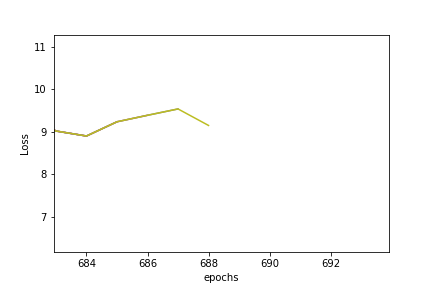

Text(0, 0.5, 'Loss')

In [55]:
%matplotlib notebook
import matplotlib.pyplot as plt

def progress_bar(ax, progress):
    ax.plot(progress)
    fig.canvas.draw()
    
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epochs')
ax.set_ylabel('Loss')

In [ ]:
losses = []
while epoch_loss > 0.1:
    epoch_loss = 0
    for i, batch in enumerate(train_iterator):
        src = batch.src.to(device)
        trg = batch.trg.to(device)
        optimizer.zero_grad()
        output, _ = model(src, trg[:,:-1])
        output_dim = output.shape[-1]
        output = output.contiguous().view(-1, output_dim)
        trg = trg[:,1:].contiguous().view(-1)
        loss = criterion(output, trg)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1)
        optimizer.step()
        epoch_loss += loss.item()
    j += 1
    losses.append(epoch_loss)
    progress_bar(ax, losses)

In [57]:
!mkdir -p save/new_afterburner
model_fn='save/new_afterburner/afterburner_300.pt'
torch.save(model.state_dict(), model_fn)

## Translate pred to gold and check WER

In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

import os, pickle
from multiprocessing import Pool
from Cfg import Cfg
from RecordingCorpus import RecordingCorpus
from tqdm.auto import tqdm
from SplitCorpus import SplitCorpus
from load_pretrained_model import load_pretrained_model
from listen_and_transcribe import listen_and_transcribe

In [ ]:
graphemes=[' ','a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q',
           'r','s','t','u','v','w','x','y','à','á','â','ã','è','é','ê','ì','í','ò',
           'ó','ô','õ','ù','ú','ý','ă','đ','ĩ','ũ','ơ','ư','ạ','ả','ấ','ầ','ẩ','ẫ',
           'ậ','ắ','ằ','ẳ','ẵ','ặ','ẹ','ẻ','ẽ','ế','ề','ể','ễ','ệ',
           'ỉ','ị','ọ','ỏ','ố','ồ','ổ','ỗ','ộ','ớ','ờ','ở','ỡ','ợ',
           'ụ','ủ','ứ','ừ','ử','ữ','ự','ỳ','ỷ','ỹ']

In [95]:
model_fn='save/new_afterburner/afterburner_300.pt'

In [96]:
model.load_state_dict(torch.load(model_fn))

<All keys matched successfully>

In [97]:
from calculate_cer import calculate_cer
from calculate_wer import calculate_wer
from prediction_to_string import prediction_to_string

In [98]:
model.eval();
R=[]
for i, batch in enumerate(tqdm(train_iterator)):
    src = batch.src.to(device)
    trg = batch.trg.to(device)
    output, _ = model(src, trg[:,:-1])
    output_dim = output.shape[-1]
    output = output.contiguous().view(-1, output_dim)
    trg = trg[:,1:].contiguous().view(-1)   
    prediction=prediction_to_string(TRG, batch_size, output, False)
    gold=prediction_to_string(TRG, batch_size, trg, True)   
    for hyp,au in zip(prediction, gold):
        R.append((au,hyp,calculate_cer(hyp, au),calculate_wer(hyp, au)))

In [99]:
R=[(au.strip(), hyp.strip(), cer, wer) for au, hyp, cer, wer in R if '<pad>' not in au]

In [100]:
import pandas as pd
results=pd.DataFrame(R, columns=['Gold', 'Pred', 'CER', 'WER'])
results['GOLD_n_words']=results['Gold'].apply(lambda x: len(x.split(' ')))
results['GOLD_n_chars']=results['Gold'].apply(lambda x: len(x))
results['CER_pct']=results.CER/results['GOLD_n_chars']
results['WER_pct']=results.CER/results['GOLD_n_words']
results=results[results.Gold != '<pad>']
results

,Gold,Pred,CER,WER,GOLD_n_words,GOLD_n_chars,CER_pct,WER_pct
0,ừ chị có khỏe không ăn tết xong có khỏe không,ừ chị có khỏe không ăn tết xong có khỏe không,0,0,11,45,0.0,0.0
1,năm trăm sáu tám sáu trăm sáu tám,năm trăm sáu tám sáu trăm sáu tám,0,0,8,33,0.0,0.0
2,thì mới tập trung vào với cả một năm nào ấy ôi...,thì mới tập trung vào với cả một năm nào ấy ôi...,0,0,35,147,0.0,0.0
3,chiều nay chương trình là để coi qua nhà cái n...,chiều nay chương trình là để coi qua nhà cái n...,0,0,12,51,0.0,0.0
4,ừ thì nói chung là vợ con vào thì phải thế làm...,ừ thì nói chung là vợ con vào thì phải thế làm...,0,0,23,93,0.0,0.0
...,...,...,...,...,...,...,...,...
9220,tập trung theo tên như mình,tập trung theo tên như mình,0,0,6,27,0.0,0.0
9221,đi thi tốt nghệp y,đi thi tốt nghệp y,0,0,5,18,0.0,0.0
9222,về ăn cho hắn đỡ đau đồu hả,về ăn cho hắn đỡ đau đồu hả,0,0,8,27,0.0,0.0
9223,,,0,0,1,0,NaN,0.0


<IPython.core.display.Javascript object>


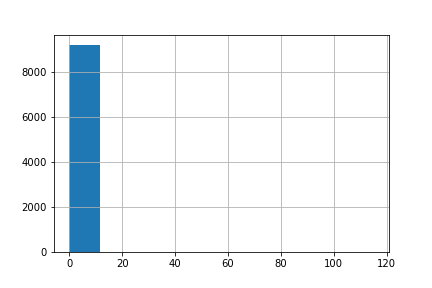

<AxesSubplot:>

In [101]:
%matplotlib notebook
results.WER_pct.hist(bins=10)

In [102]:
results.WER_pct.mean(), results.CER_pct.mean()

(0.07335265071859895, 0.04439781897284256)